# Import modules

In [3]:
import os
import glob
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
# print(pd.__version__)

In [22]:
pol_codes = [1, 5, 7, 8, 10, 6001]
pol_dict = {7: "O3", 6001: "PM2.5", 5: "PM10", 10: "CO", 1: "SO2", 8: "NO2"}
pol_dict_rev ={'SO2': 1,'PM10': 5,'O3': 7,'NO2': 8,'CO': 10,'PM2.5': 6001}
pol_units = {1:'µg/m3',5:'µg/m3',7:'µg/m3',8:'µg/m3',10:'mg/m3',6001:'µg/m3'}

# Preliminary analysis, preparation and preprocessing of data for EDA

In [5]:
### Load metadata datasets, then drop unnecessary columns and remove duplicates

# df_meta = pd.read_csv('PanEuropean_metadata.csv', sep="\t")
# df_stat = pd.read_csv('AirBase_v8_stations.csv', sep="\t")
# drop_list2 = ['Countrycode','Timezone','Namespace','AirQualityNetwork','AirQualityStationNatCode','SamplingPoint','SamplingProces','Sample','AirPollutantCode','ObservationDateBegin','ObservationDateEnd','Projection','Altitude','MeasurementType','EquivalenceDemonstrated','MeasurementEquipment','InletHeight','BuildingDistance','KerbDistance']
# drop_list3 = ['station_local_code','type_of_station','station_ozone_classification','station_type_of_area','station_subcat_rural_back','street_type','station_longitude_deg','station_latitude_deg','station_altitude','lau_level1_code','lau_level2_code','lau_level2_name','EMEP_station']
# df_meta.drop(columns=drop_list2, inplace=True)
# df_stat.drop(columns=drop_list3, inplace=True)
# df_meta.drop_duplicates(subset='AirQualityStation', keep='first', inplace=True)
# df_stat.drop_duplicates(subset='station_european_code', keep='first', inplace=True)

In [6]:
### Check metadata column names

# display(df_meta.columns)
# display(df_stat.columns)

In [7]:
### Check metadata info

# display(df_stat.info(verbose=True, show_counts=True))
# display(df_stat.head())
# display(df_meta.info(verbose=True, show_counts=True))
# display(df_meta.head())

In [8]:
### Rename columns in df_stat, then merge to create one combined metadata

# df_stat.rename(columns = {'station_european_code':'AirQualityStationEoICode',
#                           'country_iso_code':'Countrycode',
#                           'country_name':'CountryName',
#                           'station_name':'StationName',
#                           'station_start_date':'StationStartDate',
#                           'station_end_date':'StationEndDate',
#                           'station_city':'StationCity'}, inplace = True)
# meta = df_meta.merge(df_stat, on='AirQualityStationEoICode', how='left')

In [9]:
### Export new combined metadata file

# path_to_home=r'C:\Users\Mint\Downloads\yandex\aqi_eda'
# os.chdir(path_to_home)
# meta.to_csv( "Merged_metadata.csv", index=False, encoding='utf-8-sig')

In [10]:
### Load previously prepared meta dataset

meta = pd.read_csv('Merged_metadata.csv', low_memory=False)

In [23]:
### Load main dataset, then drop unnecessary columns

df = pd.read_csv('denmark_and_serbia_all.csv', low_memory=False)
drop_list1 = ['Namespace','AirQualityNetwork','AirQualityStationEoICode','AirPollutantCode']
df.drop(columns=drop_list1, inplace=True)

In [24]:
### Convert pollutant names in main dataset to integer

df = df[df['AirPollutant'].isin(pol_dict_rev.keys())]
df.replace({'AirPollutant': pol_dict_rev}, inplace=True)

In [30]:
# df.info(verbose=True, show_counts=True)

In [26]:
### Check units of measurements and averaging time for each pollutant

display(df[df['AirPollutant'] ==1]['UnitOfMeasurement'].unique())
display(df[df['AirPollutant'] ==5]['UnitOfMeasurement'].unique())
display(df[df['AirPollutant'] ==7]['UnitOfMeasurement'].unique())
display(df[df['AirPollutant'] ==8]['UnitOfMeasurement'].unique())
display(df[df['AirPollutant'] ==10]['UnitOfMeasurement'].unique())
display(df[df['AirPollutant'] ==6001]['UnitOfMeasurement'].unique())

array(['µg/m3'], dtype=object)

array(['µg/m3'], dtype=object)

array(['µg/m3'], dtype=object)

array(['µg/m3'], dtype=object)

array(['mg/m3'], dtype=object)

array(['µg/m3'], dtype=object)

In [13]:
### Check meta dataframe in order to choose which columns to drop

# meta.info(verbose=True, show_counts=True)
# display(meta.head(2))
# display(meta.columns)

In [27]:
### Drop other columns which will not be used during further EDA in this notebook

new_drop_list = ['AirQualityStationEoICode','Longitude','Latitude','Countrycode','CountryName','StationName','StationStartDate']
meta = meta.drop(columns=new_drop_list)
df.drop(columns=['UnitOfMeasurement'], inplace=True)

In [28]:
### Merge main dataframe and corresponding metadata using left merge

dff = df.merge(meta, on='AirQualityStation', how='left')

In [29]:
### Check whether all stations within our dataset are currently active

dff.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6963451 entries, 0 to 6963450
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Countrycode            6963451 non-null  object 
 1   AirQualityStation      6963451 non-null  object 
 2   SamplingPoint          6963451 non-null  object 
 3   SamplingProcess        6963451 non-null  object 
 4   Sample                 6951624 non-null  object 
 5   AirPollutant           6963451 non-null  int64  
 6   AveragingTime          6963451 non-null  object 
 7   Concentration          6541966 non-null  float64
 8   DatetimeBegin          6963451 non-null  object 
 9   DatetimeEnd            6963451 non-null  object 
 10  Validity               6963451 non-null  int64  
 11  Verification           6963451 non-null  int64  
 12  AirQualityStationType  6963451 non-null  object 
 13  AirQualityStationArea  6963451 non-null  object 
 14  StationEndDate    

In [31]:
### Earlier we found out that all stations seem to be active (0 non-null values) so we can drop StationEndDate column as well

dff.drop(columns=['StationEndDate'], inplace=True)

In [32]:
### Export final preprocessed version of our dataset before EDA

path_to_home=r'C:\Users\Mint\Downloads\yandex\aqi_eda'
os.chdir(path_to_home)
dff.to_csv("denmark_and_serbia_all_v5_final.csv", index=False, encoding='utf-8-sig')

# Exploratory Data Analysis (EDA)

## Chapter1: Basic EDA

### Part0:

In [33]:
### Import final preprocessed version of our dataset or continue with dff

df_main = dff
# df_main = pd.read_csv('denmark_and_serbia_all_v5_final.csv', low_memory=False)

In [34]:
### Convert datetime columns into proper datetime format

df_main['DatetimeBegin'] = pd.to_datetime(df_main['DatetimeBegin'], format="%Y-%m-%d %H:%M:%S %z")
df_main['DatetimeEnd'] = pd.to_datetime(df_main['DatetimeEnd'], format="%Y-%m-%d %H:%M:%S %z")

In [35]:
### Convert AirPollutant,Validity, Verification columns to int16 to save memory

df_main['AirPollutant'] = df_main['AirPollutant'].astype('int16')
df_main['Validity'] = df_main['Validity'].astype('int16')
df_main['Verification'] = df_main['Verification'].astype('int16')

In [37]:
### Check dataframe info after changing multiple columns datatype

# df_main.info(verbose=True, show_counts=True)
# display(df_main.head(1))

### Part1: Data overview

In [38]:
### Check basic stats for all columns in an exact way proposed in third checkpoint description (using describe all)

display(df_main[df_main['AirPollutant']==1].describe(include='all', datetime_is_numeric=True))

Countrycode AirQualityStation          SamplingPoint  \
count      1082929           1082929                1082929   
unique           2                33                     35   
top             RS       STA-RS0028A  SPO-RS0028A_00001_100   
freq        968631             85709                  85709   
mean           NaN               NaN                    NaN   
min            NaN               NaN                    NaN   
25%            NaN               NaN                    NaN   
50%            NaN               NaN                    NaN   
75%            NaN               NaN                    NaN   
max            NaN               NaN                    NaN   
std            NaN               NaN                    NaN   

               SamplingProcess                       Sample  AirPollutant  \
count                  1082929                      1082929     1082929.0   
unique                       8                           35           NaN   
top     SPP-RS_A_UV-FL_API100E  SPO_F-RS0028A_00001_100_100           NaN   
freq                    896314                        85709           NaN   
mean                       NaN                          NaN           1.0   
min                        NaN                          NaN           1.0   
25%                        NaN                          NaN           1.0   
50%                        NaN                          NaN           1.0   
75%                        NaN                          NaN           1.0   
max                        NaN                          NaN           1.0   
std                        NaN                          NaN           0.0   

       AveragingTime  Concentration                        DatetimeBegin  \
count        1082929   1.025257e+06                              1082929   
unique             3            NaN                                  NaN   
top             hour            NaN                                  NaN   
freq         1069879            NaN                                  NaN   
mean             NaN   1.494149e+01  2018-07-24 00:35:38.443794944+01:00   
min              NaN  -2.443200e+02            2013-01-01 00:00:00+01:00   
25%              NaN   5.100000e+00            2016-01-08 03:00:00+01:00   
50%              NaN   8.664960e+00            2019-01-20 23:00:00+01:00   
75%              NaN   1.423000e+01            2020-12-14 02:00:00+01:00   
max              NaN   5.425818e+03            2022-10-28 06:00:00+01:00   
std              NaN   4.980507e+01                                  NaN   

                                DatetimeEnd      Validity  Verification  \
count                               1082929  1.082929e+06  1.082929e+06   
unique                                  NaN           NaN           NaN   
top                                     NaN           NaN           NaN   
freq                                    NaN           NaN           NaN   
mean    2018-07-24 01:52:43.048362240+01:00  7.318218e-01  1.478078e+00   
min               2013-01-01 01:00:00+01:00 -9.900000e+01  1.000000e+00   
25%               2016-01-08 05:00:00+01:00  1.000000e+00  1.000000e+00   
50%               2019-01-21 00:00:00+01:00  1.000000e+00  1.000000e+00   
75%               2020-12-14 03:00:00+01:00  1.000000e+00  1.000000e+00   
max               2022-10-28 07:00:00+01:00  2.000000e+00  3.000000e+00   
std                                     NaN  4.581378e+00  8.446755e-01   

       AirQualityStationType AirQualityStationArea StationCity  
count                1082929               1082929      990635  
unique                     3                     4          16  
top               background                 urban    BELGRADE  
freq                  657011                912265      231498  
mean                     NaN                   NaN         NaN  
min                      NaN                   NaN         NaN  
25%                      NaN                   NaN      

In [39]:
display(df_main[df_main['AirPollutant']==5].describe(include='all', datetime_is_numeric=True))

Countrycode AirQualityStation          SamplingPoint  \
count       586423            586423                 586423   
unique           2                30                     36   
top             RS       STA-DK0034A  SPO-DK0034A_00005_100   
freq        402425             92474                  89584   
mean           NaN               NaN                    NaN   
min            NaN               NaN                    NaN   
25%            NaN               NaN                    NaN   
50%            NaN               NaN                    NaN   
75%            NaN               NaN                    NaN   
max            NaN               NaN                    NaN   
std            NaN               NaN                    NaN   

                         SamplingProcess                       Sample  \
count                             586423                       581903   
unique                                10                           36   
top     SPP-RS_A_light-scat_GRIMM-EDM180  SPO_F-DK0034A_00005_100_100   
freq                              374677                        89584   
mean                                 NaN                          NaN   
min                                  NaN                          NaN   
25%                                  NaN                          NaN   
50%                                  NaN                          NaN   
75%                                  NaN                          NaN   
max                                  NaN                          NaN   
std                                  NaN                          NaN   

        AirPollutant AveragingTime  Concentration  \
count       586423.0        586423  568207.000000   
unique           NaN             3            NaN   
top              NaN          hour            NaN   
freq             NaN        555942            NaN   
mean             5.0           NaN      30.216384   
min              5.0           NaN  -29779.750000   
25%              5.0           NaN      13.148330   
50%              5.0           NaN      21.600000   
75%              5.0           NaN      35.850000   
max              5.0           NaN    1041.631670   
std              0.0           NaN      49.814637   

                              DatetimeBegin  \
count                                586423   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean    2018-12-11 19:03:55.918440704+01:00   
min               2013-01-01 00:00:00+01:00   
25%               2016-02-12 02:00:00+01:00   
50%               2020-01-10 04:00:00+01:00   
75%               2021-09-24 02:00:00+01:00   
max               2022-10-29 21:00:00+01:00   
std                                     NaN   

                                DatetimeEnd       Validity   Verification  \
count                                586423  586423.000000  586423.000000   
unique                                  NaN            NaN            NaN   
top                                     NaN            NaN            NaN   
freq                                    NaN            NaN            NaN   
mean    2018-12-11 21:15:37.927742464+01:00       0.938434       1.729508   
min               2013-01-01 01:00:00+01:00      -1.000000       1.000000   
25%               2016-02-12 06:00:00+01:00       1.000000       1.000000   
50%               2020-01-10 08:00:00+01:00       1.000000       1.000000   
75%               2021-09-24 03:00:00+01:00       1.000000       3.000000   
max               2022-10-29 22:00:00+01:00       2.000000       3.000000   
std                                     NaN       0.347880       0.920485   

       AirQualityStationType AirQualityStationArea StationCity  
count                 586423                586423      420045  
unique                     3                     4          11  
top                  traffic                 urban 

In [40]:
display(df_main[df_main['AirPollutant']==7].describe(include='all', datetime_is_numeric=True))

Countrycode AirQualityStation          SamplingPoint  \
count      1292229           1292229                1292229   
unique           2                19                     19   
top             DK       STA-DK0012R  SPO-DK0012R_00007_100   
freq        738257             94076                  94076   
mean           NaN               NaN                    NaN   
min            NaN               NaN                    NaN   
25%            NaN               NaN                    NaN   
50%            NaN               NaN                    NaN   
75%            NaN               NaN                    NaN   
max            NaN               NaN                    NaN   
std            NaN               NaN                    NaN   

              SamplingProcess                       Sample  AirPollutant  \
count                 1292229                      1292229     1292229.0   
unique                     11                           19           NaN   
top     SPP-RS_A_UV-P_API400E  SPO_F-DK0012R_00007_100_100           NaN   
freq                   500971                        94076           NaN   
mean                      NaN                          NaN           7.0   
min                       NaN                          NaN           7.0   
25%                       NaN                          NaN           7.0   
50%                       NaN                          NaN           7.0   
75%                       NaN                          NaN           7.0   
max                       NaN                          NaN           7.0   
std                       NaN                          NaN           0.0   

       AveragingTime  Concentration                        DatetimeBegin  \
count        1292229   1.181097e+06                              1292229   
unique             3            NaN                                  NaN   
top             hour            NaN                                  NaN   
freq         1291492            NaN                                  NaN   
mean             NaN   5.379499e+01  2017-11-16 20:12:09.907160320+01:00   
min              NaN  -7.735515e+01            2013-01-01 00:00:00+01:00   
25%              NaN   3.270000e+01            2015-02-21 21:00:00+01:00   
50%              NaN   5.488800e+01            2018-02-04 05:00:00+01:00   
75%              NaN   7.316900e+01            2020-06-15 07:00:00+01:00   
max              NaN   3.062200e+02            2022-10-29 21:00:00+01:00   
std              NaN   2.863611e+01                                  NaN   

                                DatetimeEnd      Validity  Verification  \
count                               1292229  1.292229e+06  1.292229e+06   
unique                                  NaN           NaN           NaN   
top                                     NaN           NaN           NaN   
freq                                    NaN           NaN           NaN   
mean    2017-11-16 21:12:56.701652224+01:00 -1.176552e+00  1.286383e+00   
min               2013-01-01 01:00:00+01:00 -9.900000e+01  1.000000e+00   
25%               2015-02-21 22:00:00+01:00  1.000000e+00  1.000000e+00   
50%               2018-02-04 06:00:00+01:00  1.000000e+00  1.000000e+00   
75%               2020-06-15 08:00:00+01:00  1.000000e+00  1.000000e+00   
max               2022-10-29 22:00:00+01:00  2.000000e+00  3.000000e+00   
std                                     NaN  1.414795e+01  6.291451e-01   

       AirQualityStationType AirQualityStationArea StationCity  
count                1292229               1292229      918492  
unique                     2                     3           9  
top               background                 urban    BELGRADE  
freq                 1171949                902242      221594  
mean                     NaN                   NaN         NaN  
min                      NaN                   NaN         NaN  
25%                      NaN                   NaN         NaN  
50%

In [41]:
display(df_main[df_main['AirPollutant']==8].describe(include='all', datetime_is_numeric=True))

Countrycode AirQualityStation          SamplingPoint  \
count      2048730           2048730                2048730   
unique           2                41                     41   
top             DK       STA-DK0012R  SPO-DK0012R_00008_100   
freq       1137743             93966                  93966   
mean           NaN               NaN                    NaN   
min            NaN               NaN                    NaN   
25%            NaN               NaN                    NaN   
50%            NaN               NaN                    NaN   
75%            NaN               NaN                    NaN   
max            NaN               NaN                    NaN   
std            NaN               NaN                    NaN   

               SamplingProcess                       Sample  AirPollutant  \
count                  2048730                      2048178     2048730.0   
unique                       9                           41           NaN   
top     SPP-RS_A_chemi_API200E  SPO_F-DK0012R_00008_100_100           NaN   
freq                    846749                        93966           NaN   
mean                       NaN                          NaN           8.0   
min                        NaN                          NaN           8.0   
25%                        NaN                          NaN           8.0   
50%                        NaN                          NaN           8.0   
75%                        NaN                          NaN           8.0   
max                        NaN                          NaN           8.0   
std                        NaN                          NaN           0.0   

       AveragingTime  Concentration                        DatetimeBegin  \
count        2048730   1.906928e+06                              2048730   
unique             3            NaN                                  NaN   
top             hour            NaN                                  NaN   
freq         2042509            NaN                                  NaN   
mean             NaN   2.040167e+01  2017-12-29 13:01:43.536922880+01:00   
min              NaN  -7.621000e+01            2013-01-01 00:00:00+01:00   
25%              NaN   6.180000e+00            2015-05-23 07:00:00+01:00   
50%              NaN   1.400000e+01            2018-04-12 03:00:00+01:00   
75%              NaN   2.820000e+01            2020-07-31 09:00:00+01:00   
max              NaN   1.077154e+03            2022-10-28 06:00:00+01:00   
std              NaN   2.017470e+01                                  NaN   

                                DatetimeEnd      Validity  Verification  \
count                               2048730  2.048730e+06  2.048730e+06   
unique                                  NaN           NaN           NaN   
top                                     NaN           NaN           NaN   
freq                                    NaN           NaN           NaN   
mean    2017-12-29 14:05:54.341861120+01:00 -1.579720e-01  1.320324e+00   
min               2013-01-01 01:00:00+01:00 -9.900000e+01  1.000000e+00   
25%               2015-05-23 08:00:00+01:00  1.000000e+00  1.000000e+00   
50%               2018-04-12 04:00:00+01:00  1.000000e+00  1.000000e+00   
75%               2020-07-31 10:00:00+01:00  1.000000e+00  1.000000e+00   
max               2022-10-28 07:00:00+01:00  2.000000e+00  3.000000e+00   
std                                     NaN  1.017282e+01  6.775948e-01   

       AirQualityStationType AirQualityStationArea StationCity  
count                2048730               2048730     1535753  
unique                     3                     4          18  
top               background                 urban    BELGRADE  
freq                 1393841               1494070      317203  
mean                     NaN                   NaN         NaN  
min                      NaN                   NaN         NaN  
25%                      NaN                   NaN      

In [42]:
display(df_main[df_main['AirPollutant']==10].describe(include='all', datetime_is_numeric=True))

Countrycode AirQualityStation          SamplingPoint  \
count      1606953           1606953                1606953   
unique           2                32                     32   
top             RS       STA-DK0012R  SPO-DK0012R_00010_100   
freq       1132478             94027                  94027   
mean           NaN               NaN                    NaN   
min            NaN               NaN                    NaN   
25%            NaN               NaN                    NaN   
50%            NaN               NaN                    NaN   
75%            NaN               NaN                    NaN   
max            NaN               NaN                    NaN   
std            NaN               NaN                    NaN   

              SamplingProcess                       Sample  AirPollutant  \
count                 1606953                      1606953     1606953.0   
unique                     10                           33           NaN   
top     SPP-RS_A_NDIR_API300E  SPO_F-DK0012R_00010_100_100           NaN   
freq                  1053830                        94027           NaN   
mean                      NaN                          NaN          10.0   
min                       NaN                          NaN          10.0   
25%                       NaN                          NaN          10.0   
50%                       NaN                          NaN          10.0   
75%                       NaN                          NaN          10.0   
max                       NaN                          NaN          10.0   
std                       NaN                          NaN           0.0   

       AveragingTime  Concentration                        DatetimeBegin  \
count        1606953   1.519482e+06                              1606953   
unique             3            NaN                                  NaN   
top             hour            NaN                                  NaN   
freq         1597081            NaN                                  NaN   
mean             NaN   4.727816e-01  2018-04-15 12:45:51.163724544+01:00   
min              NaN  -8.000000e-01            2013-01-01 00:00:00+01:00   
25%              NaN   2.000000e-01            2015-09-28 06:00:00+01:00   
50%              NaN   3.000000e-01            2018-08-23 23:00:00+01:00   
75%              NaN   5.360000e-01            2020-09-11 08:00:00+01:00   
max              NaN   5.551712e+02            2022-10-28 06:00:00+01:00   
std              NaN   7.759557e-01                                  NaN   

                                DatetimeEnd      Validity  Verification  \
count                               1606953  1.606953e+06  1.606953e+06   
unique                                  NaN           NaN           NaN   
top                                     NaN           NaN           NaN   
freq                                    NaN           NaN           NaN   
mean    2018-04-15 13:54:18.991395840+01:00  2.799976e-01  1.381168e+00   
min               2013-01-01 01:00:00+01:00 -9.900000e+01  1.000000e+00   
25%               2015-09-28 07:00:00+01:00  1.000000e+00  1.000000e+00   
50%               2018-08-24 00:00:00+01:00  1.000000e+00  1.000000e+00   
75%               2020-09-11 09:00:00+01:00  1.000000e+00  1.000000e+00   
max               2022-10-28 07:00:00+01:00  2.000000e+00  3.000000e+00   
std                                     NaN  7.910031e+00  7.510231e-01   

       AirQualityStationType AirQualityStationArea StationCity  
count                1606953               1606953     1347364  
unique                     3                     4          18  
top               background                 urban    BELGRADE  
freq                  994931               1279893      231214  
mean                     NaN                   NaN         NaN  
min                      NaN                   NaN         NaN  
25%                      NaN                   NaN         NaN  
50%

In [43]:
display(df_main[df_main['AirPollutant']==6001].describe(include='all', datetime_is_numeric=True))

Countrycode AirQualityStation          SamplingPoint  \
count       346187            346187                 346187   
unique           2                24                     30   
top             RS       STA-DK0034A  SPO-DK0034A_06001_100   
freq        215837             90914                  88038   
mean           NaN               NaN                    NaN   
min            NaN               NaN                    NaN   
25%            NaN               NaN                    NaN   
50%            NaN               NaN                    NaN   
75%            NaN               NaN                    NaN   
max            NaN               NaN                    NaN   
std            NaN               NaN                    NaN   

                         SamplingProcess                       Sample  \
count                             346187                       339432   
unique                                 8                           30   
top     SPP-RS_A_light-scat_GRIMM-EDM180  SPO_F-DK0034A_06001_100_100   
freq                              215837                        88038   
mean                                 NaN                          NaN   
min                                  NaN                          NaN   
25%                                  NaN                          NaN   
50%                                  NaN                          NaN   
75%                                  NaN                          NaN   
max                                  NaN                          NaN   
std                                  NaN                          NaN   

        AirPollutant AveragingTime  Concentration  \
count       346187.0        346187  340995.000000   
unique           NaN             3            NaN   
top              NaN          hour            NaN   
freq             NaN        323628            NaN   
mean          6001.0           NaN      19.747793   
min           6001.0           NaN     -46.600000   
25%           6001.0           NaN       7.691000   
50%           6001.0           NaN      12.350000   
75%           6001.0           NaN      21.999835   
max           6001.0           NaN     472.800000   
std              0.0           NaN      22.817647   

                              DatetimeBegin  \
count                                346187   
unique                                  NaN   
top                                     NaN   
freq                                    NaN   
mean    2019-11-06 01:25:16.715532544+01:00   
min               2013-01-01 00:00:00+01:00   
25%               2017-11-05 06:30:00+01:00   
50%               2021-04-08 01:00:00+01:00   
75%               2022-02-07 21:00:00+01:00   
max               2022-10-30 04:00:00+01:00   
std                                     NaN   

                                DatetimeEnd       Validity   Verification  \
count                                346187  346187.000000  346187.000000   
unique                                  NaN            NaN            NaN   
top                                     NaN            NaN            NaN   
freq                                    NaN            NaN            NaN   
mean    2019-11-06 03:55:08.879882752+01:00       0.971527       2.240509   
min               2013-01-01 02:00:00+01:00      -1.000000       1.000000   
25%               2017-11-05 15:30:00+01:00       1.000000       1.000000   
50%               2021-04-08 02:00:00+01:00       1.000000       3.000000   
75%               2022-02-07 22:00:00+01:00       1.000000       3.000000   
max               2022-10-30 05:00:00+01:00       2.000000       3.000000   
std                                     NaN       0.246379       0.947545   

       AirQualityStationType AirQualityStationArea StationCity  
count                 346187                346187      218394  
unique                     3                     3           6  
top                  traffic                 urban 

Наиболее важное, что можно вынести после анализа данных таблиц, это то, что в данных по концентрациям есть пропуски, отрицательные значения и очень большие по модулю значения. Также что больше всего данных имеется для станций расположенных в городах, что в принципе логично.

Посмотрим долю пропусков, невалидные значения, а также минимальные и максимальные концентрации для каждого загрязнителя

### Part2: NaN values

In [44]:
### Check the distribution of NaN values across pollutants

display(df_main['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==1]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==5]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==7]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==8]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==10]['Concentration'].isna().mean())
display(df_main[df_main['AirPollutant']==6001]['Concentration'].isna().mean())

0.060528177767029595

0.053255568924647875

0.031062901693828516

0.08600023680013372

0.06921458659755068

0.05443283033168985

0.014997674667159656

In [45]:
### Check if these NaN are directly correlated with Validity

display(df_main[df_main['Concentration'].isna()==True].groupby('Validity')['AirPollutant'].count())

Validity
-99     60231
-1     361254
Name: AirPollutant, dtype: int64

In [46]:
### Check Validity column value counts 

display(df_main['Validity'].value_counts())

 1     6474723
-1      361254
 2       67243
-99      60231
Name: Validity, dtype: int64

In [47]:
### Drop all non-valid data

df_main_valid = df_main[df_main['Validity']>0].copy()

### Part3: AveragingTime

In [49]:
### Create a subdataset to investigate rows containing 'day' and 'var' in AveragingTime column
### Also create a list of stations with such values

df_check1 = df_main_valid.query('AveragingTime=="day" | AveragingTime=="var"')
check_stations = list(df_check1['AirQualityStation'].unique())

In [50]:
### Check and compare value counts of 'day' and 'var' for specified stations in both initial dataframe and subdataframe

df_check2 = df_check1['AirQualityStation'].value_counts().rename_axis('AirQualityStation').reset_index(name='counts_day_var')
df_check3 = df_main['AirQualityStation'].value_counts().rename_axis('AirQualityStation').reset_index(name='counts_all')
df_check4 = df_check3.merge(df_check2, on='AirQualityStation', how='left')
display(df_check4)

AirQualityStation  counts_all  counts_day_var
0        STA-DK0034A      550047          5608.0
1        STA-DK0012R      367629          6746.0
2        STA-RS0036A      338452             6.0
3        STA-RS0028A      329751             5.0
4        STA-RS0032A      328399             7.0
5        STA-RS0033A      319232             6.0
6        STA-DK0045A      278407          5438.0
7        STA-RS0031A      255203           656.0
8        STA-RS0005R      232798          1790.0
9        STA-RS0037A      214199          1309.0
10       STA-RS0030A      211199             4.0
11       STA-RS0029A      211178           720.0
12       STA-DK0051A      206986          5897.0
13       STA-DK0053A      188546          1902.0
14       STA-DK0054A      187397          2162.0
15       STA-DK0046A      185829             NaN
16       STA-RS0034A      180110          2142.0
17       STA-DK0031R      170676          2293.0
18       STA-DK0056A      155114          2469.0
19       STA-RS0043A      153847          2058.0
20       STA-RS0041A      147255          2927.0
21       STA-RS0038A      146747          2098.0
22       STA-RS0042A      146072          1303.0
23       STA-RS0045A      138580          2066.0
24       STA-RS0044A      126550          1259.0
25       STA-RS0039A      120288          2354.0
26       STA-DK0030A       99189          5682.0
27       STA-RS0048A       92652           990.0
28       STA-DK0058A       89513          1577.0
29       STA-RS0046A       69613          1361.0
30       STA-RS0035A       68939          1272.0
31       STA-DK0031A       68133           707.0
32       STA-DK0057A       63512          1951.0
33       STA-DK0008R       55501          2700.0
34       STA-RS0009A       53337           602.0
35       STA-DK0021A       52398           511.0
36       STA-RS0047A       51901          1564.0
37       STA-DK0052A       33526           362.0
38       STA-RS0055A       30888             2.0
39       STA-RS0050A       29351             2.0
40       STA-RS0054A       28732             2.0
41       STA-RS0052A       28405             2.0
42       STA-RS0053A       28340             2.0
43       STA-RS0008A       27740          1451.0
44       STA-RS0049A       27074             2.0
45       STA-DK0059A       26718           355.0
46       STA-RS0051A       26328             2.0
47       STA-RS0027A       18615          1095.0
48       STA-RS0040A        1095          1044.0
49       STA-RS0007A        1095          1086.0
50       STA-RS0014A         365           357.0

In [51]:
### Exclude rows containing measurements averaged by periods other than 1 hour

df_main_valid = df_main_valid[df_main_valid['AveragingTime']=='hour']

### Part4: Negative values

In [53]:
### Find percentages of negative values in 'Concentration' column for each pollutant

df_main_neg = df_main_valid[df_main_valid['Concentration']<0].copy()
df_main_check1 = df_main_valid.groupby('AirPollutant')['Concentration'].count().reset_index()
df_main_check1.columns = ['AirPollutant', 'TotalCount']
df_main_check2 = df_main_neg.groupby('AirPollutant')['Concentration'].count().reset_index()
df_main_check2.columns = ['AirPollutant', 'NegativeCount']
df_main_check3 = df_main_check1.merge(df_main_check2, on='AirPollutant', how='left')
df_main_check3['NegativePercentage'] = (df_main_check3['NegativeCount']/df_main_check3['TotalCount'])*100
df_main_check3

AirPollutant  TotalCount  NegativeCount  NegativePercentage
0             1     1013191           9541            0.941678
1             5      539833            528            0.097808
2             7     1180395            835            0.070739
3             8     1900988           3173            0.166913
4            10     1510479           2892            0.191462
5          6001      319174            147            0.046056

In [54]:
### Define functions to calculate lower and upper whiskers

def lower_whisker(Pollutant, df):
    Q3 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[6]
    Q1 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[4]
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    return lower_whisker

def upper_whisker(Pollutant, df):
    Q3 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[6]
    Q1 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[4]
    IQR = Q3 - Q1
    upper_whisker = Q3 + (1.5 * IQR)
    return upper_whisker

In [56]:
### Define function to calculate percentage of negative values in defined range in df_main_neg dataset

def negative_percentage(Pollutant, upper_whisker):
    percentage = ((df_main_neg[(df_main_neg['AirPollutant']==Pollutant) & (df_main_neg['Concentration']>-upper_whisker)]['Concentration'].count()) \
        / (df_main_neg[df_main_neg['AirPollutant']==Pollutant]['Concentration'].count()))
    return percentage

In [57]:
### Calculate percentage of negative data, 'abs' of which is below upper whisker for corresponding pollutant in df_main_valid

display(negative_percentage(1, upper_whisker(1, df_main_valid)))
display(negative_percentage(5, upper_whisker(5, df_main_valid)))
display(negative_percentage(7, upper_whisker(7, df_main_valid)))
display(negative_percentage(8, upper_whisker(8, df_main_valid)))
display(negative_percentage(10, upper_whisker(10, df_main_valid)))
display(negative_percentage(6001, upper_whisker(6001, df_main_valid)))

0.9960171889739021

0.990530303030303

1.0

0.9955877718247715

1.0

0.9863945578231292

In [94]:
### Find distribution of negative values in 'Concentration' accross different stations

df_neg_stations = df_main_neg.groupby('AirQualityStation')['Concentration'].count().reset_index().sort_values(by='Concentration', ascending=False)
df_neg_stations.columns = ['AirQualityStation', 'NegativeCount']
df_neg_stations

AirQualityStation  NegativeCount
6        STA-DK0034A           8099
15       STA-DK0059A           1872
9        STA-DK0051A           1533
10       STA-DK0053A            769
11       STA-DK0054A            761
1        STA-DK0012R            648
2        STA-DK0021A            627
8        STA-DK0046A            467
5        STA-DK0031R            338
21       STA-RS0031A            237
3        STA-DK0030A            231
12       STA-DK0056A            201
7        STA-DK0045A            172
26       STA-RS0036A            153
18       STA-RS0028A            137
28       STA-RS0038A            135
34       STA-RS0045A             87
25       STA-RS0035A             84
20       STA-RS0030A             71
29       STA-RS0039A             64
0        STA-DK0008R             56
23       STA-RS0033A             55
4        STA-DK0031A             47
31       STA-RS0042A             40
27       STA-RS0037A             39
22       STA-RS0032A             38
32       STA-RS0043A             37
13       STA-DK0057A             22
35       STA-RS0046A             20
14       STA-DK0058A             20
16       STA-RS0005R             15
24       STA-RS0034A             11
37       STA-RS0048A              9
33       STA-RS0044A              8
30       STA-RS0041A              6
36       STA-RS0047A              3
19       STA-RS0029A              3
17       STA-RS0027A              1

In [95]:
### Find distribution of negative values in 'Concentration' by Year

df_main_neg['Year']= pd.DatetimeIndex(df_main_neg['DatetimeEnd']).year
df_neg_years = df_main_neg.groupby('Year')['Concentration'].count().reset_index()
df_neg_years.columns = ['Year', 'NegativeCount']
df_neg_years

Year  NegativeCount
0  2013           1577
1  2014            721
2  2015            182
3  2016            244
4  2017            249
5  2018           1166
6  2019           2212
7  2020           3155
8  2021           3068
9  2022           4542

In [96]:
### Find distribution of negative values across verified and unverified data

df_main_neg.groupby('Verification')['Concentration'].count()

Verification
1    9504
2    6362
3    1250
Name: Concentration, dtype: int64

In [61]:
### Check negative value counts for different countries 

df_main_neg.groupby('Countrycode')['Concentration'].count()

Countrycode
DK    15863
RS     1253
Name: Concentration, dtype: int64

На Данию приходится высокая доля измеренных концентраций с отрицательным значением. Отрицательные значения в измерениях могут возникать в тех случаях когда измерительное устройство плохо откалибровано, а также в тех случаях, когда концентрация измеряемого загрязнителя близка к нижнему пределу обнаружения детектора. После анализа отрицательных значений выяснилось, что основная часть располагается в довольно узком диапазоне недалеко от нуля, но среди них также как и с положительными данными встречаются выбросы, расположенные сильно далеко от основной группы данных. Изначально рассматривалось три разных способа устранения проблемы с отрицательными данными: <br>1) Удалить такие данные, или удалить станции в которых они встречаются <br>2) Заменить их на модуль их значения <br>3) Заменить их на ноль или близкое к нулю значение. <br>Каждый вышеупомянутый вариант имеет свои недостатки. Так например удалив такие данные мы бы создали пропуски в timeseries, которые пришлось бы как-то восстанавливать. Вариант удалить конкретные станции оказался не очень применим, т.к такие данные встречаются в большинстве станций. <br>Другим возможным решением могло бы быть замещение отрицательных значений их модулями. В данной работе даже было проверено, что для большинства отрицательных значений их модули не превосходили верхние отсекающие границы (усы боксплота) общих выборок каждого загрязнителя. А учитывая их небольшую долю относительно основной выборки, мы бы, наверное, не сильно изменили характеристики основной выборки. <br>Однако, после чтения доступной информации по особенностям работы оборудования измерительных станций выяснилось, что такой способ исправить отрицательные данные был бы скорее всего не совсем корректным. Оказалось, что отрицательные значения могут возникать в связи с плохо откалиброванными детекторами, а также в тех случаях, когда концентрация измеряемого загрязнителя меньше или близка к нижнему пределу обнаружения прибора. Большое количество отрицательных значений в течение продолжительного времени могут свидетельствовать о систематической проблеме с качеством калибровки оборудования данной станции. А это уже, в свою очередь, ставит под сомнение качество и валидность в том числе и положительных измерений.

In [97]:
### Create separate datasets for Serbia and Denmark

df_valid_serbia = df_main_valid[df_main_valid['Countrycode']=='RS'].copy()
df_valid_denmark = df_main_valid[df_main_valid['Countrycode']=='DK'].copy()

Ранее при обсуждении способов обработки отрицательных значений, мы пришли к тому, что наилучшим способом будет замена таких значений на ноль или близкое к нему значение. Так как в датасете встречаются строки с концентрацией равной нулю, то предпочтительнее будет выбрать какое-нибудь другое уникальное значение близкое к нулю, не встречающееся в нашем датасете. Это поможет в дальнейшем легко идентифицировать строки, которые раньше были отрицательными. Таким значением может быть 0.0001, т.к. мы видим, что оно не встречается в наших датасетах.
<br><br>Теперь когда мы определились со способами обработки разных типов аномальных данных, мы можем приступить к формированию окончательных датасетов. Для этого сконвертируем отрицательные значения, удалим дубликаты и избавимся от всех лишних колонок.

In [98]:
### Check whether Concentration column contains values equal to 0, also check other value close to zero - 0.0001

display(df_valid_denmark[df_valid_denmark['Concentration']==0]['AirPollutant'].value_counts())
display(df_valid_serbia[df_valid_serbia['Concentration']==0]['AirPollutant'].value_counts())
display(df_valid_denmark[df_valid_denmark['Concentration']==0.0001]['AirPollutant'].value_counts())
display(df_valid_serbia[df_valid_serbia['Concentration']==0.0001]['AirPollutant'].value_counts())

10      377
6001    362
5       245
1       158
8        83
7        45
Name: AirPollutant, dtype: int64

7       682
6001    343
5       342
10       56
1        22
8         5
Name: AirPollutant, dtype: int64

Series([], Name: AirPollutant, dtype: int64)

Series([], Name: AirPollutant, dtype: int64)

In [99]:
### Replace all negative values with 0.0001

df_valid_serbia.loc[df_valid_serbia['Concentration'] < 0, 'Concentration'] = 0.0001
df_valid_denmark.loc[df_valid_denmark['Concentration'] < 0, 'Concentration'] = 0.0001

In [101]:
# display(df_valid_serbia[df_valid_serbia['Concentration']<0.001].head())
# display(df_valid_denmark[df_valid_denmark['Concentration']<0.001].head())

### Part5: Verification category

In [102]:
### Create function to display multiple tables side by side
### Warning! This particular code was not written by me
### Created by https://stackoverflow.com/users/508907/ntg

from IPython.display import display_html
from itertools import chain,cycle

def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [103]:
### Find distribution of unverified data across different years

df_unverified = df_main_valid[df_main_valid['Verification']!=1].copy()
df_unverified['Year'] = pd.DatetimeIndex(df_unverified['DatetimeEnd']).year

In [104]:
df_unverified_years_2 = df_unverified[df_unverified['Verification']==2].groupby('Year')['Concentration'].count().reset_index()
df_unverified_years_3 = df_unverified[df_unverified['Verification']==3].groupby('Year')['Concentration'].count().reset_index()
df_unverified_years_2.columns = ['Year', 'Preliminary verified']
df_unverified_years_3.columns = ['Year', 'Not verified']
display_side_by_side(df_unverified_years_2,df_unverified_years_3, titles=['',''])

Year 
 Preliminary verified 
 
 
 
 
 0 
 2020 
 8291 
 
 
 1 
 2021 
 229305 
 
 
 2 
 2022 
 167106 
 
 
 
 
 
 
 Year 
 Not verified 
 
 
 
 
 0 
 2019 
 8712 
 
 
 1 
 2020 
 17189 
 
 
 2 
 2021 
 669270 
 
 
 3 
 2022 
 587322

In [118]:
### Define function creating table of stats for specified pollutant for different verification statuses

def ver_stat(Pollutant, df):
    pollutant1_v1 = list(df[(df['Verification']==1) & \
                                   (df['AirPollutant']==Pollutant)]['Concentration'].describe())
    pollutant1_v2 = list(df[(df['Verification']==2) & \
                                   (df_main_valid['AirPollutant']==Pollutant)]['Concentration'].describe())
    pollutant1_v3 = list(df[(df['Verification']==3) & \
                                   (df['AirPollutant']==Pollutant)]['Concentration'].describe())
    zero_list = [0,0,0,0,0,0,0,0]
    pollutant1_ver = pd.DataFrame([zero_list,pollutant1_v1,pollutant1_v2,pollutant1_v3])
    pollutant1_ver.columns = ['count','mean','std','min','25%','50%','75%','max']
    return pollutant1_ver

In [144]:
display(ver_stat(1, df_valid_denmark))

C:\Users\Mint\AppData\Local\Temp\ipykernel_10976\4222663508.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pollutant1_v2 = list(df[(df['Verification']==2) & \


count      mean       std  min    25%   50%    75%     max
0      0.0  0.000000  0.000000  0.0  0.000  0.00  0.000   0.000
1  86781.0  1.589409  1.691816  0.0  0.448  1.11  2.203  62.934
2  14377.0  0.588512  0.628623  0.0  0.150  0.45  0.840  11.710
3      0.0       NaN       NaN  NaN    NaN   NaN    NaN     NaN

In [133]:
# display(ver_stat(5, df_valid_denmark))

In [136]:
# display(ver_stat(7, df_valid_denmark))

In [139]:
# display(ver_stat(8, df_valid_denmark))

In [141]:
# display(ver_stat(10, df_valid_denmark))

In [143]:
# display(ver_stat(6001, df_valid_denmark))

### Part6: Duplicate check

In [145]:
### Show 5 stations with the most measurements

df_main_valid[df_main_valid['AveragingTime']=='hour']\
.groupby('AirQualityStation')['Concentration'].count().reset_index().sort_values(by='Concentration', ascending=False).head(5)

AirQualityStation  Concentration
6        STA-DK0034A         509078
1        STA-DK0012R         337681
29       STA-RS0036A         329841
25       STA-RS0032A         318837
21       STA-RS0028A         314364

In [146]:
### Function to check station for duplicates

def duplicate_check(station, df):
    df_station_1 = df[(df['AirPollutant']==1) & (df['AirQualityStation']==station)].copy()
    df_station_5 = df[(df['AirPollutant']==5) & (df['AirQualityStation']==station)].copy()
    df_station_7 = df[(df['AirPollutant']==7) & (df['AirQualityStation']==station)].copy()
    df_station_8 = df[(df['AirPollutant']==8) & (df['AirQualityStation']==station)].copy()
    df_station_10 = df[(df['AirPollutant']==10) & (df['AirQualityStation']==station)].copy()
    df_station_6001 = df[(df['AirPollutant']==6001) & (df['AirQualityStation']==station)].copy()
    dup_list = []
    dup_list.append(len(df_station_1[df_station_1['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_5[df_station_5['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_7[df_station_7['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_8[df_station_8['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_10[df_station_10['DatetimeEnd'].duplicated(keep=False)]))
    dup_list.append(len(df_station_6001[df_station_6001['DatetimeEnd'].duplicated(keep=False)]))
    return dup_list

In [147]:
### Check stations for duplicated values and create a list of bad stations with duplicated values

station_dup_list = []
bad_stations_list = []
station_list = list(df_main_valid['AirQualityStation'].unique())
for station in station_list:
    station_dup_list.append(duplicate_check(station, df_main_valid))
for index in range(len(station_dup_list)):
    if max(station_dup_list[index]) !=0:
        bad_stations_list.append(station_list[index])
station_dup_list

[[0, 0, 0, 0, 0, 0],
 [0, 15626, 15888, 16092, 16526, 16096],
 [0, 0, 14658, 15196, 0, 0],
 [0, 0, 0, 16316, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 15966, 16066, 0],
 [0, 0, 15976, 16556, 0, 0],
 [0, 0, 0, 16512, 0, 0],
 [0, 12254, 15944, 16518, 16542, 14056],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 15512, 15896, 0, 0],
 [0, 0, 15592, 15752, 0, 0],
 [0, 0, 1

In [148]:
### Check list of bad stations containing duplicated values

bad_stations_list

['STA-DK0034A',
 'STA-DK0031R',
 'STA-DK0021A',
 'STA-DK0051A',
 'STA-DK0045A',
 'STA-DK0031A',
 'STA-DK0012R',
 'STA-DK0054A',
 'STA-DK0053A',
 'STA-DK0046A',
 'STA-DK0052A',
 'STA-DK0030A']

In [149]:
### Create a slice containing bad station data

df_bad_stations = df_main_valid[df_main_valid['AirQualityStation'].isin(bad_stations_list)].copy()

In [150]:
### Check the location of these bad stations and total value counts for each location except NaN

display(df_bad_stations.groupby('StationCity')['Concentration'].count())

StationCity
AALBORG       220704
ARHUS         217690
COPENHAGEN    840822
KELDSNOR      166698
ODENSE        232834
Name: Concentration, dtype: int64

In [151]:
### Check value counts of stations which do not have StationCity specified 

display(df_bad_stations.query('StationCity !=StationCity')['AirQualityStation'].unique())
display(df_bad_stations.query('StationCity !=StationCity')['AirQualityStationArea'].unique())
display(df_bad_stations[df_bad_stations['AirQualityStation'] =="STA-DK0012R"]\
        .query('StationCity !=StationCity')['AirQualityStation'].count())
display(df_bad_stations[df_bad_stations['AirQualityStation'] =="STA-DK0031R"]\
        .query('StationCity !=StationCity')['AirQualityStation'].count())

array(['STA-DK0031R', 'STA-DK0012R'], dtype=object)

array(['rural', 'rural-regional'], dtype=object)

337681

153167

На данном этапе стало ясно что в данных Дании много проблемных данных и аномалий. Например в станциях Дании есть дубликаты с одинаковым timestamp'ом. В Сербии все точки по всем станциям уникальны по timestamp'у.

Также, как уже ранее упоминалось, в данных по Дании для некоторых станций были обнаружены дубликаты измерений с одинаковым  timestamp'ом. Однако после чтения информации об особенностях работы измерительных станций, выяснилось, что они могут иметь по два детектора для загрязнителей. И возможно такое задвоение связано с тем, что экспортированные данные с таких станций содержали измерения обоих детекторов по отдельности. Проверим данную гипотезу проверив колонки "Samplingpoint", "SamplingProcess" и "Sample". Возможно после анализа данных в этих колонках можно будет найти оптимальное решение по обработке таких "дубликатов".
<br>

In [155]:
df_serbia_v1 = df_valid_serbia.copy()
df_denmark_v1 = df_valid_denmark.copy()

In [156]:
### Check if there are duplicates in Denmark data using SamplingPoint, SamplingProcess and Sample columns

display(df_denmark_v1.duplicated().sum())
DK0012R = df_denmark_v1[df_denmark_v1['AirQualityStation']=='STA-DK0012R'].copy()

0

In [157]:
display(DK0012R[DK0012R['AirPollutant']==6001].sort_values(by=['DatetimeEnd'], ascending=True).head())

Countrycode AirQualityStation          SamplingPoint  \
3397954          DK       STA-DK0012R  SPO-DK0012R_06001_101   
3390678          DK       STA-DK0012R  SPO-DK0012R_06001_101   
3386488          DK       STA-DK0012R  SPO-DK0012R_06001_101   
3399346          DK       STA-DK0012R  SPO-DK0012R_06001_101   
3390068          DK       STA-DK0012R  SPO-DK0012R_06001_101   

                 SamplingProcess                       Sample  AirPollutant  \
3397954      SPP-DK_N_0020200202  SPO_F-DK0012R_06001_101_101          6001   
3390678  SPP-DK_A_TEOM_TEOM1400A  SPO_F-DK0012R_06001_101_101          6001   
3386488  SPP-DK_A_TEOM_TEOM1400A  SPO_F-DK0012R_06001_101_101          6001   
3399346      SPP-DK_N_0020200202  SPO_F-DK0012R_06001_101_101          6001   
3390068  SPP-DK_A_TEOM_TEOM1400A  SPO_F-DK0012R_06001_101_101          6001   

        AveragingTime  Concentration             DatetimeBegin  \
3397954          hour          16.20 2013-01-01 01:00:00+01:00   
3390678          hour          16.20 2013-01-01 01:00:00+01:00   
3386488          hour           8.75 2013-01-01 02:00:00+01:00   
3399346          hour           8.75 2013-01-01 02:00:00+01:00   
3390068          hour           9.65 2013-01-01 03:00:00+01:00   

                      DatetimeEnd  Validity  Verification  \
3397954 2013-01-01 02:00:00+01:00         1             1   
3390678 2013-01-01 02:00:00+01:00         1             1   
3386488 2013-01-01 03:00:00+01:00         1             1   
3399346 2013-01-01 03:00:00+01:00         1             1   
3390068 2013-01-01 04:00:00+01:00         1             1   

        AirQualityStationType AirQualityStationArea StationCity  
3397954            background        rural-regional         NaN  
3390678            background        rural-regional         NaN  
3386488            background        rural-regional         NaN  
3399346            background        rural-regional         NaN  
3390068            background        rural-regional         NaN

Sampling point и Sample не содержат полезной для нас информации. А вот в Sampling process видно, что у повторяющихся строк указаны разные виды Sampling process. Учитывая что на первый взгляд  концентрации повторяются 1 в 1 у всех дубликатов, то наверное будет допустимо исключить такие строки как дубликаты. Попробуем это сделать в начале на датасете станции, а потом на всем датасете Дании.

In [154]:
# ### Check whether there were different values in some rows with different sampling process

DK0012R_first = DK0012R.drop_duplicates(['AirPollutant','DatetimeEnd'], keep='first')
DK0012R_last = DK0012R.drop_duplicates(['AirPollutant','DatetimeEnd'], keep='last')
display(DK0012R_first.groupby('AirPollutant')['Concentration'].median())
display(DK0012R_last.groupby('AirPollutant')['Concentration'].median())

AirPollutant
5       11.0000
7       63.4175
8        4.7430
10       0.1690
6001     7.6000
Name: Concentration, dtype: float64

AirPollutant
5       11.0000
7       63.4175
8        4.7430
10       0.1690
6001     7.6000
Name: Concentration, dtype: float64

In [158]:
### Create an additional copies of datasets

df_denmark_v2 = df_denmark_v1.copy()
df_serbia_v2 = df_serbia_v1.copy()

In [160]:
### Now check whether dropping duplicates via keep first or keep last will alter median values in main dataset differently

df_denmark_v2_first = df_denmark_v2.drop_duplicates(['AirQualityStation','AirPollutant','DatetimeEnd'], keep='first')
df_denmark_v2_last = df_denmark_v2.drop_duplicates(['AirQualityStation','AirPollutant','DatetimeEnd'], keep='last')
display(df_denmark_v2_first.groupby('AirPollutant')['Concentration'].median())
display(df_denmark_v2_last.groupby('AirPollutant')['Concentration'].median())

AirPollutant
1        0.956
5       16.700
7       58.746
8        9.410
10       0.210
6001     8.650
Name: Concentration, dtype: float64

AirPollutant
1        0.956
5       16.700
7       58.746
8        9.410
10       0.210
6001     8.650
Name: Concentration, dtype: float64

Как мы видим независимо от способа удаления дубликатов, мы получаем одни и те же медианные значения, что означает что для всех станций для измерений каждого загрязнителя с разными SamplingProcess, но одинаковыми DatetimeEnd в колонке Concentration указаны полностью идентичные значения. Поэтому мы совершенно спокойно можем удалить такие дубликаты любым из двух способов (keep first или keep last) 

### Part7: Distribution of stations

In [161]:
### Check the distribution of stations across different cities of Serbia and Denmark

df_serbia_v2_pivot = df_serbia_v2.pivot_table(index=['StationCity','AirQualityStation'], \
                                              values='Concentration', aggfunc=['count']).reset_index() #.droplevel(1, axis=1)
df_denmark_v2_pivot = df_denmark_v2.pivot_table(index=['StationCity','AirQualityStation'], \
                                                values='Concentration', aggfunc=['count']).reset_index() #.droplevel(0, axis=1)
df_serbia_v2_pivot.columns = ['StationCity', 'AirQualityStation', 'Measurements']
df_denmark_v2_pivot.columns = ['StationCity', 'AirQualityStation', 'Measurements']
df_serbia_nan_city = df_serbia_v2.query('StationCity != StationCity').groupby('AirQualityStation')['Concentration'].count().reset_index()
df_denmark_nan_city = df_denmark_v2.query('StationCity != StationCity').groupby('AirQualityStation')['Concentration'].count().reset_index()
df_serbia_nan_city.insert(0,'StationCity','NaN')
df_denmark_nan_city.insert(0,'StationCity','NaN')
df_serbia_nan_city.columns = ['StationCity', 'AirQualityStation', 'Measurements']
df_denmark_nan_city.columns = ['StationCity', 'AirQualityStation', 'Measurements']
df_serbia_statmerged = df_serbia_v2_pivot.append(df_serbia_nan_city, ignore_index=True)
df_denmark_statmerged = df_denmark_v2_pivot.append(df_denmark_nan_city, ignore_index=True)

display_side_by_side(df_serbia_statmerged,df_denmark_statmerged, titles=['',''])

C:\Users\Mint\AppData\Local\Temp\ipykernel_10976\1625057347.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_serbia_statmerged = df_serbia_v2_pivot.append(df_serbia_nan_city, ignore_index=True)
C:\Users\Mint\AppData\Local\Temp\ipykernel_10976\1625057347.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_denmark_statmerged = df_denmark_v2_pivot.append(df_denmark_nan_city, ignore_index=True)


StationCity 
 AirQualityStation 
 Measurements 
 
 
 
 
 0 
 BELGRADE 
 STA-RS0008A 
 25403 
 
 
 1 
 BELGRADE 
 STA-RS0027A 
 17402 
 
 
 2 
 BELGRADE 
 STA-RS0028A 
 314364 
 
 
 3 
 BELGRADE 
 STA-RS0032A 
 318837 
 
 
 4 
 BELGRADE 
 STA-RS0036A 
 329841 
 
 
 5 
 BELGRADE 
 STA-RS0037A 
 205838 
 
 
 6 
 BOR 
 STA-RS0009A 
 49969 
 
 
 7 
 BOR 
 STA-RS0042A 
 136983 
 
 
 8 
 CACAK 
 STA-RS0045A 
 131668 
 
 
 9 
 KIKINDA 
 STA-RS0034A 
 166528 
 
 
 10 
 KOSTOLAC 
 STA-RS0038A 
 137575 
 
 
 11 
 KRAGUJEVAC 
 STA-RS0043A 
 146605 
 
 
 12 
 KRUSEVAC 
 STA-RS0046A 
 63824 
 
 
 13 
 NIS 
 STA-RS0030A 
 197764 
 
 
 14 
 NIS 
 STA-RS0033A 
 299257 
 
 
 15 
 NOVI SAD 
 STA-RS0029A 
 203868 
 
 
 16 
 NOVI SAD 
 STA-RS0031A 
 237142 
 
 
 17 
 PANCEVO 
 STA-RS0035A 
 66750 
 
 
 18 
 VALJEVO 
 STA-RS0041A 
 137375 
 
 
 19 
 VRANJE 
 STA-RS0048A 
 90712 
 
 
 20 
 ZAJECAR 
 STA-RS0044A 
 118868 
 
 
 21 
 NaN 
 STA-RS0005R 
 209828 
 
 
 22 
 NaN 
 STA-RS0039A 
 108252 
 
 
 23 
 NaN 
 STA-RS0047A 
 49882 
 
 
 24 
 NaN 
 STA-RS0049A 
 27050 
 
 
 25 
 NaN 
 STA-RS0050A 
 29331 
 
 
 26 
 NaN 
 STA-RS0051A 
 26296 
 
 
 27 
 NaN 
 STA-RS0052A 
 28393 
 
 
 28 
 NaN 
 STA-RS0053A 
 28307 
 
 
 29 
 NaN 
 STA-RS0054A 
 28720 
 
 
 30 
 NaN 
 STA-RS0055A 
 30856 
 
 
 
 
 
 
 StationCity 
 AirQualityStation 
 Measurements 
 
 
 
 
 0 
 AALBORG 
 STA-DK0021A 
 49368 
 
 
 1 
 AALBORG 
 STA-DK0053A 
 171336 
 
 
 2 
 ARHUS 
 STA-DK0051A 
 186710 
 
 
 3 
 ARHUS 
 STA-DK0052A 
 30980 
 
 
 4 
 COPENHAGEN 
 STA-DK0030A 
 80576 
 
 
 5 
 COPENHAGEN 
 STA-DK0034A 
 509078 
 
 
 6 
 COPENHAGEN 
 STA-DK0045A 
 251168 
 
 
 7 
 KELDSNOR 
 STA-DK0054A 
 166698 
 
 
 8 
 ODENSE 
 STA-DK0031A 
 63477 
 
 
 9 
 ODENSE 
 STA-DK0046A 
 169357 
 
 
 10 
 NaN 
 STA-DK0008R 
 45936 
 
 
 11 
 NaN 
 STA-DK0012R 
 337681 
 
 
 12 
 NaN 
 STA-DK0031R 
 153167 
 
 
 13 
 NaN 
 STA-DK0056A 
 138910 
 
 
 14 
 NaN 
 STA-DK0057A 
 47903 
 
 
 15 
 NaN 
 STA-DK0058A 
 73804 
 
 
 16 
 NaN 
 STA-DK0059A 
 24423

### Part8: TimeDelta check

Проверим действительно во всем нашем датасете приведены значения с AveragingTime равным 1 часу. Для этого посчитаем timedelta и посмотрим в каких станциях будет вылезать значения отличные от 1 часа.

In [162]:
df_serbia_v3 = df_serbia_v2.copy()
df_denmark_v3 = df_denmark_v2.copy()

In [163]:
### Calculate TimeDelta and then check value counts for anomalies

df_denmark_v3['DatetimeDelta'] = df_denmark_v3['DatetimeEnd'] - df_denmark_v3['DatetimeBegin']
df_serbia_v3['DatetimeDelta'] = df_serbia_v3['DatetimeEnd'] - df_serbia_v3['DatetimeBegin']
display(df_denmark_v3['DatetimeDelta'].value_counts())
display(df_serbia_v3['DatetimeDelta'].value_counts())

0 days 01:00:00    2500222
1 days 00:00:00        350
Name: DatetimeDelta, dtype: int64

0 days 01:00:00    3963488
Name: DatetimeDelta, dtype: int64

In [164]:
### Check which stations have TimeDelta equal to 1 day

display(df_denmark_v3[df_denmark_v3['DatetimeDelta']=="1 days 00:00:00"]['AirQualityStation'].value_counts())
display(df_denmark_v3[df_denmark_v3['DatetimeDelta']=="1 days 00:00:00"]['DatetimeEnd'].min())
display(df_denmark_v3[df_denmark_v3['DatetimeDelta']=="1 days 00:00:00"]['DatetimeEnd'].max())

STA-DK0031R    350
Name: AirQualityStation, dtype: int64

Timestamp('2015-01-02 00:00:00+0100', tz='pytz.FixedOffset(60)')

Timestamp('2016-01-01 00:00:00+0100', tz='pytz.FixedOffset(60)')

In [165]:
### Create a slice corresponding to this station to check if there are other anomalies

DK0031R = df_denmark_v3[df_denmark_v3['AirQualityStation']=='STA-DK0031R'].copy()

In [167]:
# display(df_denmark_v3[(df_denmark_v3['DatetimeDelta']=="1 days 00:00:00")].info())

In [168]:
display(df_denmark_v3[df_denmark_v3['AirQualityStation']=='STA-DK0031R']['AirPollutant'].value_counts())

8    77504
7    75313
1      350
Name: AirPollutant, dtype: int64

Мы проверили что 350 аномальных измерений соответствуют измерениям загрязнителя "1", выполненных в 2015 году. На данный момент ограничимся просто удалением данных 350 строк. Наверное, можно было бы и удалить все измерения данной станции, но в Дании данных и так относительно немного, поэтому другие измерения пока оставим.

In [169]:
### Drop pollutant 1 data from STA-DK0031R station

boolean_condition = ((df_denmark_v3['AirQualityStation']=='STA-DK0031R') & (df_denmark_v3['AirPollutant']==1))
df_denmark_v4 = df_denmark_v3.drop(df_denmark_v3[boolean_condition].index)
display(df_denmark_v4[df_denmark_v4['AirQualityStation']=='STA-DK0031R']['AirPollutant'].value_counts())

8    77504
7    75313
Name: AirPollutant, dtype: int64

In [170]:
### Check that we didn't accidently delete anything else

display(len(df_denmark_v3) - len(df_denmark_v4))

350

### Part9: Final Dataset Creation

In [171]:
### Drop all unnecessary columns

final_drop_list = ['Countrycode', 'SamplingPoint', 'SamplingProcess', 'Sample', 'AveragingTime', 'DatetimeBegin', 'Validity', 'Verification', 'DatetimeDelta']
df_serbia_v5 = df_serbia_v3.copy()
df_denmark_v5 = df_denmark_v3.copy()
df_serbia_v5.drop(columns=final_drop_list, inplace=True)
df_denmark_v5.drop(columns=final_drop_list, inplace=True)

In [172]:
### Replace all NaN values with 'Unknown' placeholder

df_serbia_v5.fillna({'StationCity':'Unknown'}, inplace=True)
df_denmark_v5.fillna({'StationCity':'Unknown'}, inplace=True)

In [173]:
df_serbia_v5.info(verbose=True, show_counts=True)
df_denmark_v5.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3963488 entries, 114298 to 6963450
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype                               
---  ------                 --------------    -----                               
 0   AirQualityStation      3963488 non-null  object                              
 1   AirPollutant           3963488 non-null  int16                               
 2   Concentration          3963488 non-null  float64                             
 3   DatetimeEnd            3963488 non-null  datetime64[ns, pytz.FixedOffset(60)]
 4   AirQualityStationType  3963488 non-null  object                              
 5   AirQualityStationArea  3963488 non-null  object                              
 6   StationCity            3963488 non-null  object                              
dtypes: datetime64[ns, pytz.FixedOffset(60)](1), float64(1), int16(1), object(4)
memory usage: 348.2+ MB
<class 'pandas.core.frame.DataF

In [174]:
### Export final versions of Serbia and Denmark datasets

# path_to_home=r'C:\Users\Mint\Downloads\yandex\aqi_eda'
# os.chdir(path_to_home)
# df_serbia_v5.to_csv("serbia_v5.csv", index=False, encoding='utf-8-sig')
# df_denmark_v5.to_csv("denmark_v5.csv", index=False, encoding='utf-8-sig')

In [268]:
### Import final versions of Serbia and Denmark datasets

# df_serbia_v5 = pd.read_csv('serbia_v5.csv', low_memory=False)
# df_denmark_v5 = pd.read_csv('denmark_v5.csv', low_memory=False)
# df_serbia_v5['DatetimeEnd'] = pd.to_datetime(df_serbia_v5['DatetimeEnd'], format="%Y-%m-%d %H:%M:%S")
# df_denmark_v5['DatetimeEnd'] = pd.to_datetime(df_denmark_v5['DatetimeEnd'], format="%Y-%m-%d %H:%M:%S")

### Part10: Outliers

In [175]:
### Define function to calculate percentage of outliers

def outlier_percentage(Pollutant, df):
    data = df['Concentration']
    Q1 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[4]
    Q3 = df[df['AirPollutant']==Pollutant]['Concentration'].describe()[6]
    IQR = Q3 - Q1
    slice_filter = (data < (Q1 - (1.5 * IQR))) | (data > (Q3 + (1.5 * IQR)))
    percentage1 = ((df[slice_filter]['AirPollutant'].count()) / (df['AirPollutant'].count()))
    return percentage1

In [176]:
### Check outliers percentage for each pollutant in main dataset

display(outlier_percentage(1, df_main_valid))
display(outlier_percentage(5, df_main_valid))
display(outlier_percentage(7, df_main_valid))
display(outlier_percentage(8, df_main_valid))
display(outlier_percentage(10, df_main_valid))
display(outlier_percentage(6001, df_main_valid))

0.2714167257110856

0.07069628066571164

0.00397521062613899

0.10389925217278305

0.7692386828092561

0.17029637719946905

In [178]:
### Check outliers percentage for each pollutant in Serbia

serbia_outliers_list = []
serbia_outliers_list.append(outlier_percentage(1, df_serbia_v5))
serbia_outliers_list.append(outlier_percentage(5, df_serbia_v5))
serbia_outliers_list.append(outlier_percentage(7, df_serbia_v5))
serbia_outliers_list.append(outlier_percentage(8, df_serbia_v5))
serbia_outliers_list.append(outlier_percentage(10, df_serbia_v5))
serbia_outliers_list.append(outlier_percentage(6001, df_serbia_v5))
print(serbia_outliers_list)

[0.22971761236567387, 0.046546879919908926, 0.0035110488539387527, 0.06558793668607045, 0.7413742642843879, 0.08759330165752993]


In [179]:
### Check outliers percentage for each pollutant in Denmark

denmark_outliers_list = []
denmark_outliers_list.append(outlier_percentage(1, df_denmark_v5))
denmark_outliers_list.append(outlier_percentage(5, df_denmark_v5))
denmark_outliers_list.append(outlier_percentage(7, df_denmark_v5))
denmark_outliers_list.append(outlier_percentage(8, df_denmark_v5))
denmark_outliers_list.append(outlier_percentage(10, df_denmark_v5))
denmark_outliers_list.append(outlier_percentage(6001, df_denmark_v5))
print(denmark_outliers_list)

[0.6713160028985368, 0.19840340530086717, 0.0022306896182153523, 0.21619373487346094, 0.8173809832310367, 0.38014062382526875]


In [180]:
display(df_serbia_v5['AirQualityStationType'].unique())
display(df_serbia_v5['AirQualityStationArea'].unique())
display(df_denmark_v5['AirQualityStationType'].unique())
display(df_denmark_v5['AirQualityStationArea'].unique())

array(['traffic', 'background', 'industrial'], dtype=object)

array(['urban', 'rural', 'suburban'], dtype=object)

array(['traffic', 'background'], dtype=object)

array(['urban', 'rural', 'rural-regional', 'suburban'], dtype=object)

Проверим наиболее сильно выделяющиеся загрязнители по доле выбросов для каждой страны: <br>
1) Для Сербии - загрязнитель 10<br>
2) Для Дании - загрязнители 1 и 10<br><br>
В начале просто посмотрим как будут меняться доли выбросов при выборе разных категорий станций:<br>
'AirQualityStationType','AirQualityStationArea'

In [181]:
display(outlier_percentage(10, df_serbia_v5[df_serbia_v5['AirQualityStationType']=='traffic']))
display(outlier_percentage(10, df_serbia_v5[df_serbia_v5['AirQualityStationType']=='background']))
display(outlier_percentage(10, df_serbia_v5[df_serbia_v5['AirQualityStationType']=='industrial']))
print(r'--------------------')
display(outlier_percentage(10, df_serbia_v5[df_serbia_v5['AirQualityStationArea']=='urban']))
display(outlier_percentage(10, df_serbia_v5[df_serbia_v5['AirQualityStationArea']=='suburban']))
display(outlier_percentage(10, df_serbia_v5[df_serbia_v5['AirQualityStationArea']=='rural']))

0.8250628252083474

0.7346300314682896

0.6114957455730964

--------------------


0.7510428699929013

0.6079549511164338

0.8462708405529245

In [182]:
display(outlier_percentage(10, df_denmark_v5[df_denmark_v5['AirQualityStationType']=='traffic']))
display(outlier_percentage(10, df_denmark_v5[df_denmark_v5['AirQualityStationType']=='background']))
#display(outlier_percentage(10, df_denmark_v5[df_denmark_v5['AirQualityStationType']=='industrial']))
print(r'--------------------')
display(outlier_percentage(10, df_denmark_v5[df_denmark_v5['AirQualityStationArea']=='rural']))
display(outlier_percentage(10, df_denmark_v5[df_denmark_v5['AirQualityStationArea']=='rural-regional']))
display(outlier_percentage(10, df_denmark_v5[df_denmark_v5['AirQualityStationArea']=='suburban']))
display(outlier_percentage(10, df_denmark_v5[df_denmark_v5['AirQualityStationArea']=='urban']))

0.7030308799760187

0.891845148089795

--------------------


0.0

0.8319458185213897

0.0

0.789937267999362

In [183]:
display(outlier_percentage(1, df_denmark_v5[df_denmark_v5['AirQualityStationType']=='traffic']))
display(outlier_percentage(1, df_denmark_v5[df_denmark_v5['AirQualityStationType']=='background']))
#display(outlier_percentage(1, df_denmark_v5[df_denmark_v5['AirQualityStationType']=='industrial']))
print(r'--------------------')
display(outlier_percentage(1, df_denmark_v5[df_denmark_v5['AirQualityStationArea']=='rural']))
display(outlier_percentage(1, df_denmark_v5[df_denmark_v5['AirQualityStationArea']=='rural-regional']))
display(outlier_percentage(1, df_denmark_v5[df_denmark_v5['AirQualityStationArea']=='suburban']))
display(outlier_percentage(1, df_denmark_v5[df_denmark_v5['AirQualityStationArea']=='urban']))

0.6037515342766518

0.884658087574415

--------------------


0.982566812152504

0.0

0.0

0.6865063598117297

Как мы видим, разбивка по категориям в разрезе AirQualityStationType и AirQualityStationArea не изменила существенным образом рассчитанные доли выбросов. В следующем разделе мы попробуем построить боксплоты и посмотреть явно выделяющиеся аномальные станции.

## Chapter2: Slightly more advanced EDA

###  Part1: Outliers visualisation




-----------------------------------------------------Pollutant 1 (SO2)-----------------------------------------------------


count    912033.000000
mean         16.365762
std          51.601743
min           0.000000
25%           6.118000
50%           9.480000
75%          15.200000
max        5425.817810
Name: Concentration, dtype: float64

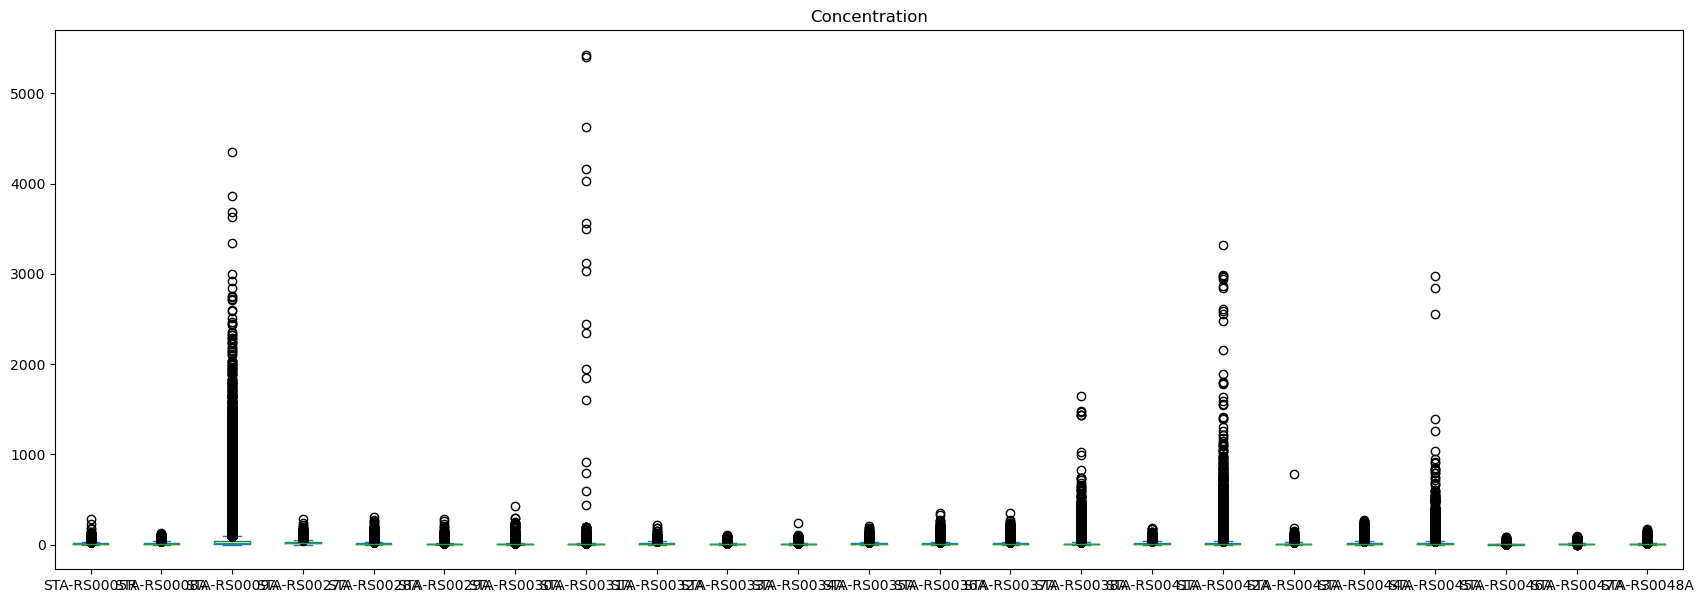




-----------------------------------------------------Pollutant 5 (PM10)-----------------------------------------------------


count    381150.000000
mean         34.414396
std          33.780059
min           0.000000
25%          14.700000
50%          24.323105
75%          41.121628
max        1041.631670
Name: Concentration, dtype: float64

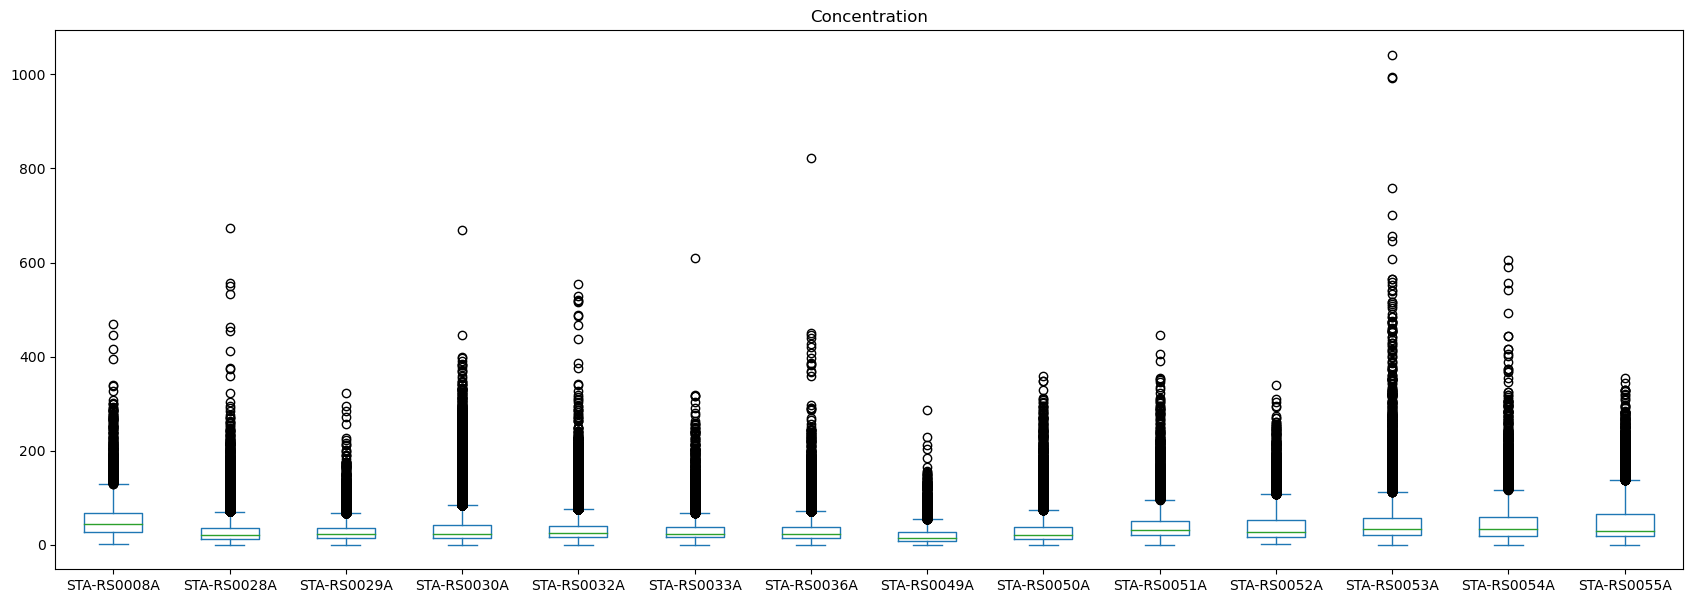




-----------------------------------------------------Pollutant 7 (O3)-----------------------------------------------------


count    517834.000000
mean         49.607263
std          34.197921
min           0.000000
25%          20.000000
50%          45.500000
75%          75.200000
max         303.000000
Name: Concentration, dtype: float64

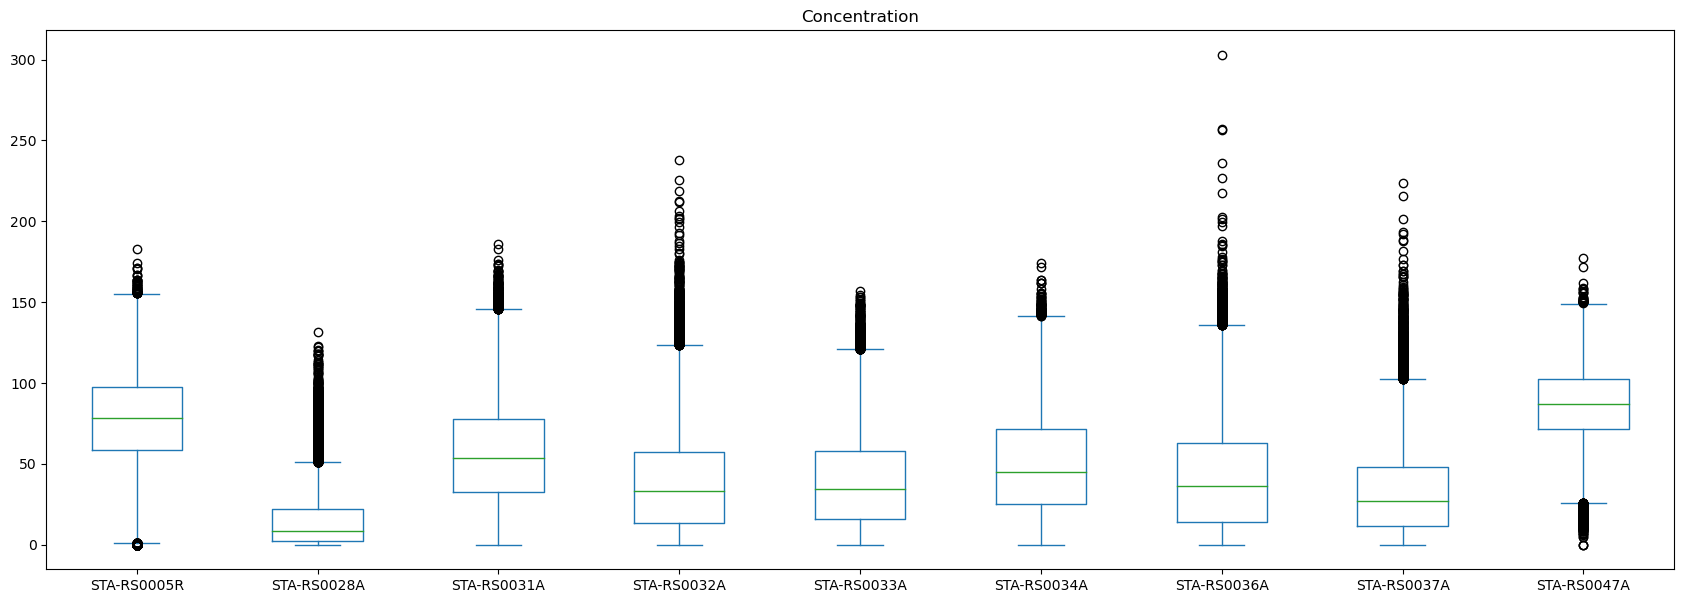




-----------------------------------------------------Pollutant 8 (NO2)-----------------------------------------------------


count    865014.000000
mean         25.298184
std          21.563575
min           0.000000
25%          10.275460
50%          19.700000
75%          34.000000
max        1077.153990
Name: Concentration, dtype: float64

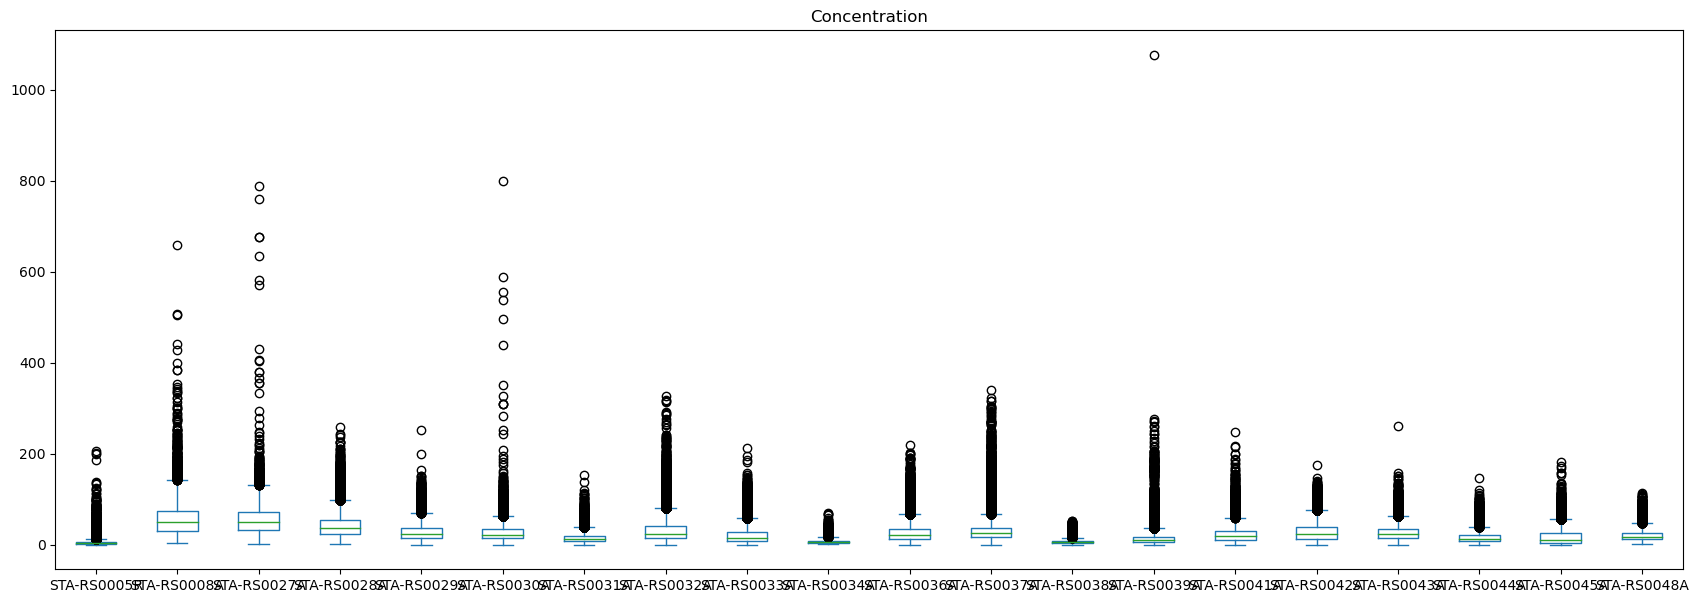




-----------------------------------------------------Pollutant 10 (CO)-----------------------------------------------------


count    1.072725e+06
mean     5.660686e-01
std      8.674574e-01
min      0.000000e+00
25%      2.300000e-01
50%      3.800000e-01
75%      6.600000e-01
max      5.551712e+02
Name: Concentration, dtype: float64

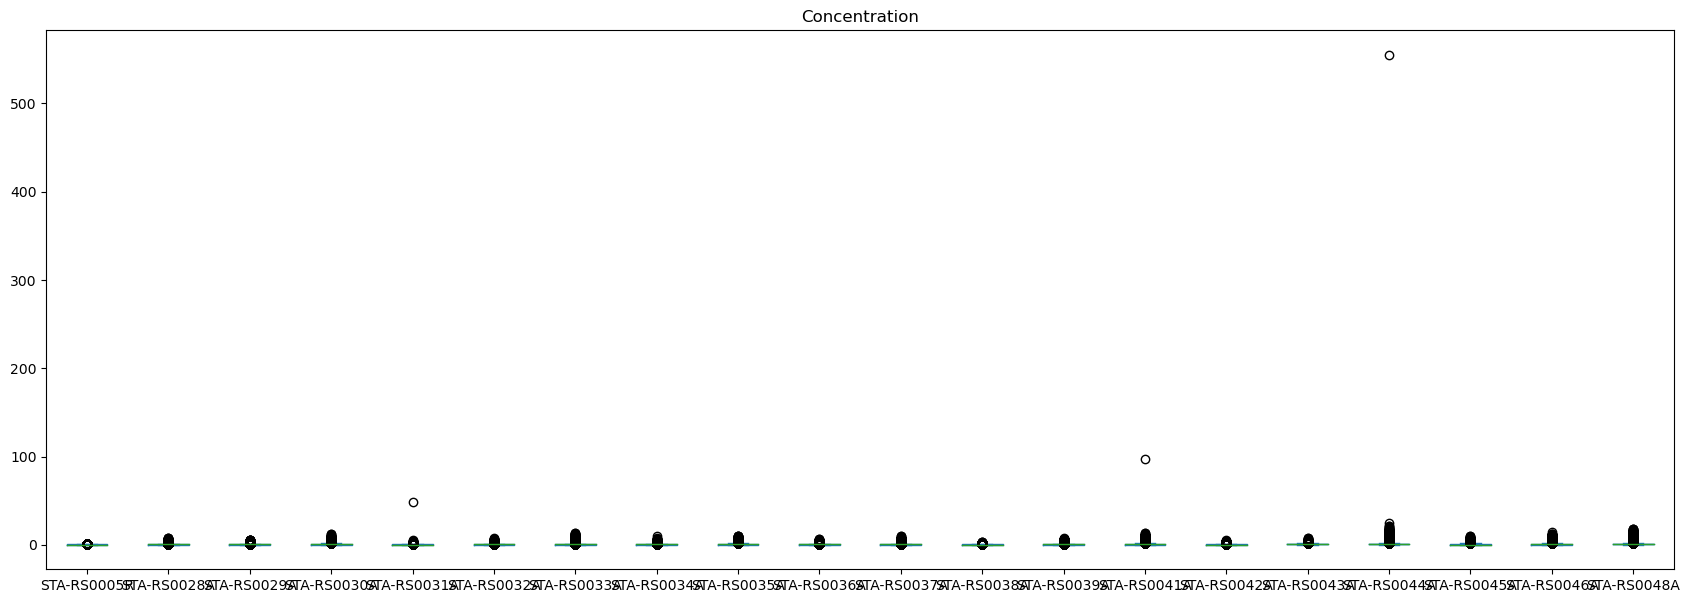




-----------------------------------------------------Pollutant 6001 (PM2.5)-----------------------------------------------------


count    214732.000000
mean         25.336556
std          26.668962
min           0.000000
25%           9.803323
50%          16.808580
75%          29.714610
max         352.868330
Name: Concentration, dtype: float64

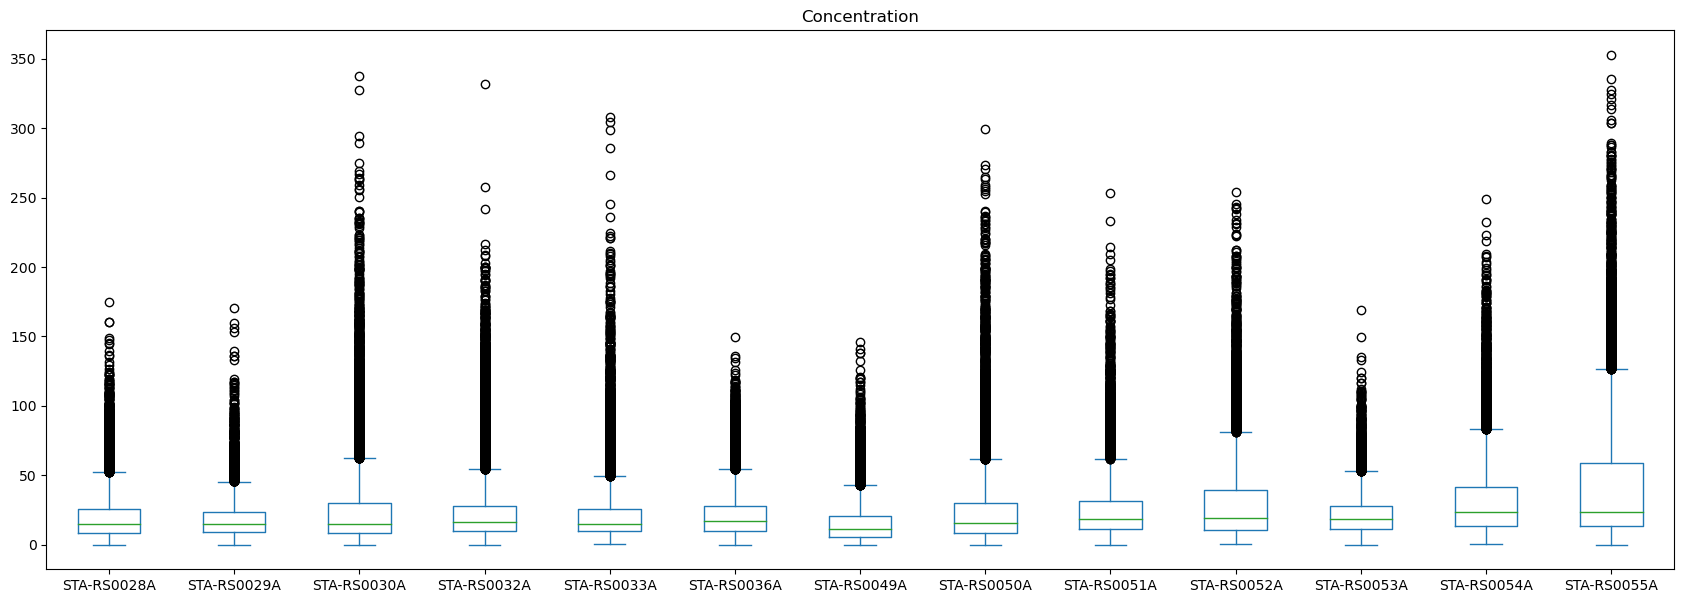

In [184]:
### Outlier analysis of individual stations of Serbia via boxplots
### Warning! This particular code was not initially written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova
### Modified and adapted by Adele Kim https://github.com/Adele-Kim

for i in range(len(pol_codes)):
    print()
    print()
    print()
    print(f'-----------------------------------------------------Pollutant {pol_codes[i]} ({pol_dict[pol_codes[i]]})-----------------------------------------------------')
    display(df_serbia_v5[df_serbia_v5['AirPollutant']==pol_codes[i]]['Concentration'].describe())
    df_serbia_v5[df_serbia_v5['AirPollutant']==pol_codes[i]].plot.box(column="Concentration", by="AirQualityStation", figsize=(21, 7))
    plt.show()




-----------------------------------------------------Pollutant 1 (SO2)-----------------------------------------------------


count    101158.000000
mean          1.447157
std           1.622882
min           0.000000
25%           0.377000
50%           0.956000
75%           1.996000
max          62.934000
Name: Concentration, dtype: float64

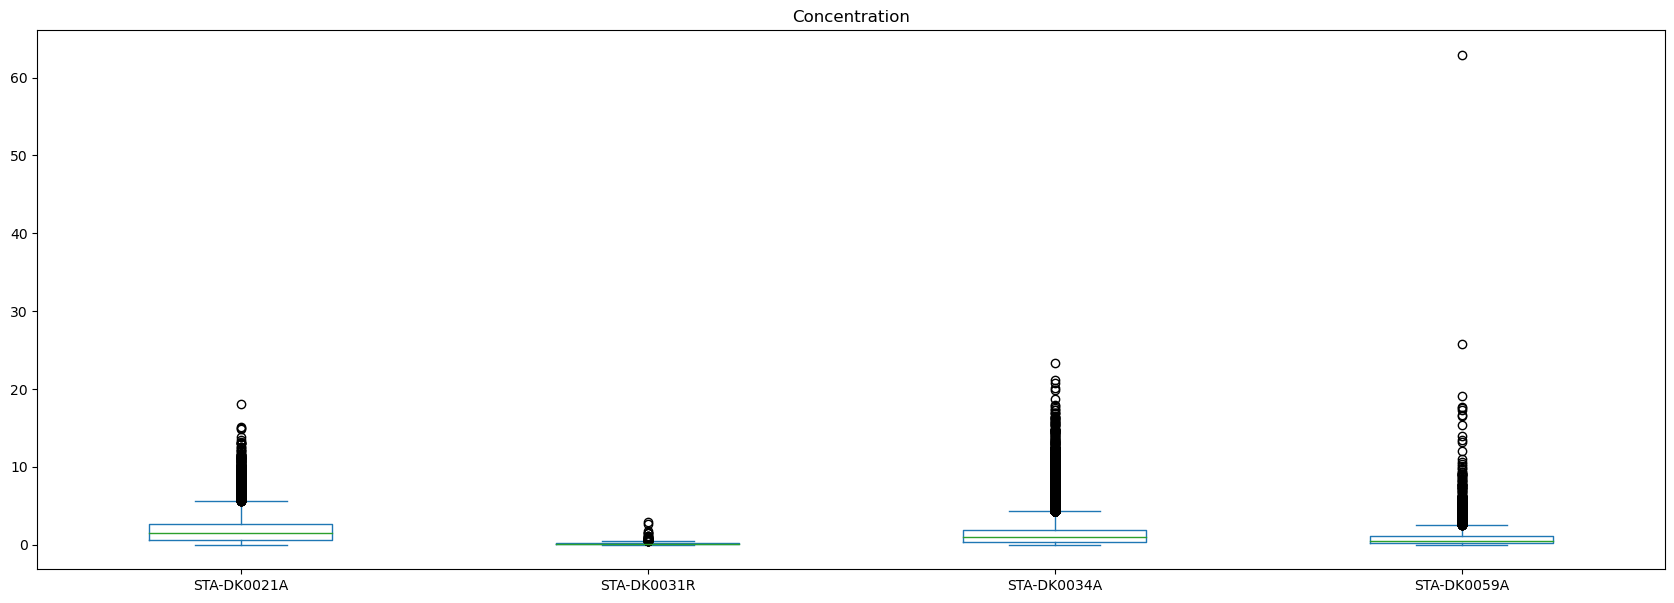




-----------------------------------------------------Pollutant 5 (PM10)-----------------------------------------------------


count    158683.000000
mean         21.057846
std          17.501332
min           0.000000
25%          10.600000
50%          16.750000
75%          26.500000
max         685.700000
Name: Concentration, dtype: float64

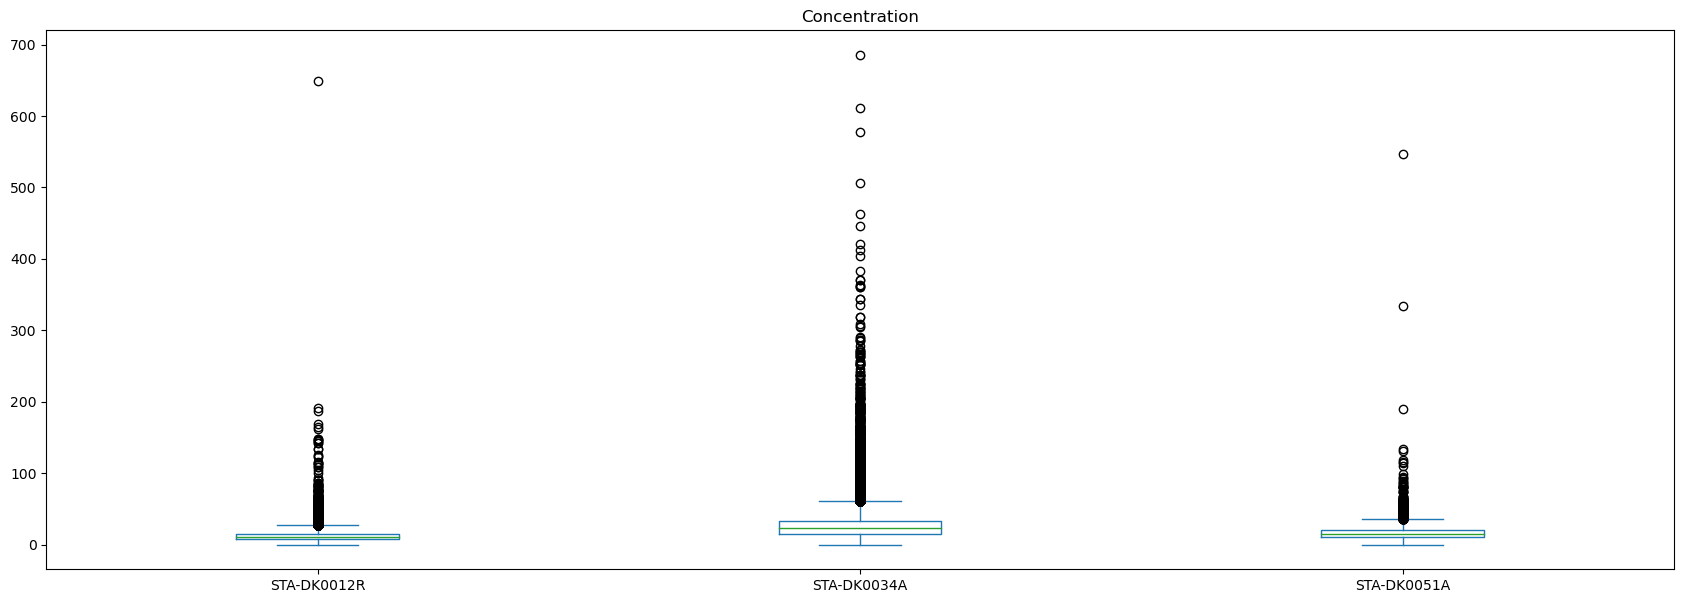




-----------------------------------------------------Pollutant 7 (O3)-----------------------------------------------------


count    662561.000000
mean         57.055692
std          22.837594
min           0.000000
25%          42.310000
50%          58.729000
75%          72.408000
max         306.220000
Name: Concentration, dtype: float64

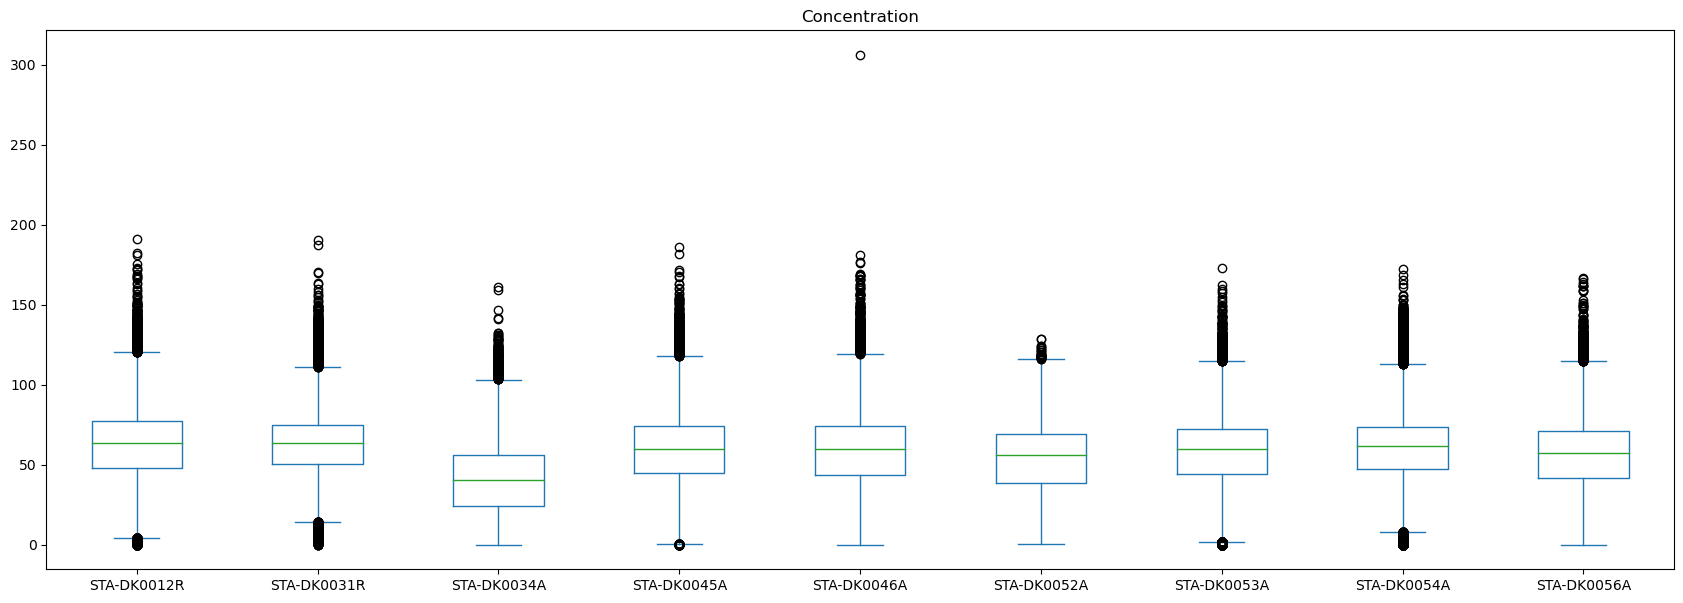




-----------------------------------------------------Pollutant 8 (NO2)-----------------------------------------------------


count    1.035974e+06
mean     1.630176e+01
std      1.789323e+01
min      0.000000e+00
25%      4.330000e+00
50%      9.755000e+00
75%      2.144400e+01
max      2.170430e+02
Name: Concentration, dtype: float64

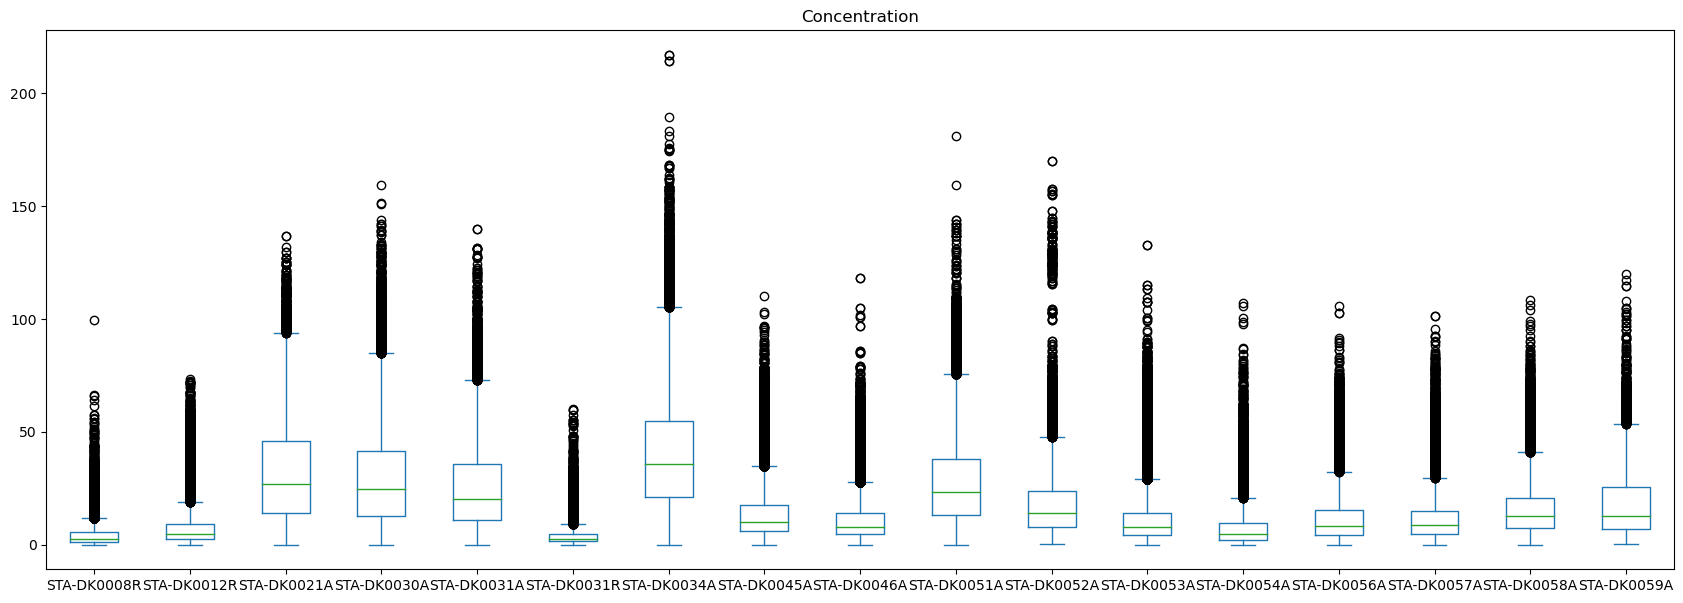




-----------------------------------------------------Pollutant 10 (CO)-----------------------------------------------------


count    437754.000000
mean          0.241158
std           0.403009
min           0.000000
25%           0.161000
50%           0.211000
75%           0.286000
max         241.880000
Name: Concentration, dtype: float64

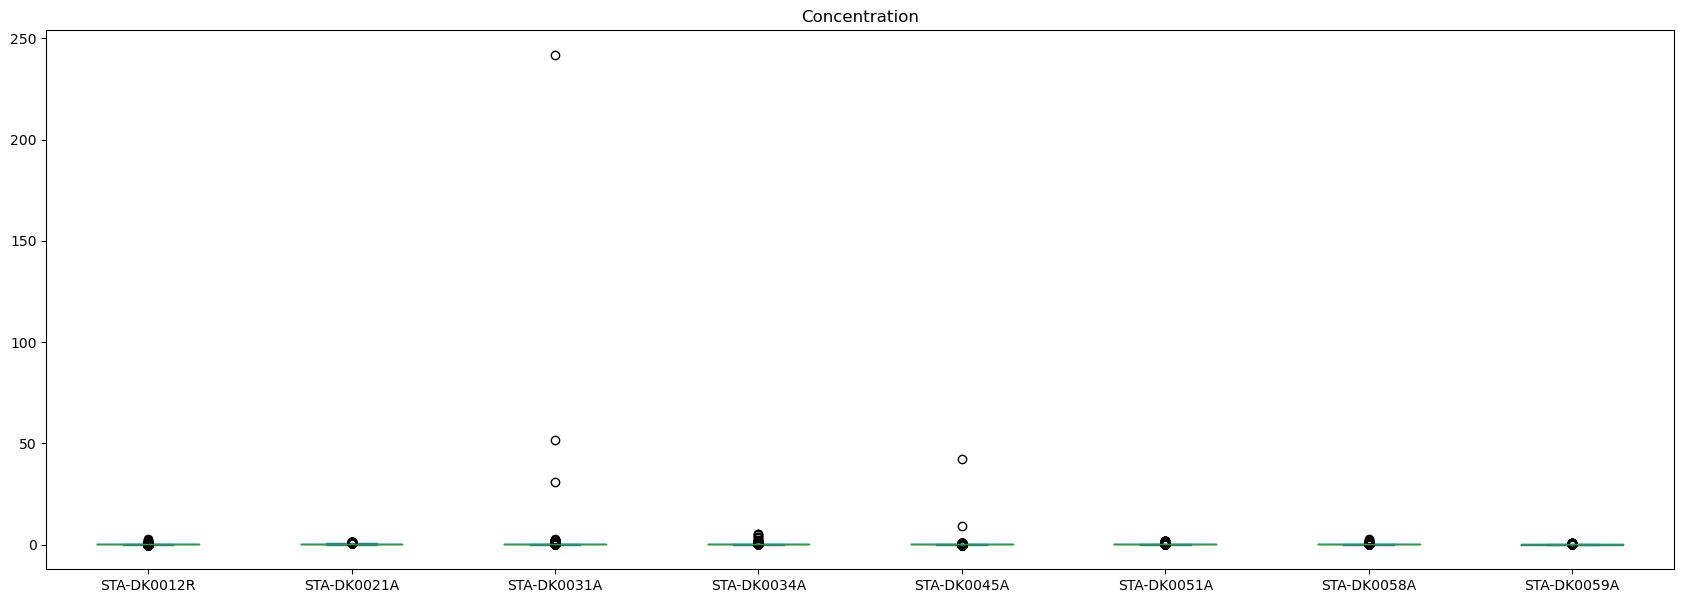




-----------------------------------------------------Pollutant 6001 (PM2.5)-----------------------------------------------------


count    104442.000000
mean         10.036023
std           7.145891
min           0.000000
25%           6.300000
50%           8.700000
75%          12.050000
max         472.800000
Name: Concentration, dtype: float64

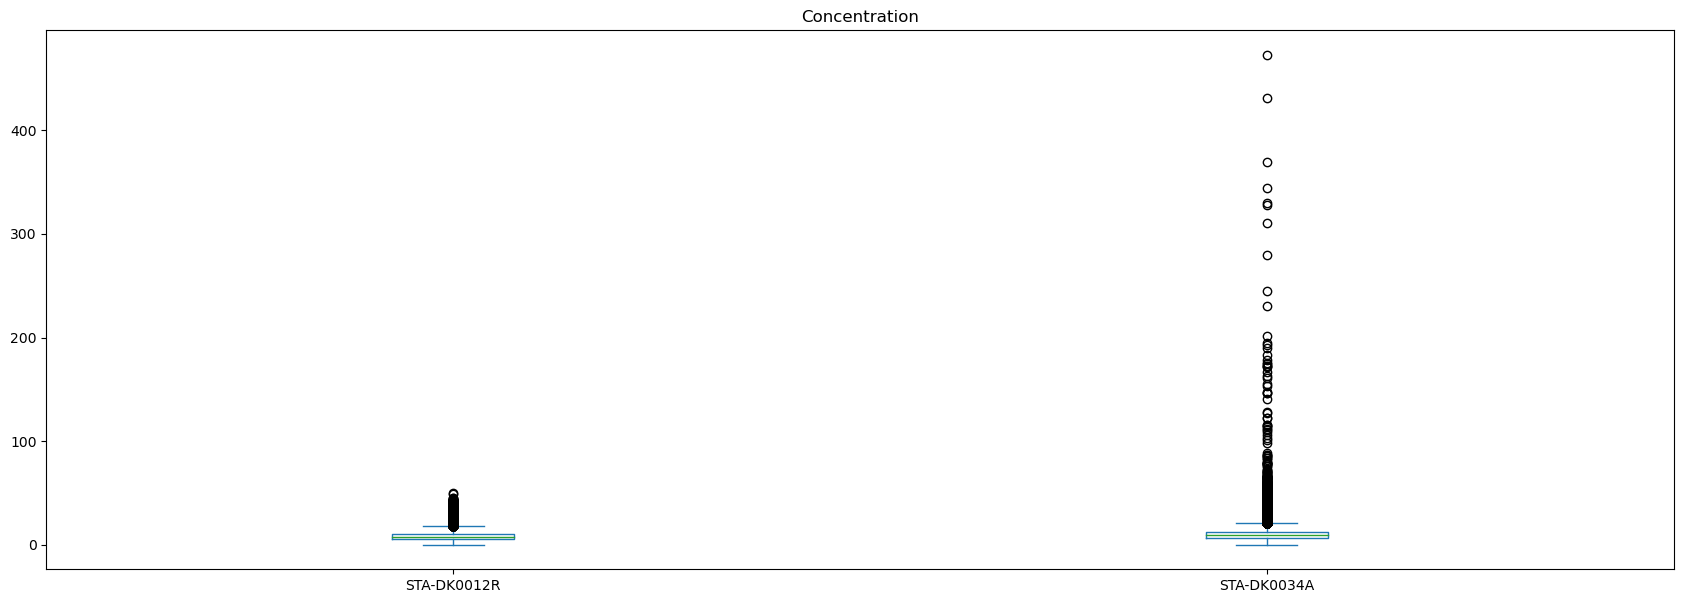

In [185]:
### Outlier analysis of individual stations of Denmark via boxplots
### Warning! This particular code was not initially written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova
### Modified and adapted by Adele Kim https://github.com/Adele-Kim

for i in range(len(pol_codes)):
    print()
    print()
    print()
    print(f'-----------------------------------------------------Pollutant {pol_codes[i]} ({pol_dict[pol_codes[i]]})-----------------------------------------------------')
    display(df_denmark_v5[df_denmark_v5['AirPollutant']==pol_codes[i]]['Concentration'].describe())
    df_denmark_v5[df_denmark_v5['AirPollutant']==pol_codes[i]].plot.box(column="Concentration", by="AirQualityStation", figsize=(21, 7))
    plt.show()

In [186]:
display(df_denmark_v5[df_denmark_v5['AirQualityStation']=='STA-DK0034A']['AirPollutant'].unique())
display(df_denmark_v5[df_denmark_v5['AirQualityStation']=='STA-DK0012R']['AirPollutant'].unique())

array([   1,   10,    5, 6001,    7,    8], dtype=int16)

array([  10,    5, 6001,    7,    8], dtype=int16)

Как мы видим, на боксплотах для загрязнителя 10 (CO) как на датасете Сербии, так и на датасете Дании есть единичные точки вне основных групп. Возможно, завышенные рассчитанные доли выбросов были связаны с данными точками.<br>
Для загрязнителя 1 (SO2) на датасете Дании мы видим что имеются данные лишь трех станций. Да и вообще оказывается что в Дании не очень хорошо с данными по измерениям загрязнителей, лишь в одной станции измеряются 6 загрязнителей из 6. И лишь в одной - 5 загрязнителей из 6.
<br>
Несмотря на то что боксплоты и расчет выбросов по межквантильному интервалу иногда используется для выбора отсекающего интервала выбросов, в нашем случае такой подход не является оптимальным. Мы не можем в данный момент достоверно различить какие точки считаются выбросами, а какие нет. И так как мы не можем в данный момент подобрать хороший способ избавления от выбросов (как замена на медиану, так и удаление имеют свои недостатки), то логичнее будет на данном этапе оставить датасет в том виде в котором он есть, но при последующих этапах исследовательского анализа учитывать возможное присутствие выбросов.

###  Part2: Comparison of station categories

In [187]:
### Define function to create merged data grouped by AirQualityStationArea

def combine_plot_data_area(Pollutant,group='AirQualityStationArea'):
    RS_plot1 = df_serbia_v5[df_serbia_v5['AirPollutant']==Pollutant].groupby(group)['Concentration'].median().reset_index()
    RS_plot1.insert(0,'Country','Serbia')
    DK_plot1 = df_denmark_v5[df_denmark_v5['AirPollutant']==Pollutant].groupby(group)['Concentration'].median().reset_index()
    DK_plot1.insert(0,'Country','Denmark')
    plot1_merged = (pd.concat([RS_plot1,DK_plot1], axis=0)).reset_index(drop=True)
    return plot1_merged

In [188]:
### Define function to create merged data grouped by AirQualityStationType

def combine_plot_data_type(Pollutant,group='AirQualityStationType'):
    RS_plot1 = df_serbia_v5[df_serbia_v5['AirPollutant']==Pollutant].groupby(group)['Concentration'].median().reset_index()
    RS_plot1.insert(0,'Country','Serbia')
    DK_plot1 = df_denmark_v5[df_denmark_v5['AirPollutant']==Pollutant].groupby(group)['Concentration'].median().reset_index()
    DK_plot1.insert(0,'Country','Denmark')
    plot2_merged = (pd.concat([RS_plot1,DK_plot1], axis=0)).reset_index(drop=True)
    return plot2_merged

In [189]:
### Define function to plot bar subplots for selected pollutant

def easy_plot(Pollutant, df1, df2):
    f, axes = plt.subplots(1, 2,figsize=(18,6))
    order_list1 = ['rural', 'rural-regional', 'suburban', 'urban'] 
    order_list2 = ['background', 'industrial', 'traffic']
    sns.barplot(x = 'AirQualityStationArea', y = 'Concentration', hue = 'Country', data = df1,
            palette = 'coolwarm_r', edgecolor = 'w', order=order_list1, ax=axes[0])
    sns.barplot(x = 'AirQualityStationType', y = 'Concentration', hue = 'Country', data = df2,
            palette = 'coolwarm_r', edgecolor = 'w', order=order_list2, ax=axes[1])
    axes[0].legend(title_fontsize=16,bbox_to_anchor=(0.95,1), loc=2, borderaxespad=0.)
    axes[1].legend(title_fontsize=16,bbox_to_anchor=(0.95,1), loc=2, borderaxespad=0.)
    f.suptitle(f'Сравнение медианных значений концентраций загрязнителя {Pollutant} ({pol_dict[Pollutant]}) для разных категорий станций', fontsize=18)
    plt.show()

In [190]:
### Define quick plot function

def ez_plot(Pollutant):
    easy_plot(Pollutant,(combine_plot_data_area(Pollutant)),(combine_plot_data_type(Pollutant)))

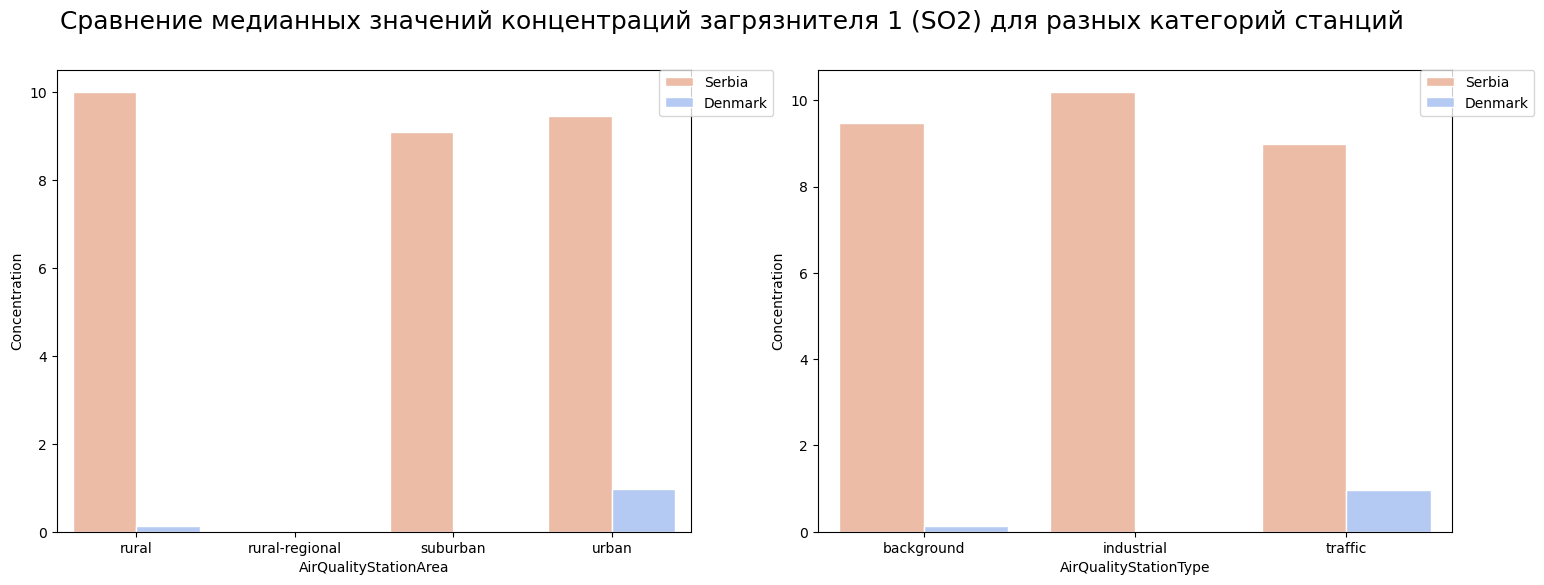

In [191]:
ez_plot(1)

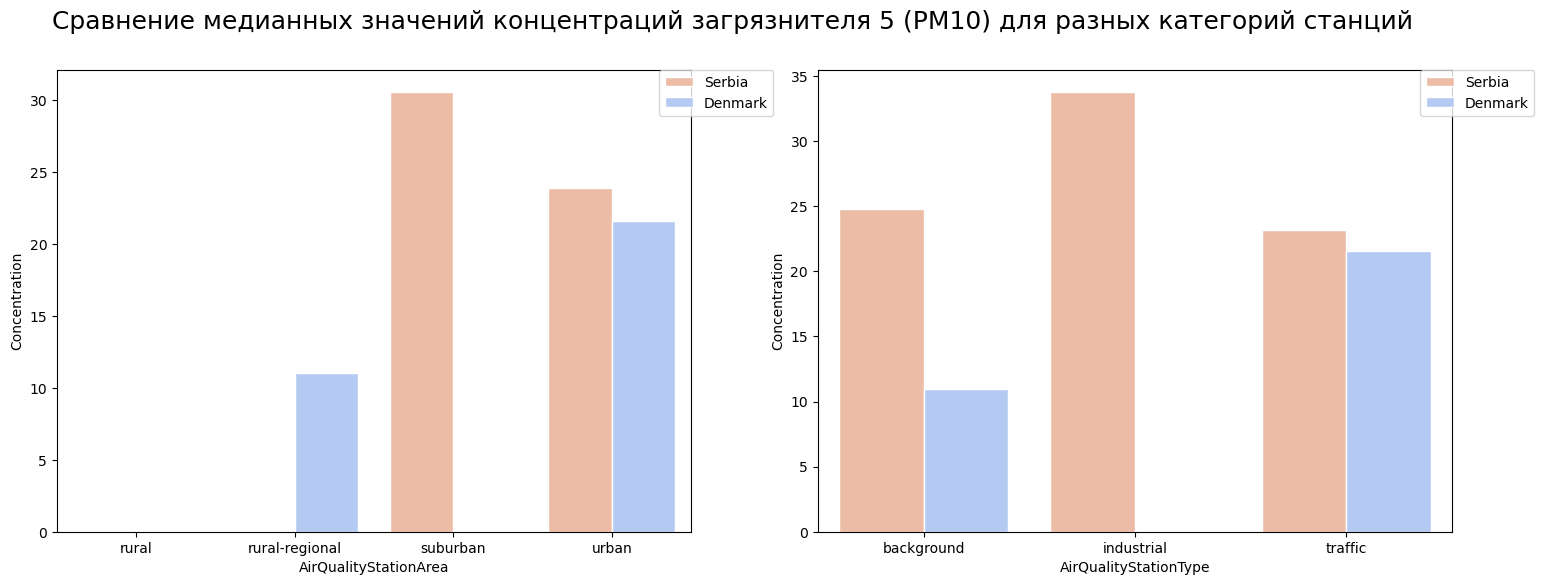

In [192]:
ez_plot(5)

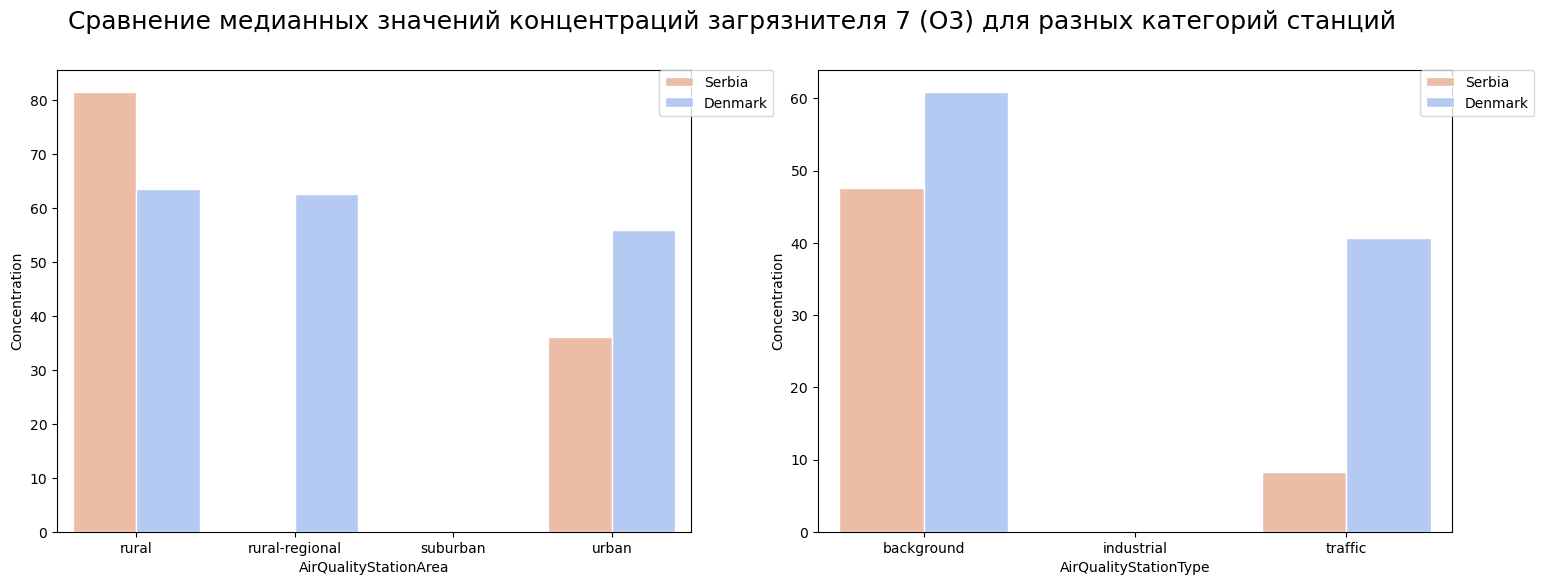

In [193]:
ez_plot(7)

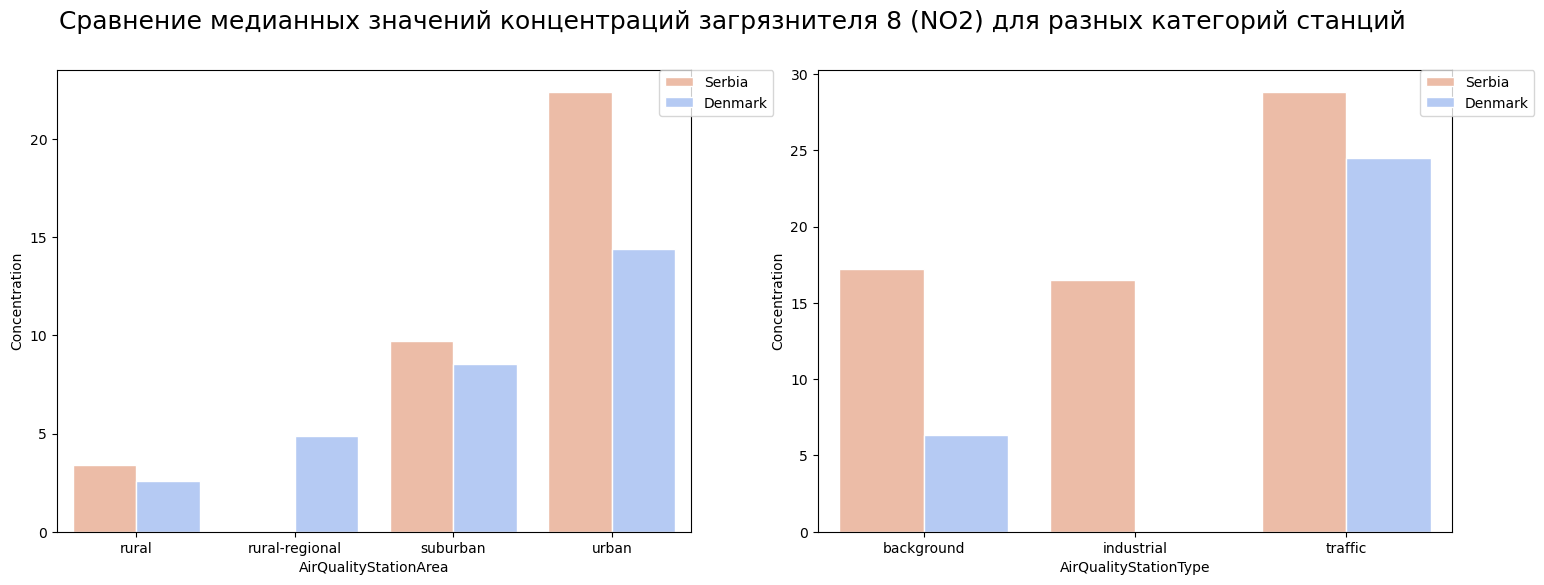

In [194]:
ez_plot(8)

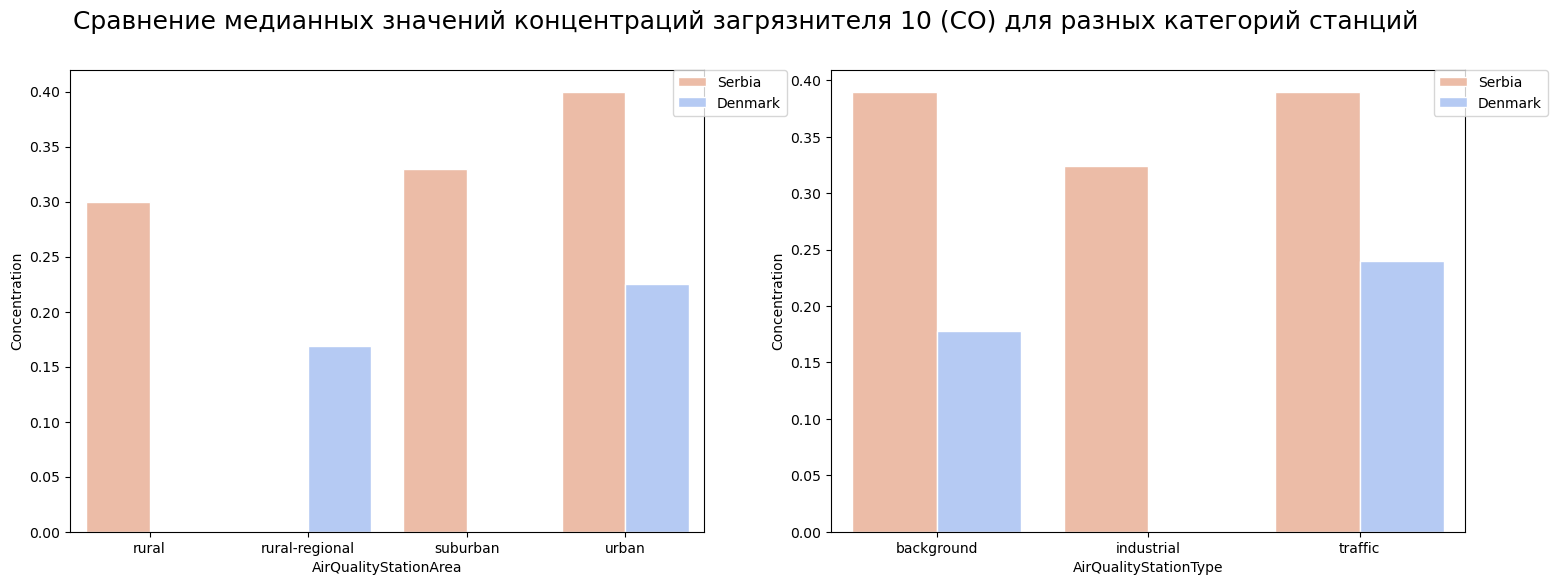

In [195]:
ez_plot(10)

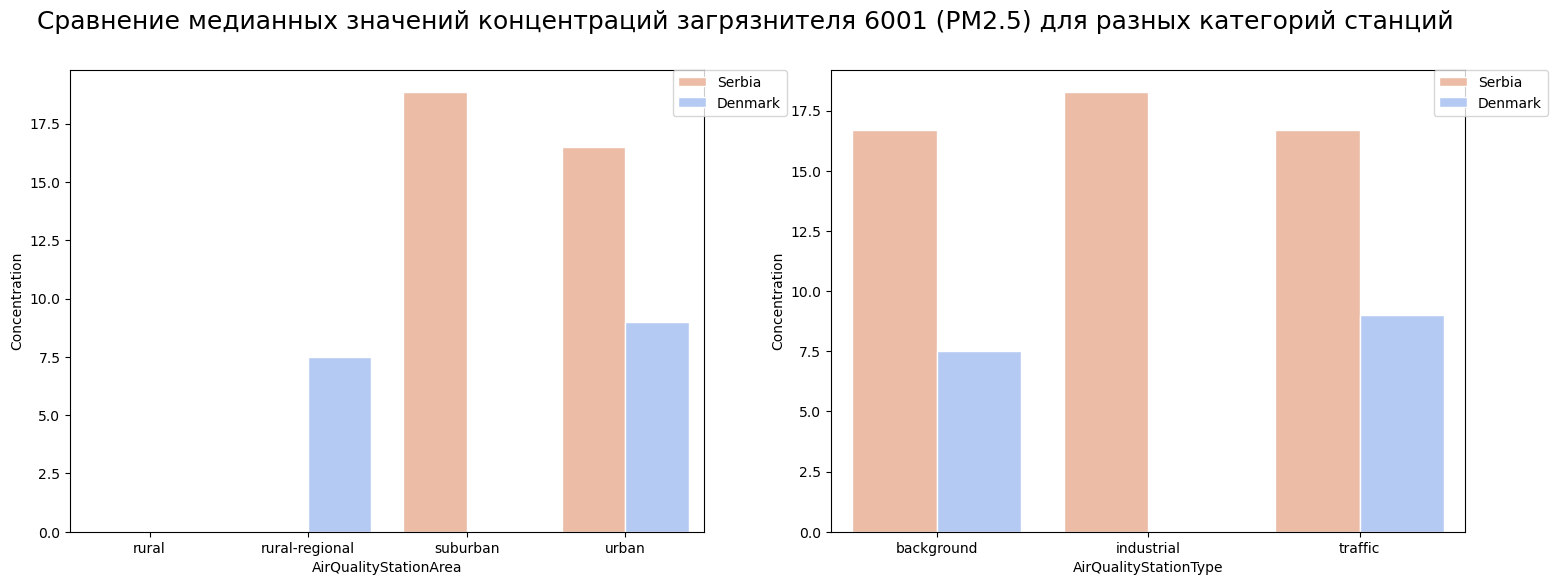

In [196]:
ez_plot(6001)

###  Part3:Prepare timeseries data

In [197]:
### Prepare timeseries data aggregated by mean()
### Warning! This particular code was not initially written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova
### Modified and adapted by Adele Kim https://github.com/Adele-Kim

def mean_timeseries(df):
    df_mean_list = list()
    for i in range(len(pol_codes)):
        df_mean_list.append(df[df['AirPollutant']==pol_codes[i]].groupby('DatetimeEnd', as_index=False)['Concentration'].mean())
        df_mean_list[i].rename(columns={'Concentration': pol_dict[pol_codes[i]]}, inplace=True)
        timeseries = reduce(lambda df1, df2: df1.merge(df2, how='outer', left_on=['DatetimeEnd'], right_on=['DatetimeEnd']), df_mean_list)
    return timeseries

Подумать, а можно ли тут было использовать median() вместо mean()? Не минимизировало бы использование медианы вклад выбросов и не ухудшило ли бы каким-нибудь образом качество timeseries?

In [198]:
timeseries_denmark = mean_timeseries(df_denmark_v5)
timeseries_serbia = mean_timeseries(df_serbia_v5)

In [199]:
timeseries_denmark2 = timeseries_denmark.copy()
timeseries_serbia2 = timeseries_serbia.copy()

In [200]:
timeseries_denmark2 = timeseries_denmark2.set_index('DatetimeEnd')
timeseries_serbia2 = timeseries_serbia2.set_index('DatetimeEnd')

###  Part4: Correlation between pollutants

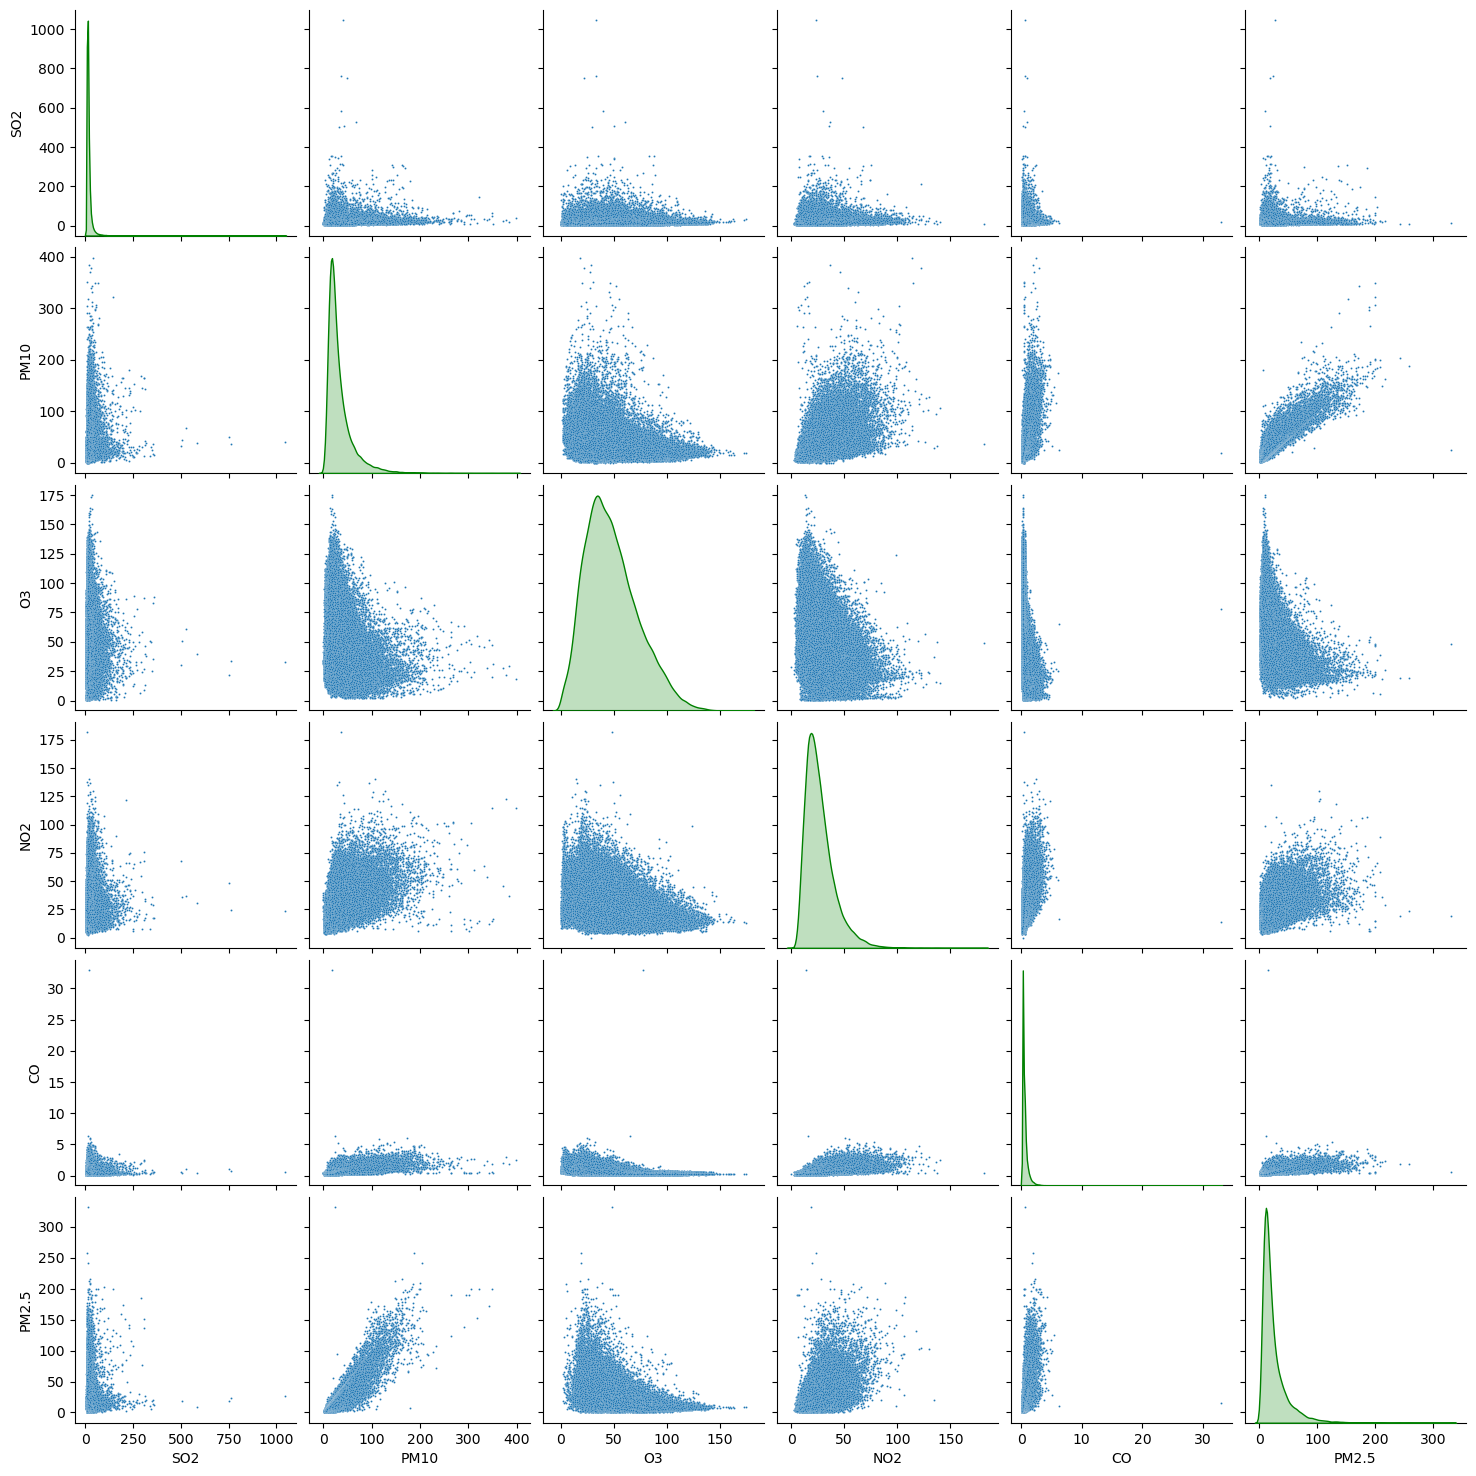

In [201]:
### Check correlation of pollutants between each other via pairplot in Serbia dataset 
### Warning! This particular code was not written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova

sns.pairplot(timeseries_serbia, diag_kind='kde', kind='scatter', plot_kws={"s": 2}, diag_kws={'color':'green'})

<AxesSubplot:>

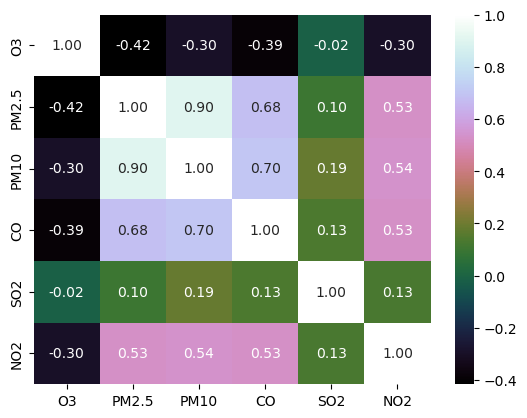

In [202]:
### Check correlation of pollutants between each other via heatmap in Serbia dataset 
### Warning! This particular code was not written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova

sns.heatmap(timeseries_serbia.loc[:, pol_dict.values()].corr(), annot=True, fmt=".2f", cmap='cubehelix')

Наиболее заметны корреляция PM2.5 c PM10, CO c PM10, CO c PM2.5. Посмотрим изменится ли картина при выборе отдельных станций, на примере 1 станции Сербии с наибольшим количеством данных.

In [204]:
timeseries_RS0036A = mean_timeseries(df_serbia_v5[df_serbia_v5['AirQualityStation']=='STA-RS0036A'])
timeseries_RS0036A.set_index('DatetimeEnd')

SO2    PM10   O3     NO2    CO  PM2.5
DatetimeEnd                                                       
2014-01-13 19:00:00+01:00  57.86   91.56  6.8   83.93  0.93    NaN
2014-01-13 20:00:00+01:00  44.74  103.16  6.6   82.28  1.28    NaN
2014-01-13 21:00:00+01:00  60.22  116.25  8.6   83.72  1.86    NaN
2014-01-13 22:00:00+01:00  56.58  121.12  9.0   97.49  2.44    NaN
2014-01-13 23:00:00+01:00  44.71  115.61  7.8  119.03  2.67    NaN
...                          ...     ...  ...     ...   ...    ...
2018-08-30 06:00:00+01:00    NaN     NaN  NaN     NaN  0.42    NaN
2018-10-17 22:00:00+01:00    NaN     NaN  NaN     NaN  0.44    NaN
2018-10-20 23:00:00+01:00    NaN     NaN  NaN     NaN  0.50    NaN
2018-10-24 00:00:00+01:00    NaN     NaN  NaN     NaN  0.41    NaN
2018-11-20 08:00:00+01:00    NaN     NaN  NaN     NaN  0.56    NaN

[85466 rows x 6 columns]

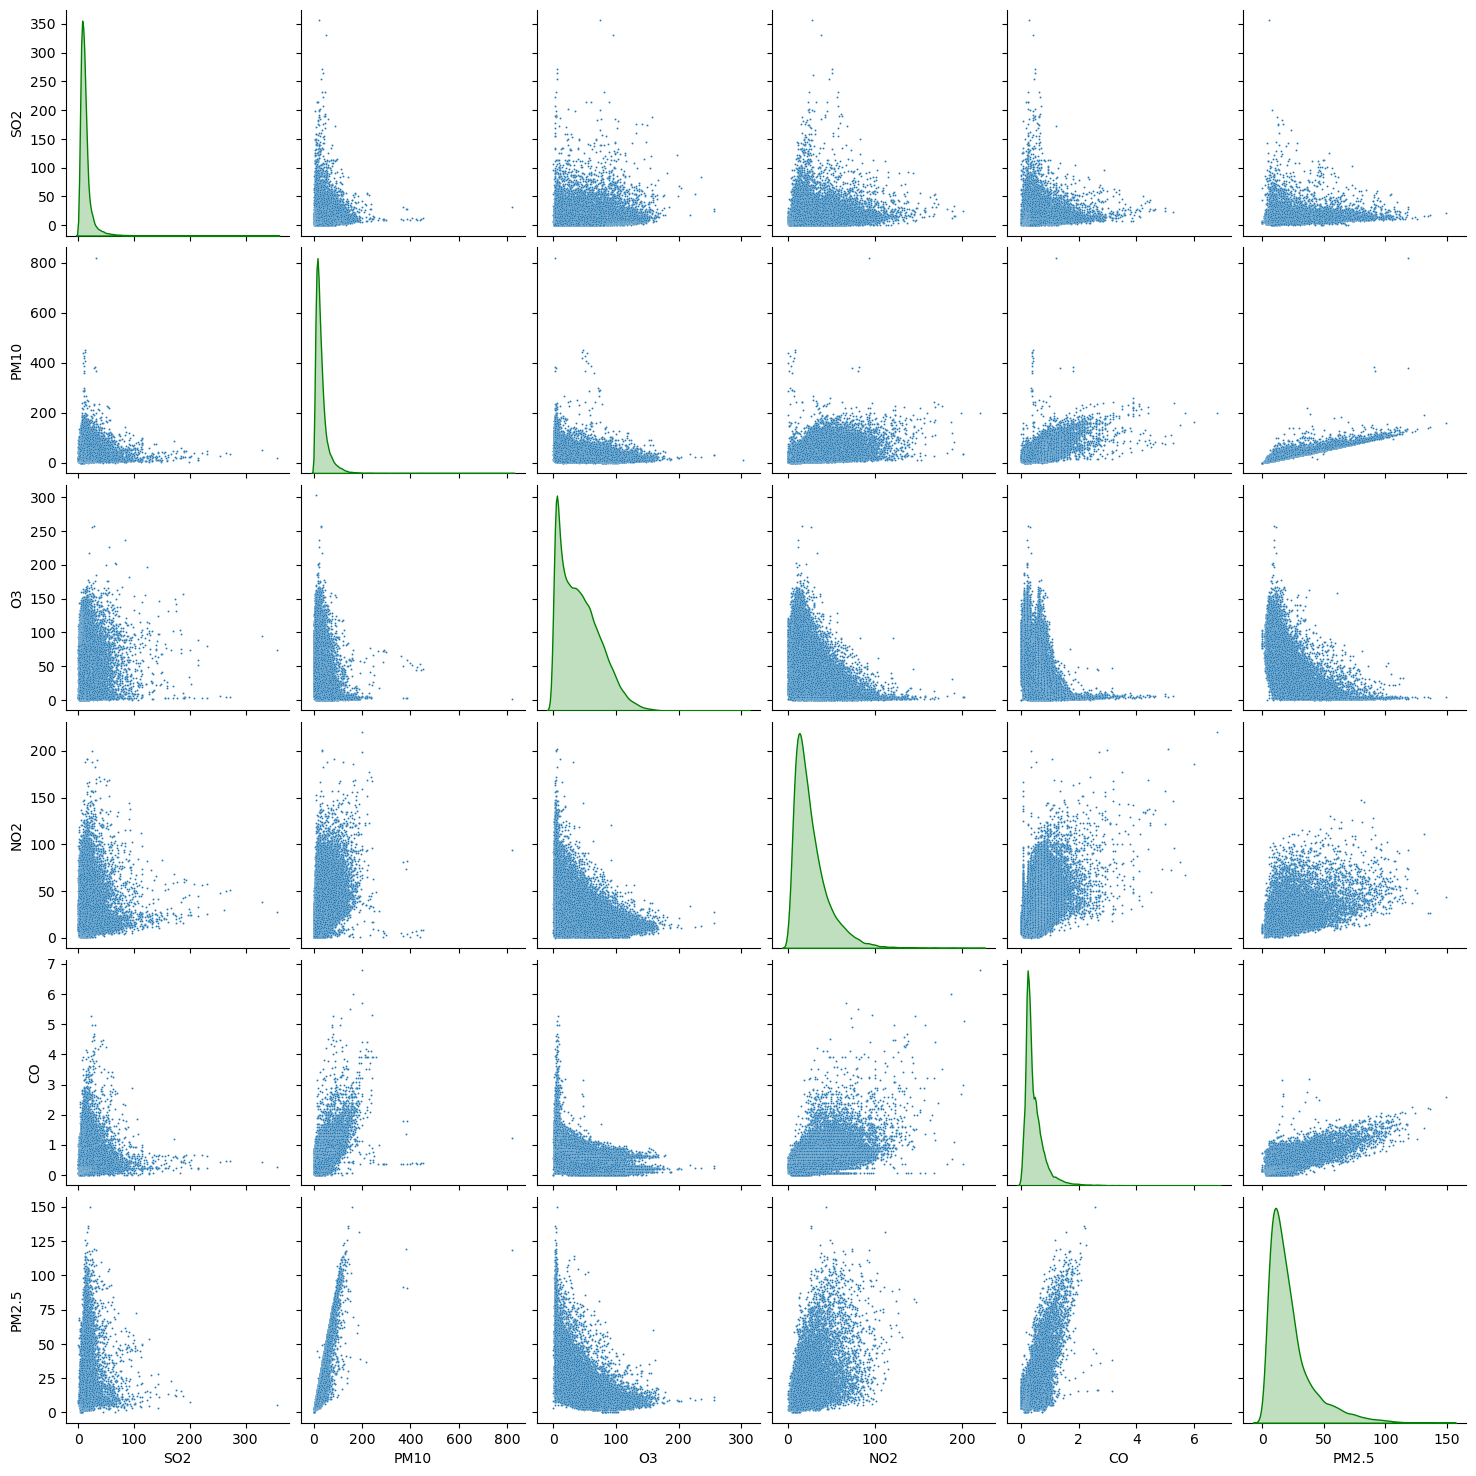

In [205]:
### Check correlation of pollutants between each other via pairplot for STA-RS0036A station
### Warning! This particular code was not written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova

sns.pairplot(timeseries_RS0036A, diag_kind='kde', kind='scatter', plot_kws={"s": 2}, diag_kws={'color':'green'})

<AxesSubplot:>

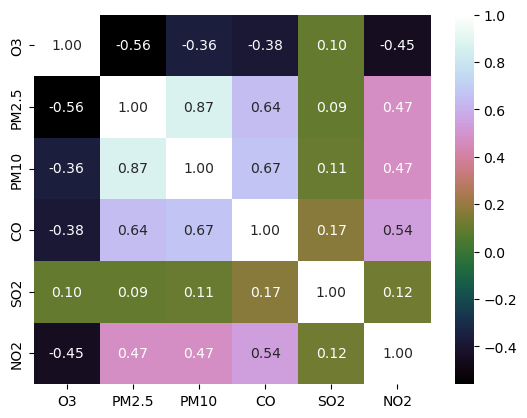

In [206]:
### Check correlation of pollutants between each other via heatmap for STA-RS0036A station
### Warning! This particular code was not written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova

sns.heatmap(timeseries_RS0036A.loc[:, pol_dict.values()].corr(), annot=True, fmt=".2f", cmap='cubehelix')

Ка мы видим корреляция между загрязнителями практически не изменилась.

###  Part5: Timeseries

В начала посмотрим на временные ряды по странам, а затем по нескольким выбранным станциям.

In [207]:
### Define dunction to plot timeseries based on all data
### Warning! This particular code was not initially written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova
### Modified and adapted by Adele Kim https://github.com/Adele-Kim

def plot_timeseries_all(df):
    for pollutant in pol_codes:
        axs = plt.gca()
        df[pol_dict[pollutant]].plot(x='DatetimeEnd', xlabel="Year", ylabel="Concentration", title='df',  y='Concentration', c='tab:blue', figsize=(21,7), ax=axs)
        plt.legend([pol_dict[pollutant]])
        plt.show()

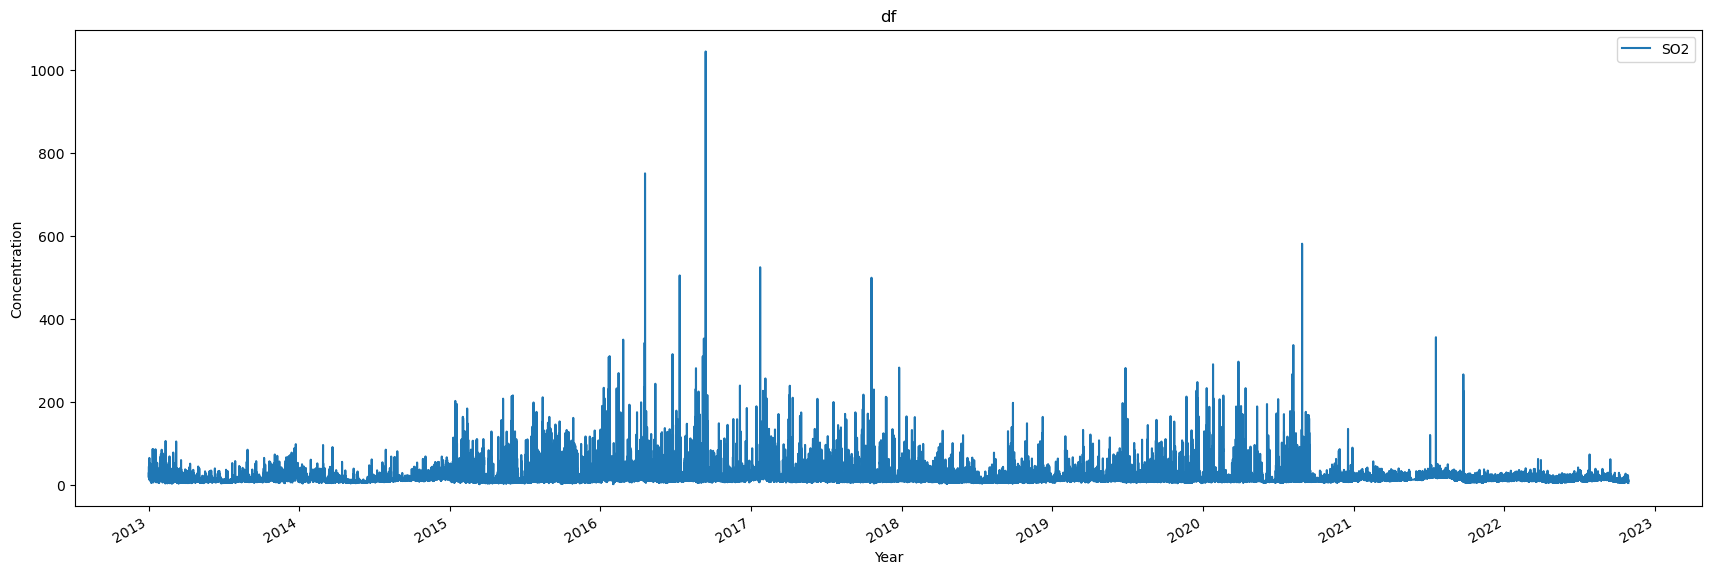

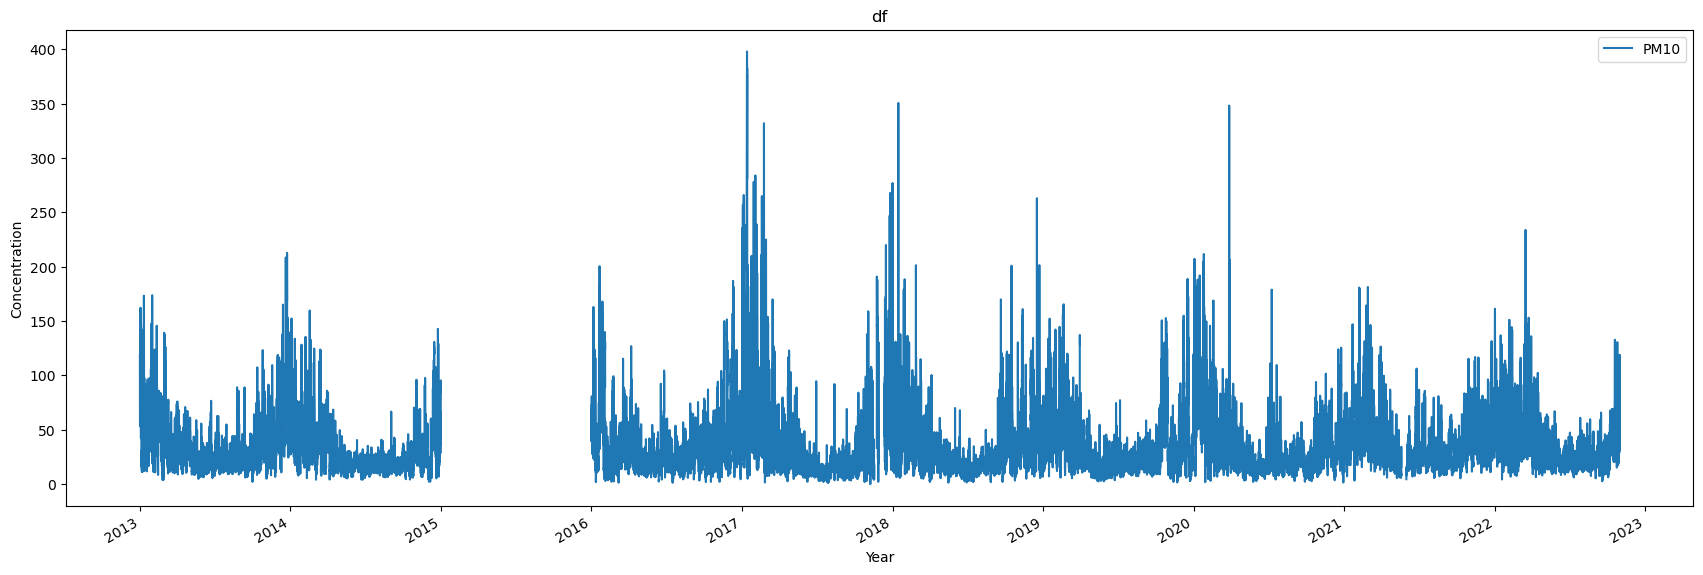

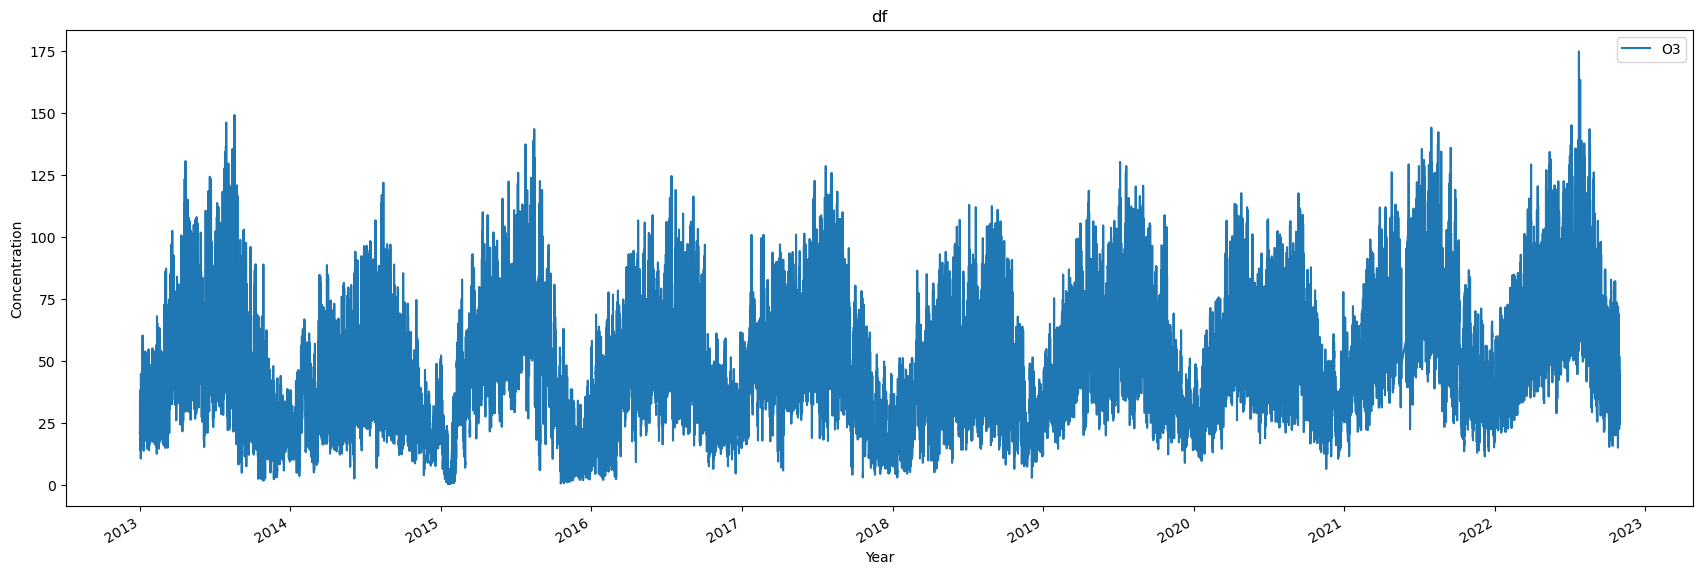

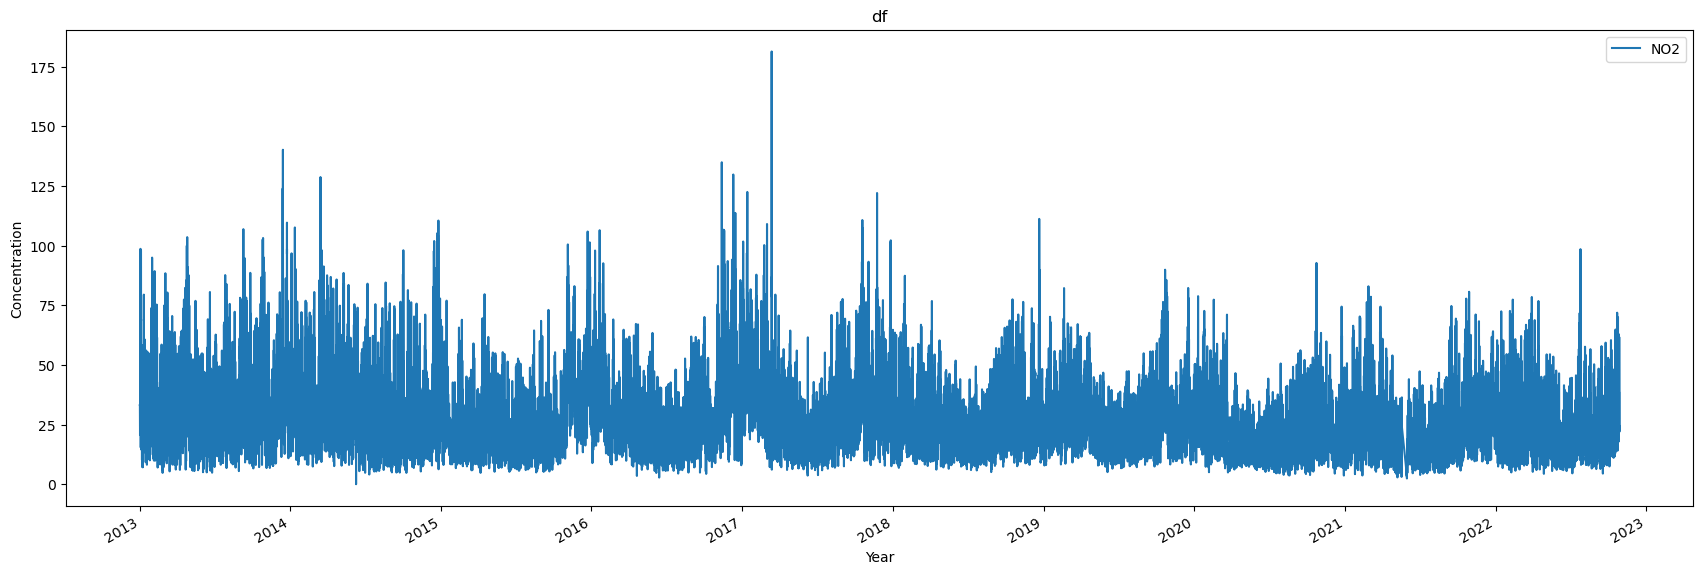

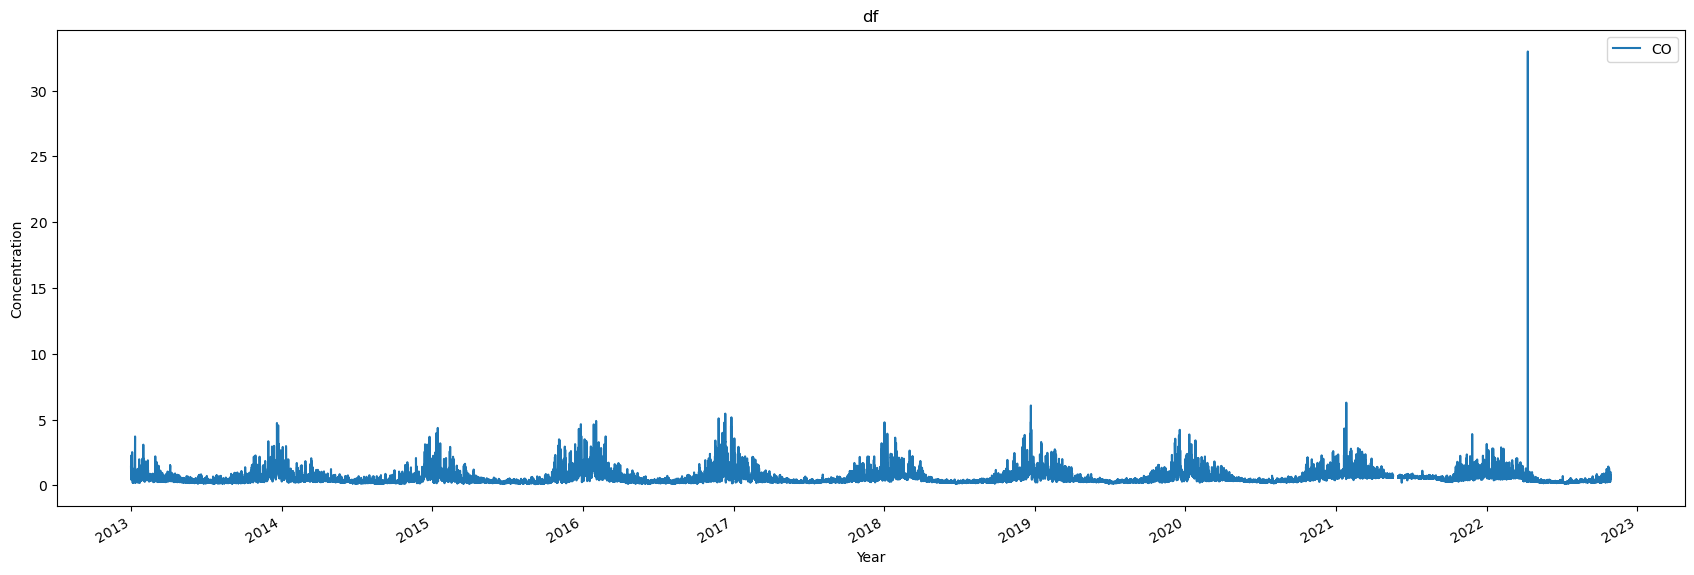

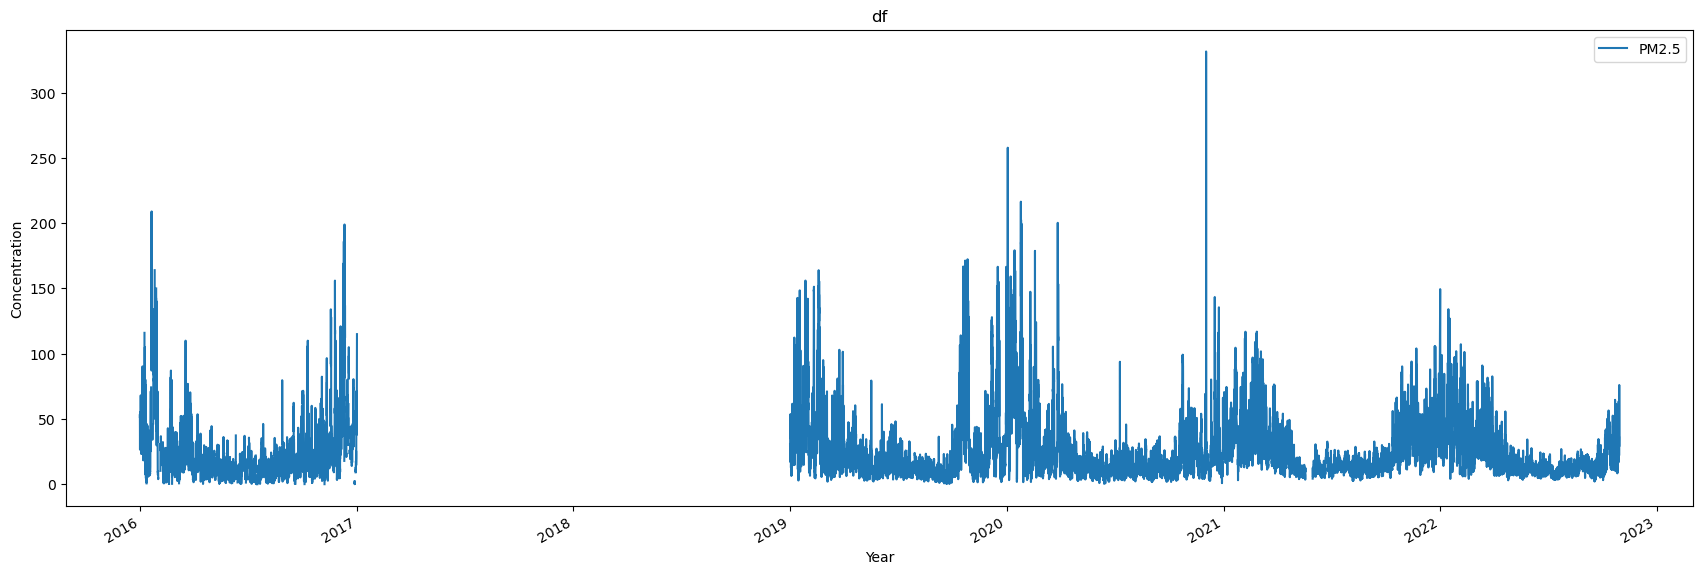

In [208]:
### Plot timeseries based on combined mean data for all Serbia

plot_timeseries_all(timeseries_serbia2)

Для усредненному timeseries по всем станциям Сербии хорошо видна сезонность для 1(SO2), 5(PM10), 7(O3), 10(CO), 6001(PM2.5). Для 8(NO2) тоже вполне можно уловить определенную сезонность/цикличность, но чуть менее выраженную, чем для других загрязнителей.

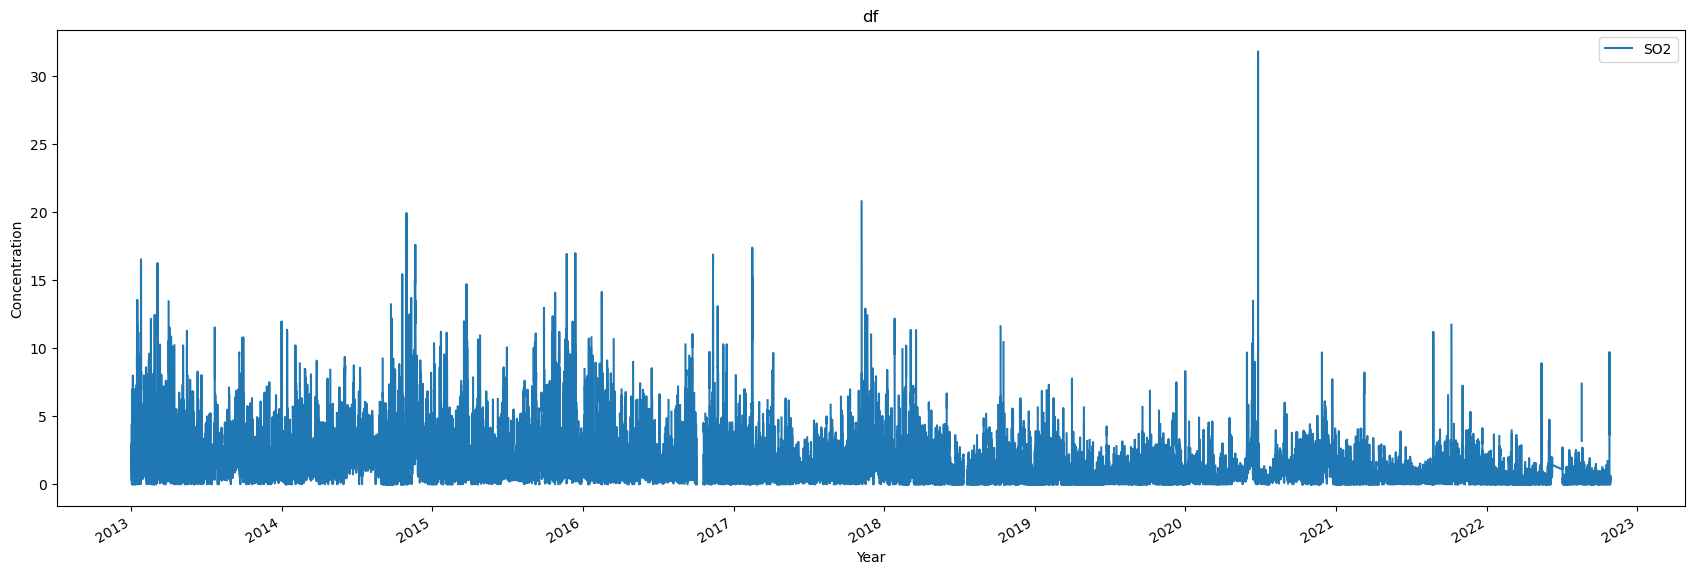

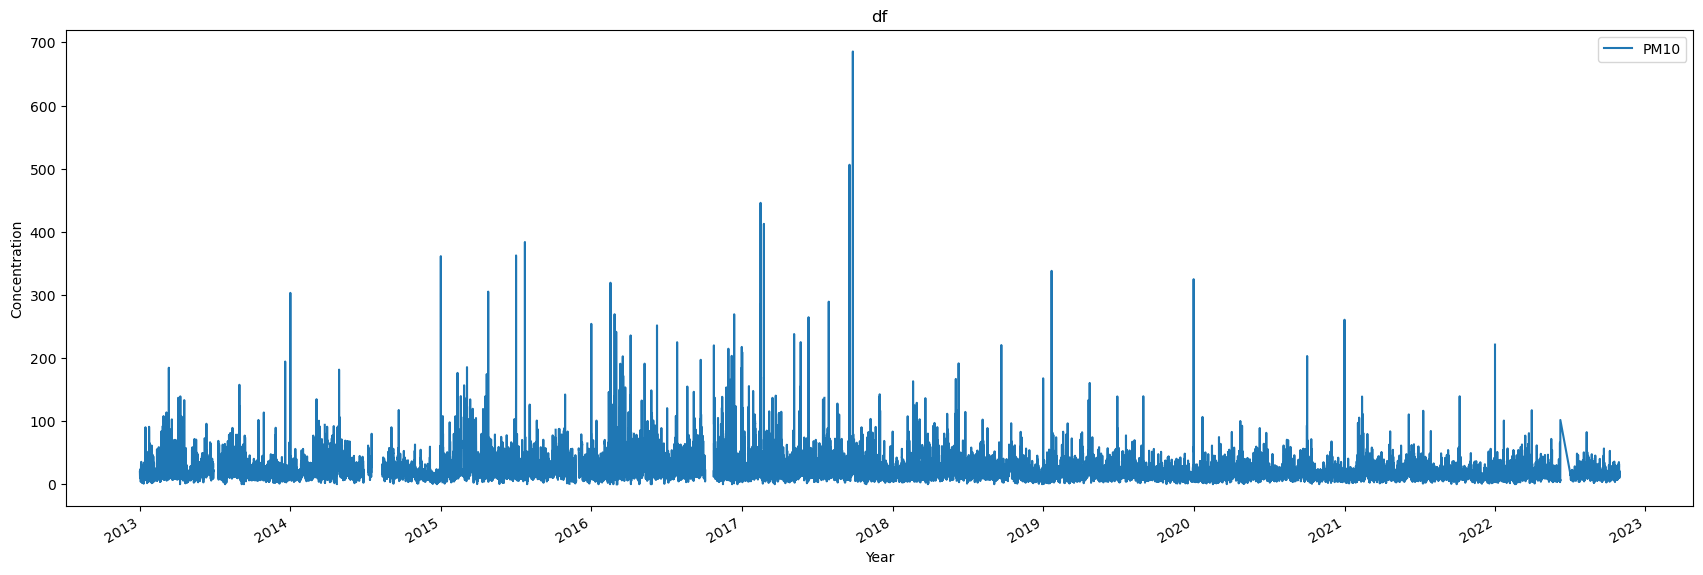

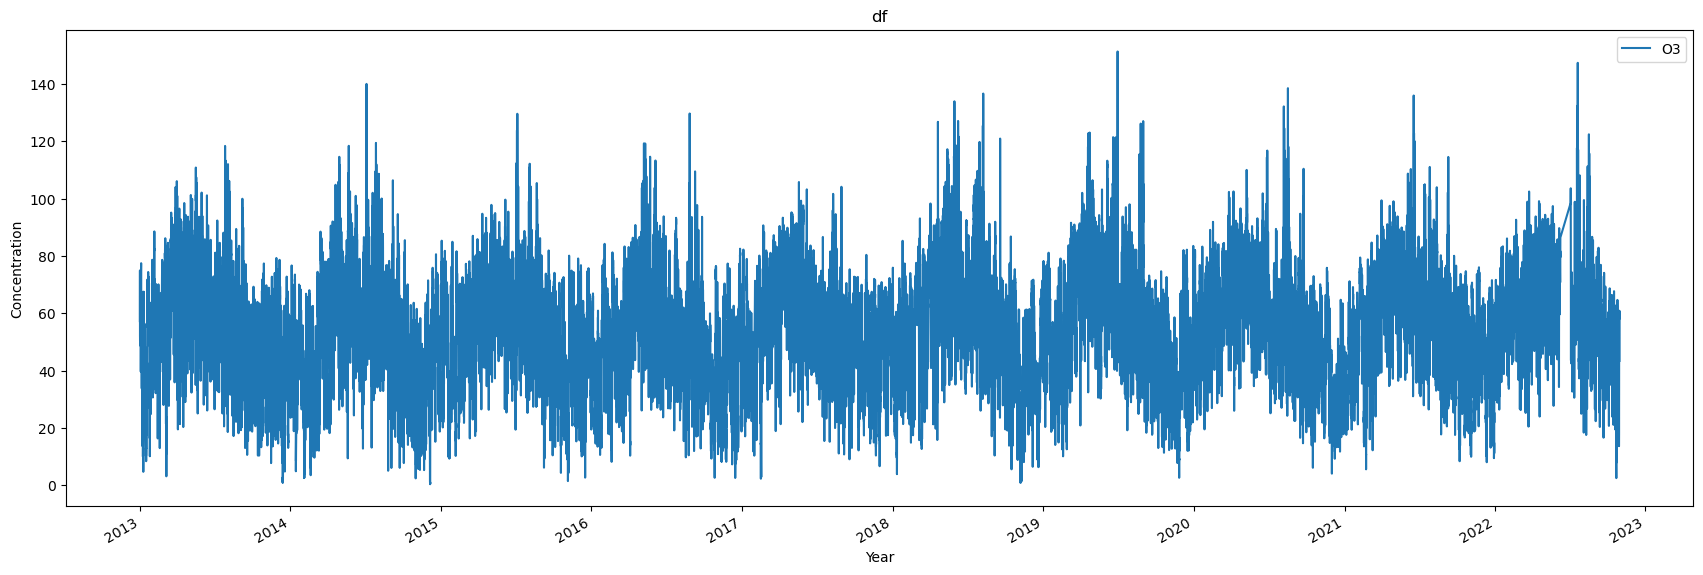

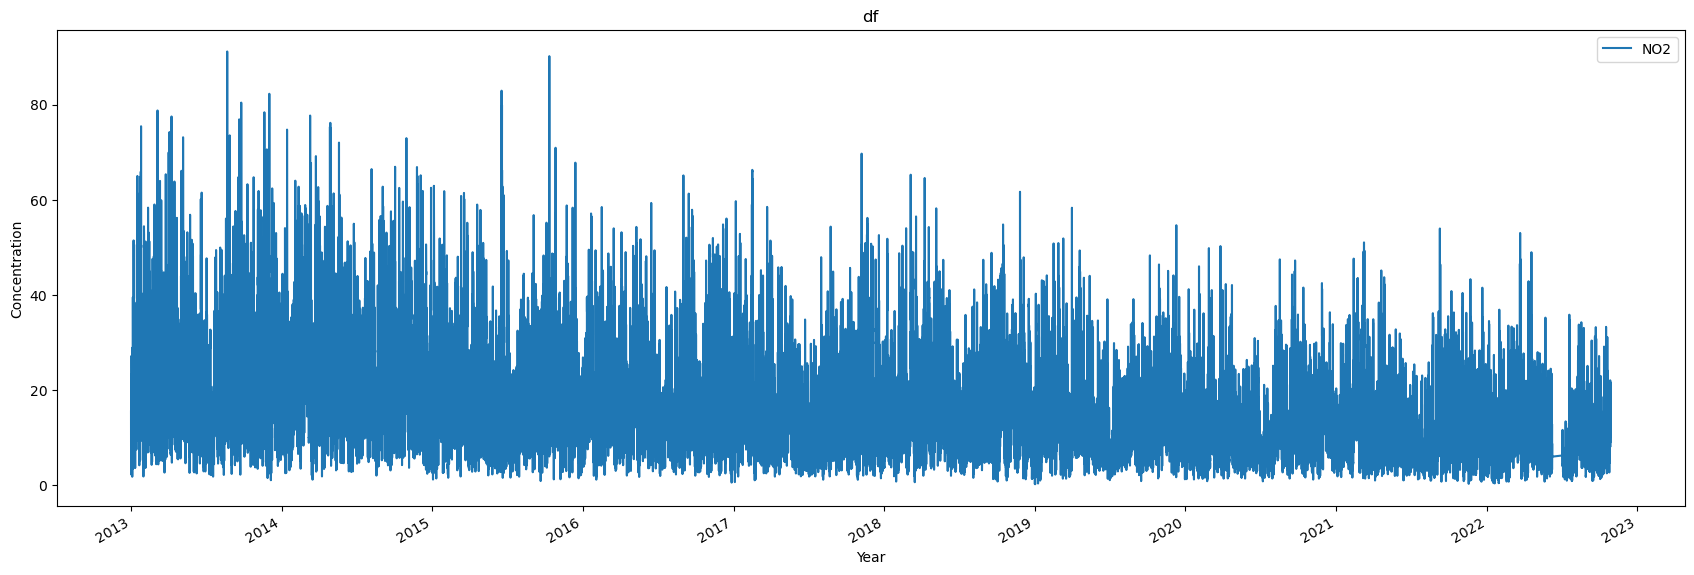

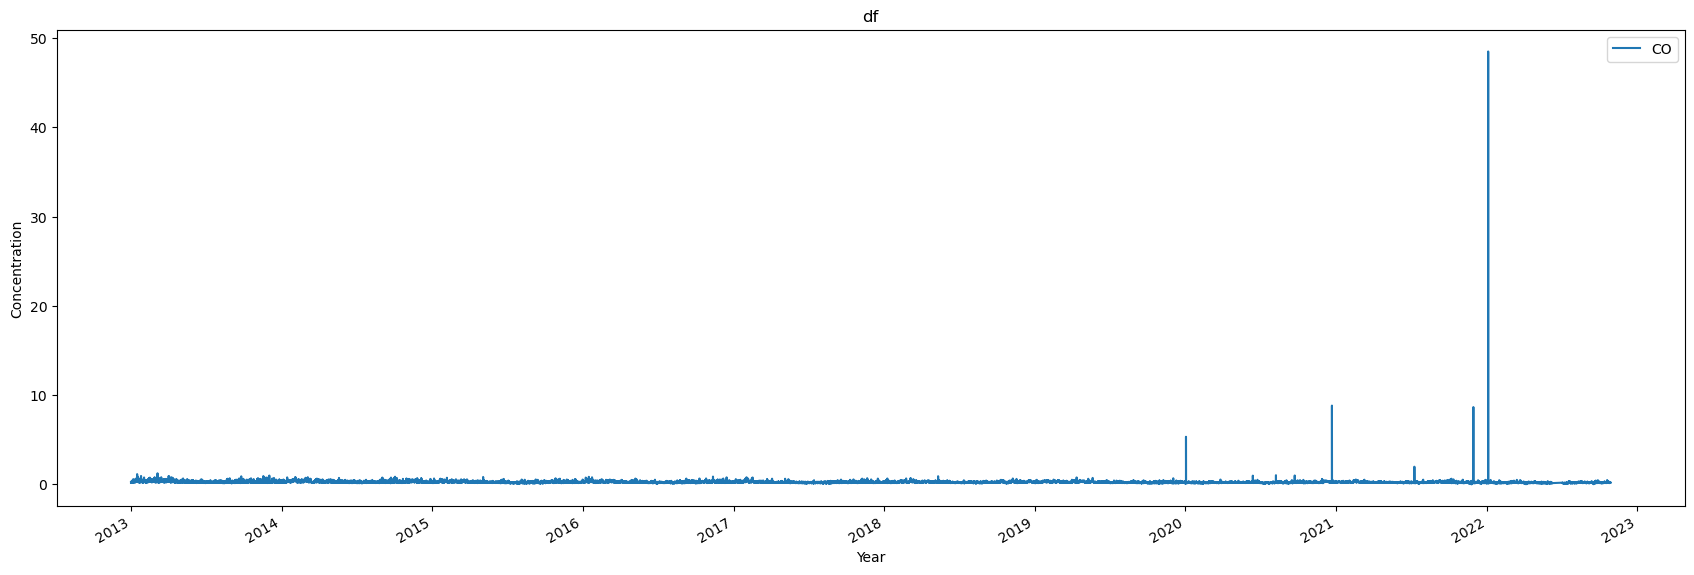

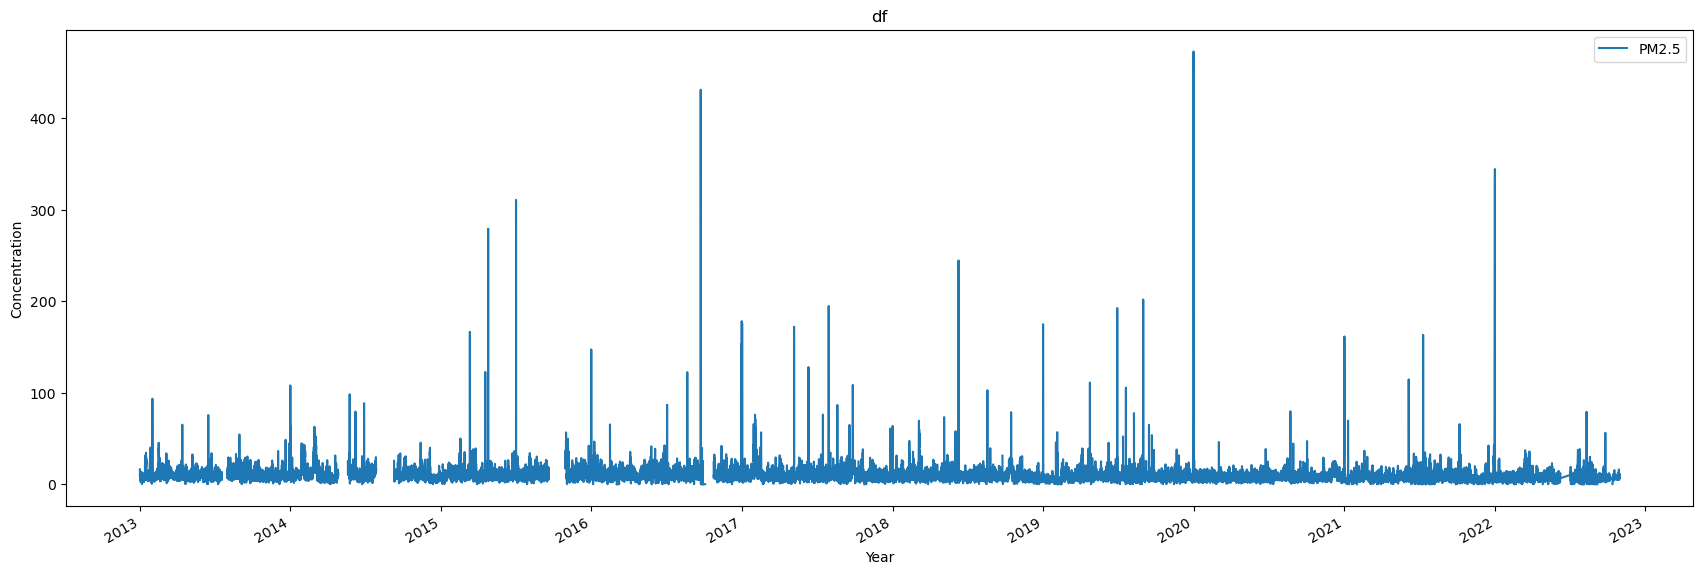

In [209]:
### Plot timeseries based on combined mean data for all Denmark

plot_timeseries_all(timeseries_denmark2)

In [210]:
### Get stations with the most measurements for each pollutant

selected_stations = [[],[],[],[],[],[]]
selected_stations_dict = {}
ind = 0
for pollutant in pol_codes:
    selected_stations[ind].append((df_serbia_v5[df_serbia_v5['AirPollutant']==pollutant]['AirQualityStation'].value_counts()).index.tolist()[0])
    selected_stations[ind].append((df_denmark_v5[df_denmark_v5['AirPollutant']==pollutant]['AirQualityStation'].value_counts()).index.tolist()[0])
    selected_stations_dict[pollutant] = selected_stations[ind]
    ind += 1

In [211]:
### Merge Serbia and Denmark datasets

df_v5 = (pd.concat([df_serbia_v5,df_denmark_v5], axis=0)).reset_index(drop=False)

In [212]:
### Define a function to plot timeseries for selected stations
### Warning! This particular code was not initially written by me
### Written by Alexandra Nasonova https://github.com/AlexandraNasonova
### Modified and adapted by Adele Kim https://github.com/Adele-Kim

def check_station_timeseries(df):
    for i in range(len(pol_codes)):
        stations = df[df['AirPollutant']==pol_codes[i]]['AirQualityStation'].unique()
        for j in range(2):
            s = selected_stations[i][j]
            axs = plt.gca()
            df[(df['AirPollutant']==pol_codes[i]) & (df['AirQualityStation'] == s)].plot(x='DatetimeEnd', xlabel="Date", ylabel="Concentration", title=s,  y='Concentration', c='tab:blue', figsize=(21,7), ax=axs)
            plt.legend([pol_dict[pol_codes[i]]])
            plt.show()

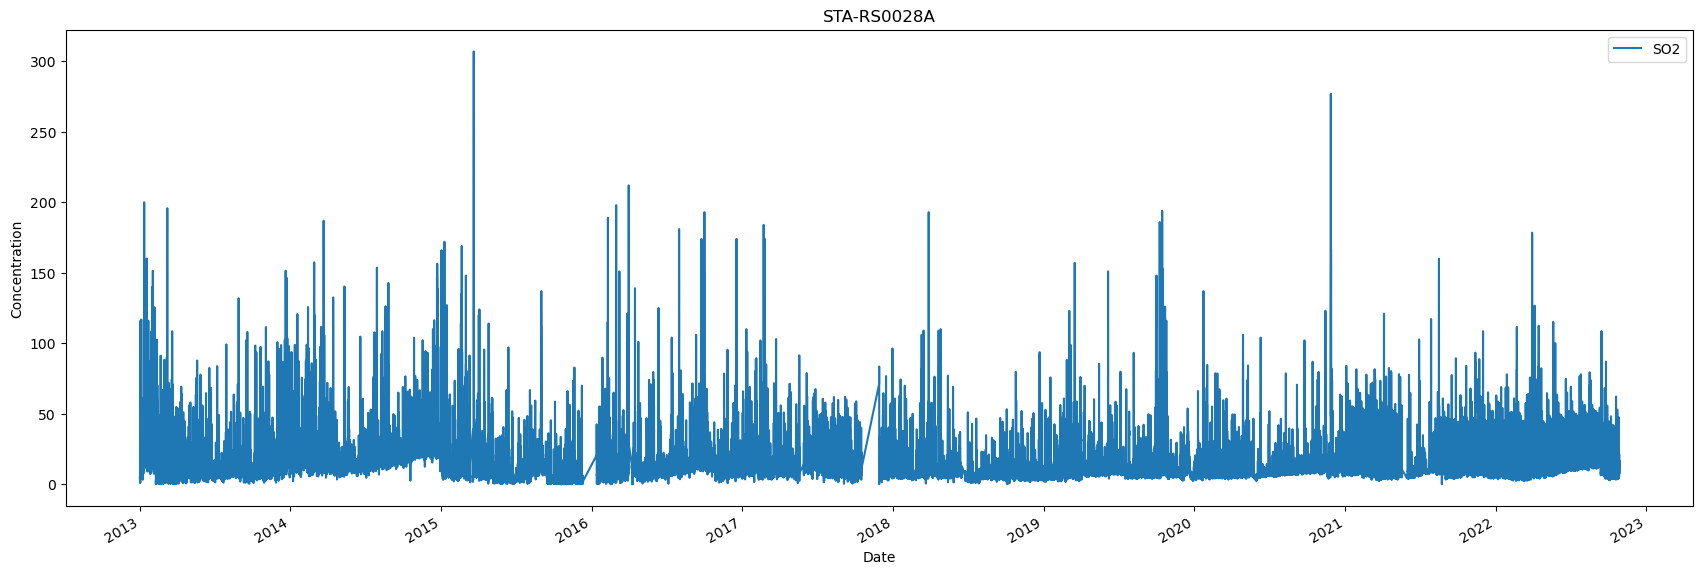

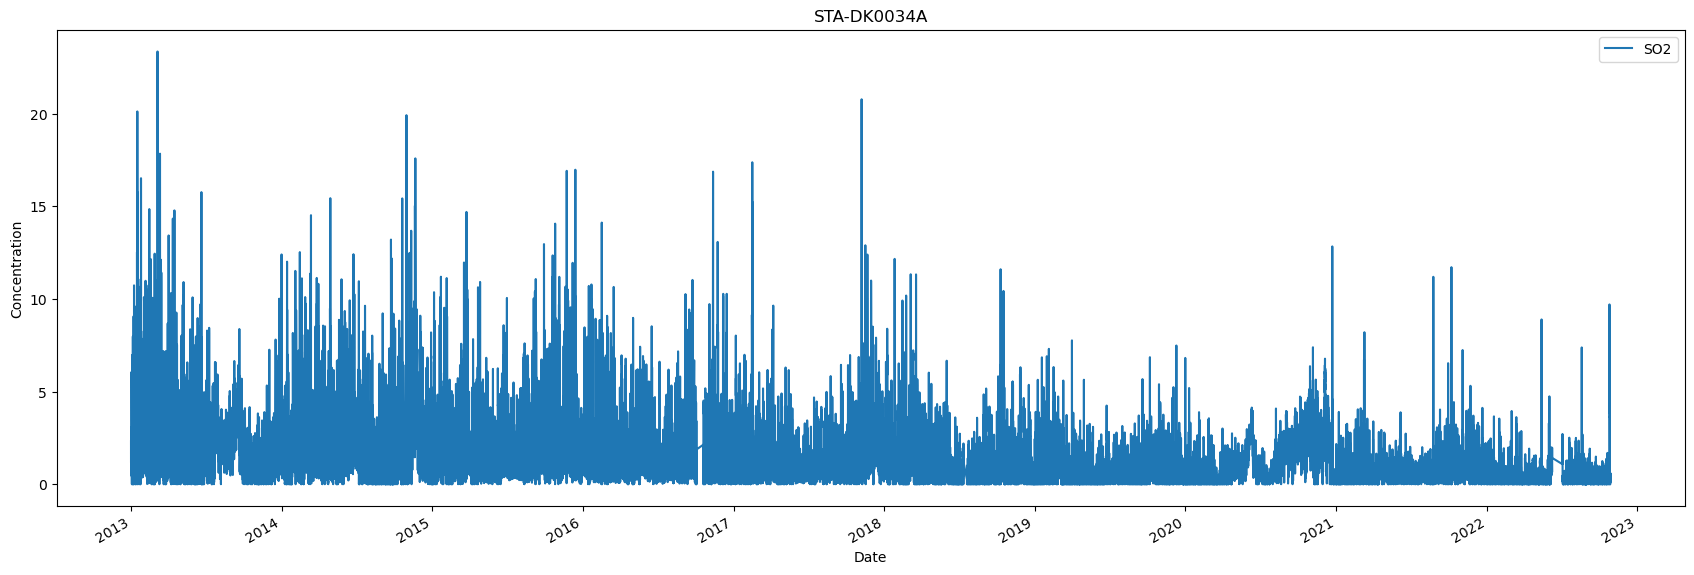

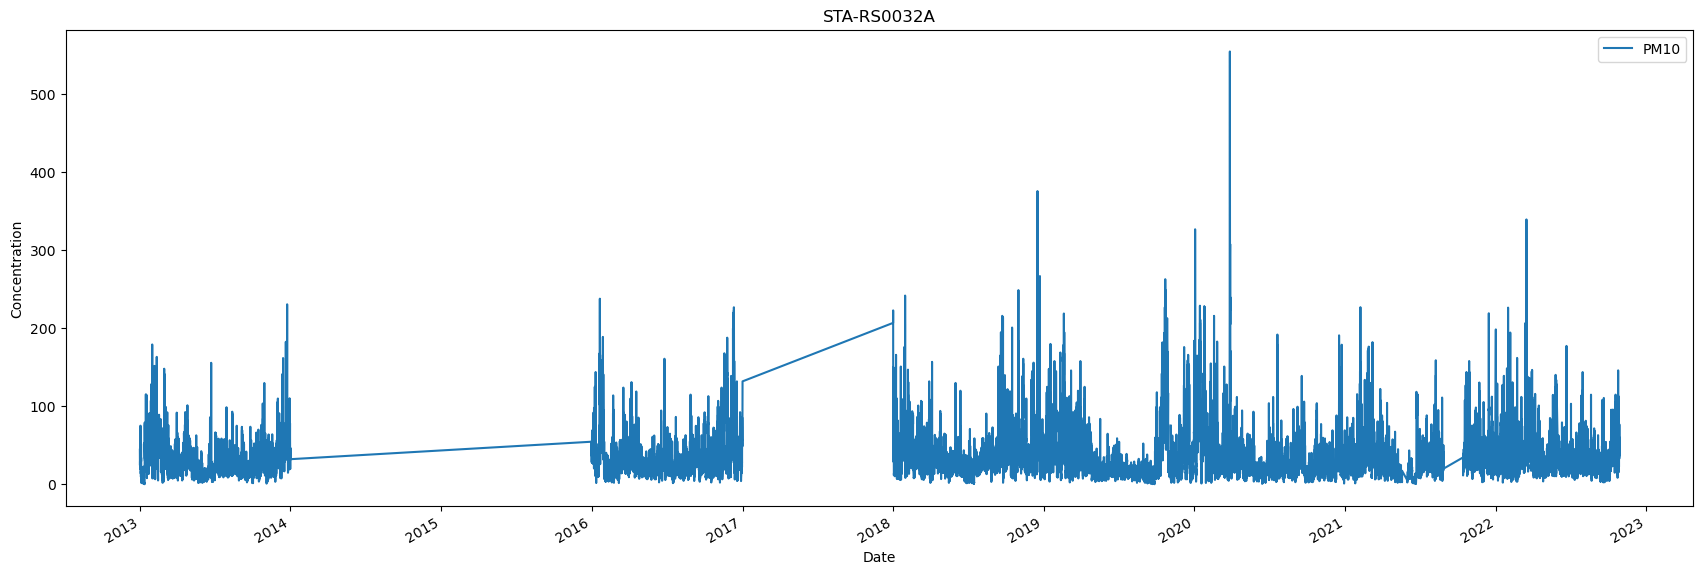

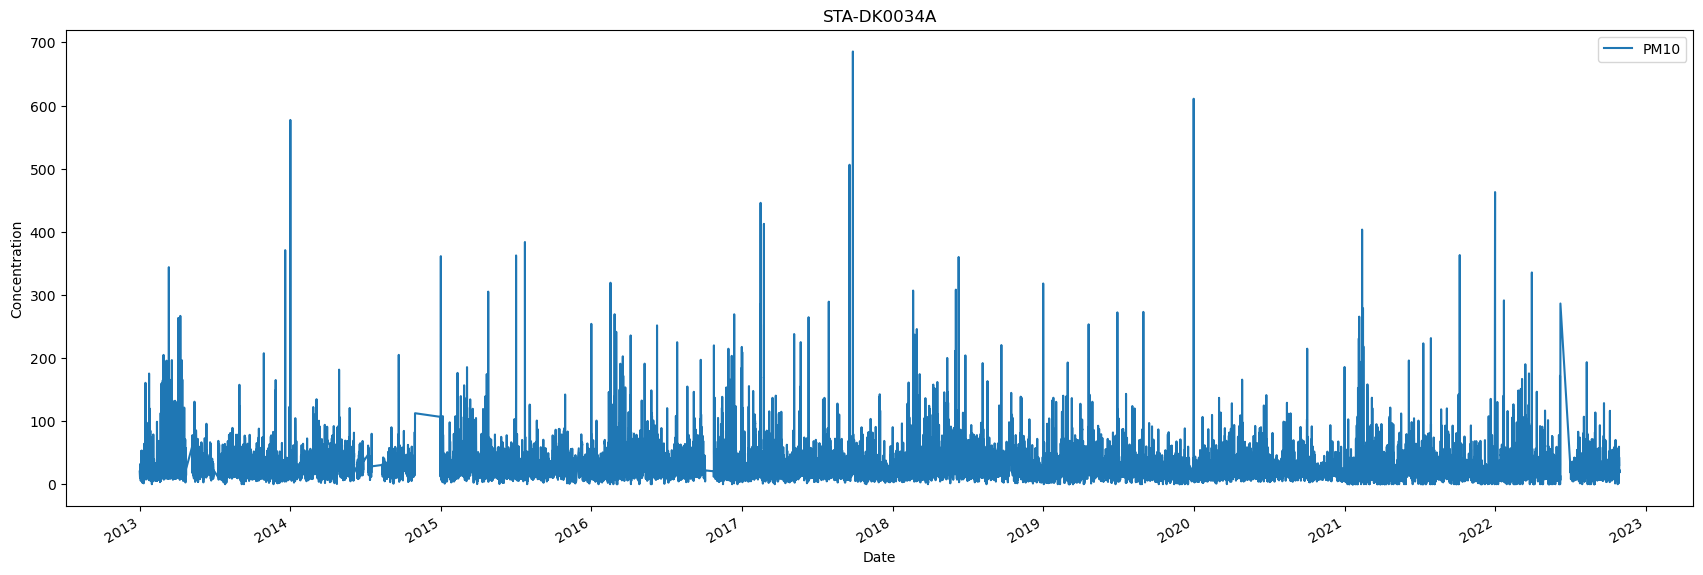

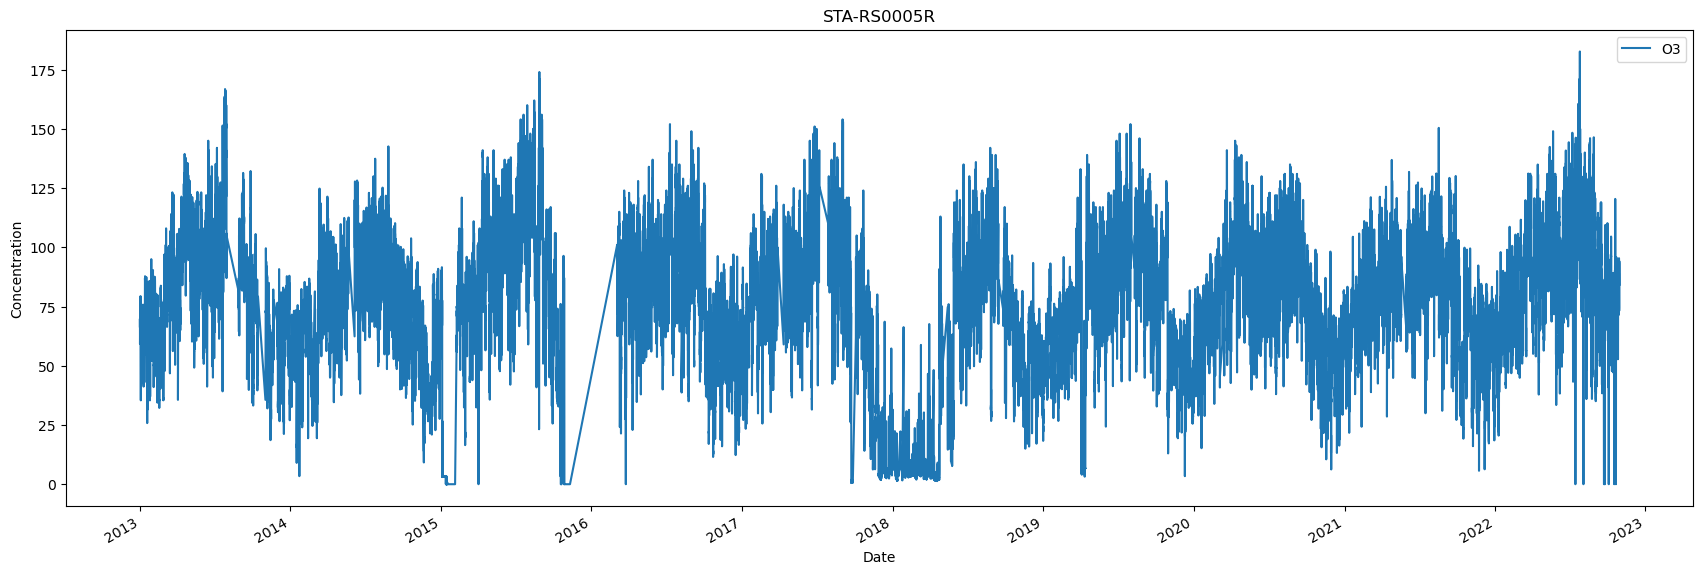

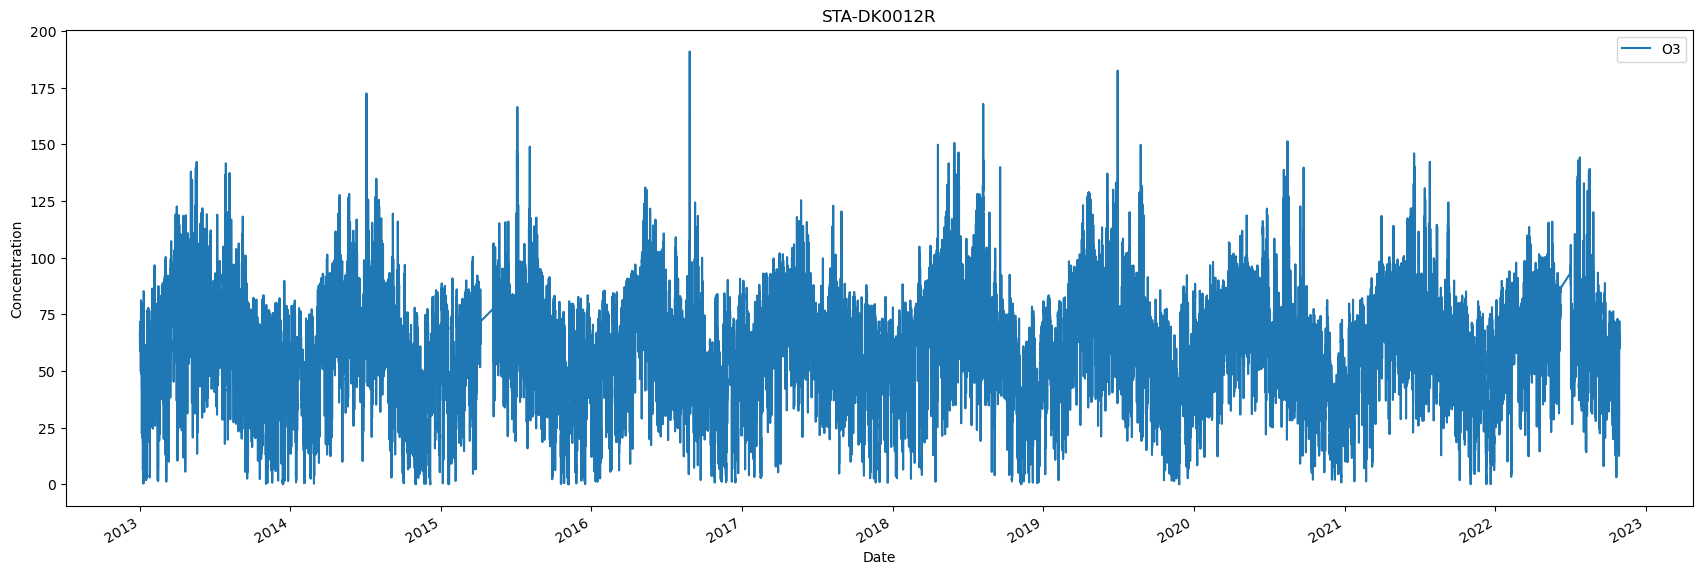

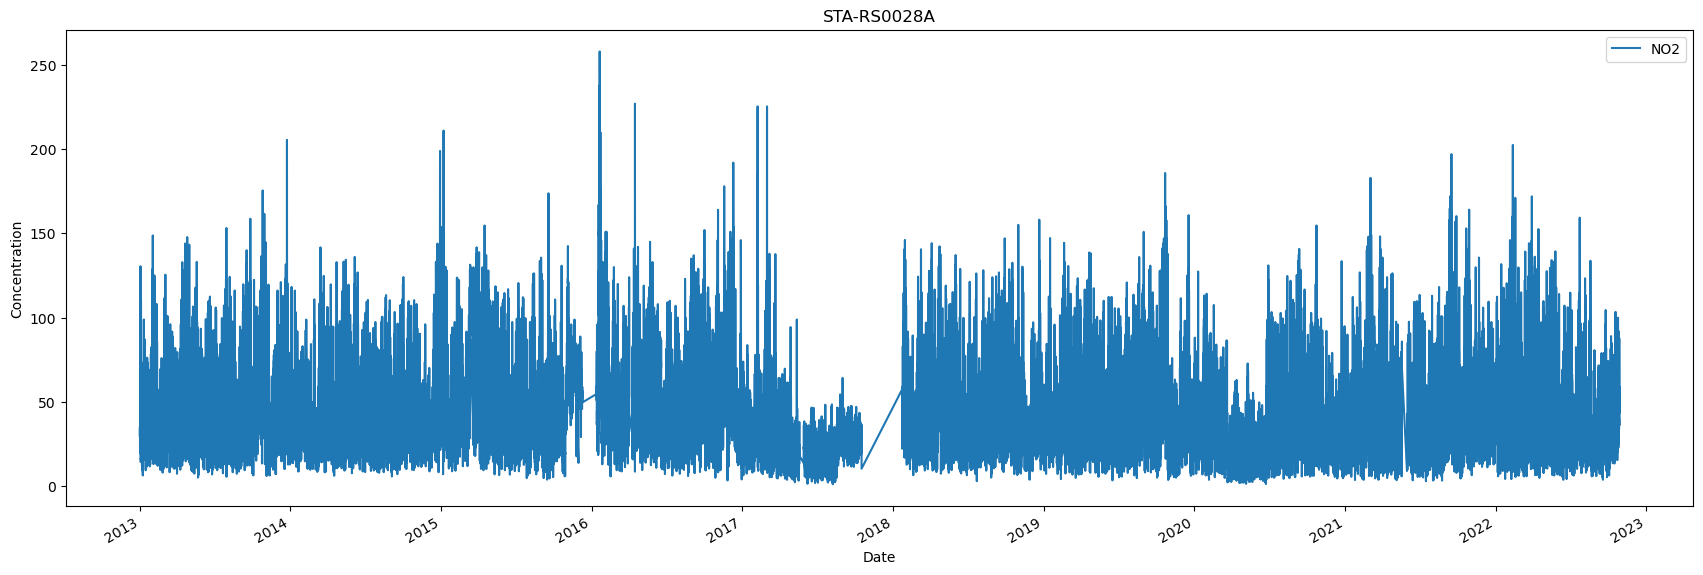

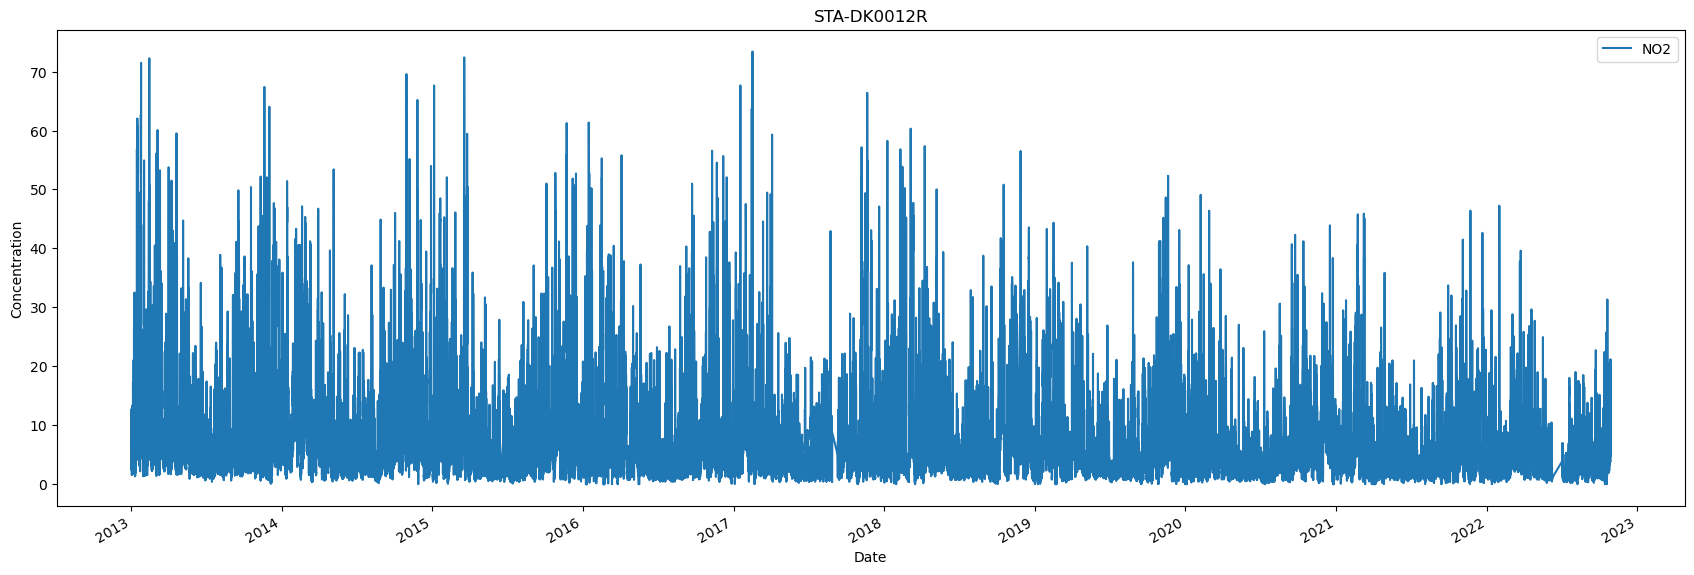

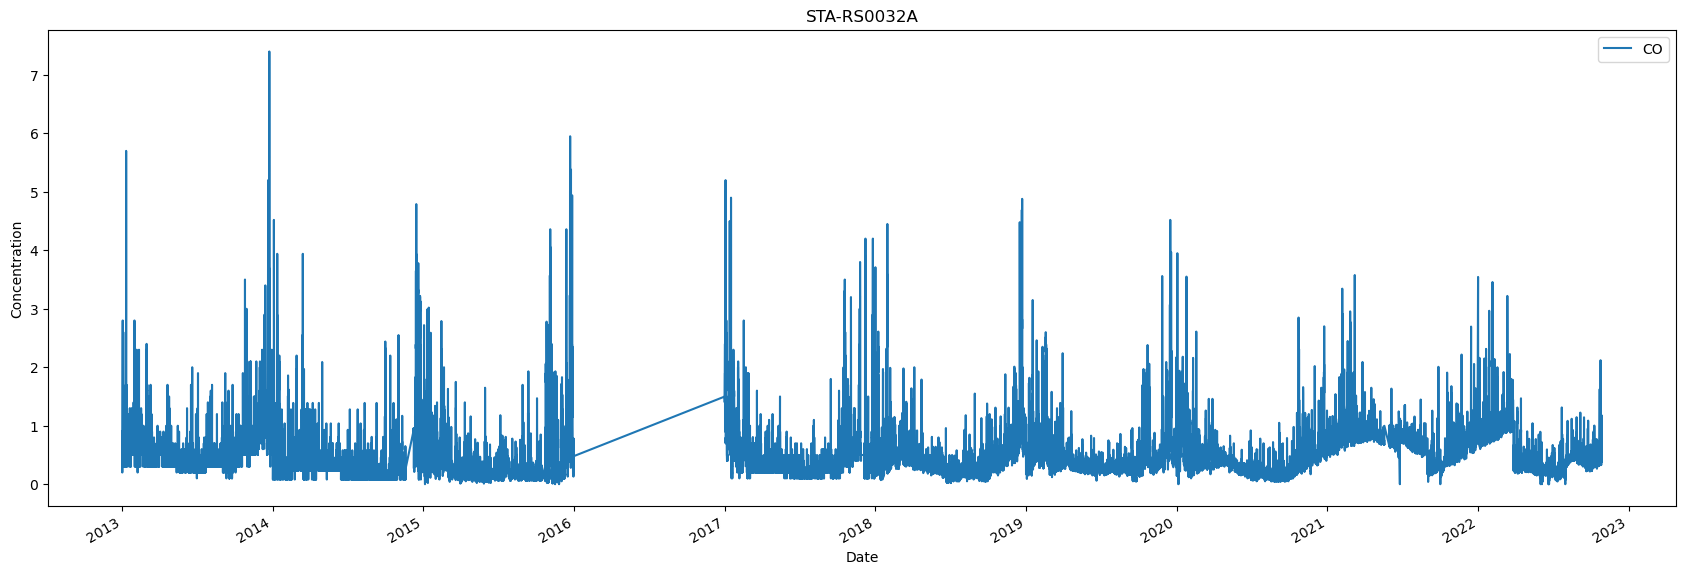

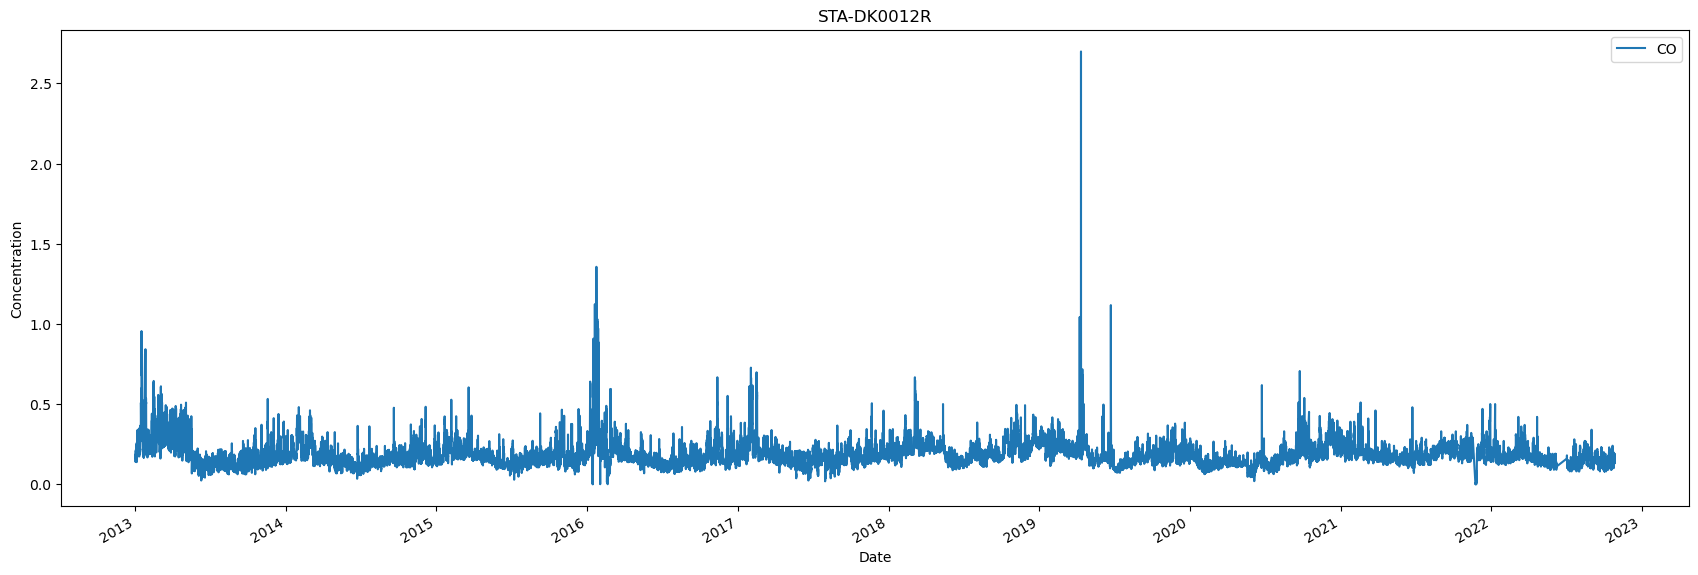

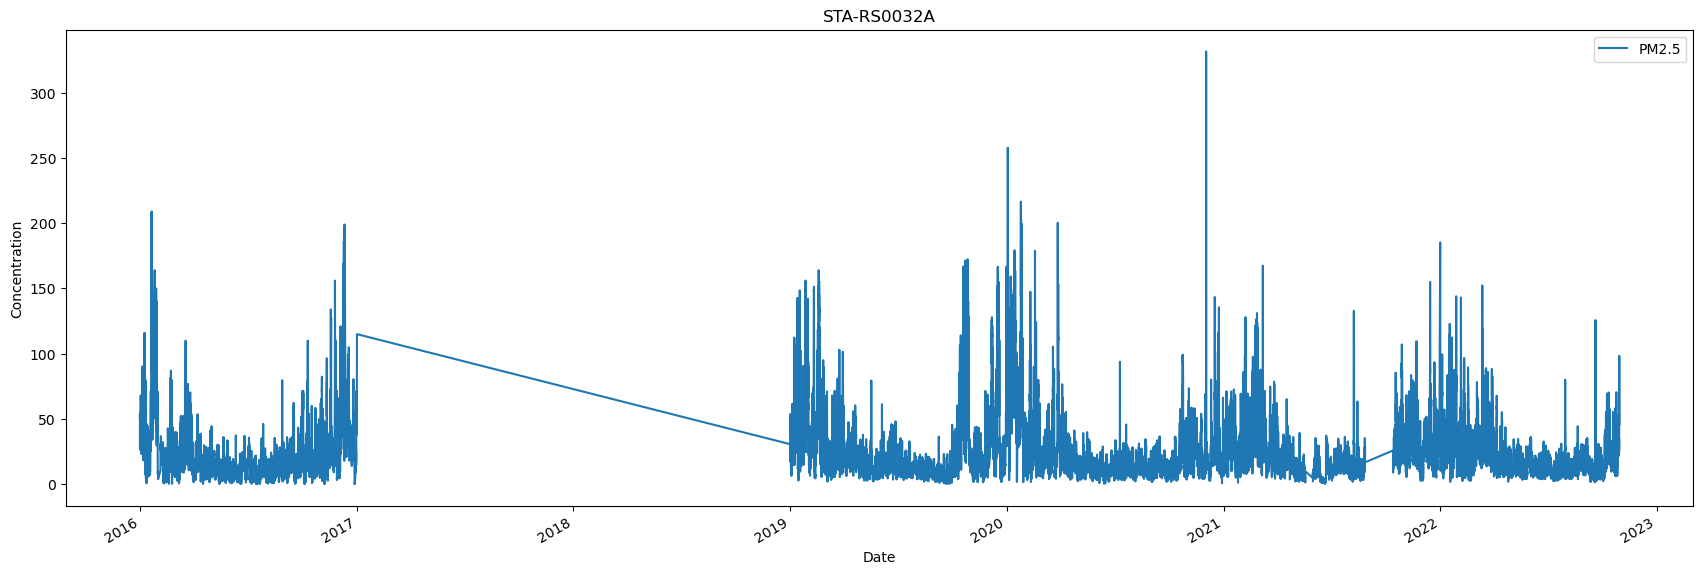

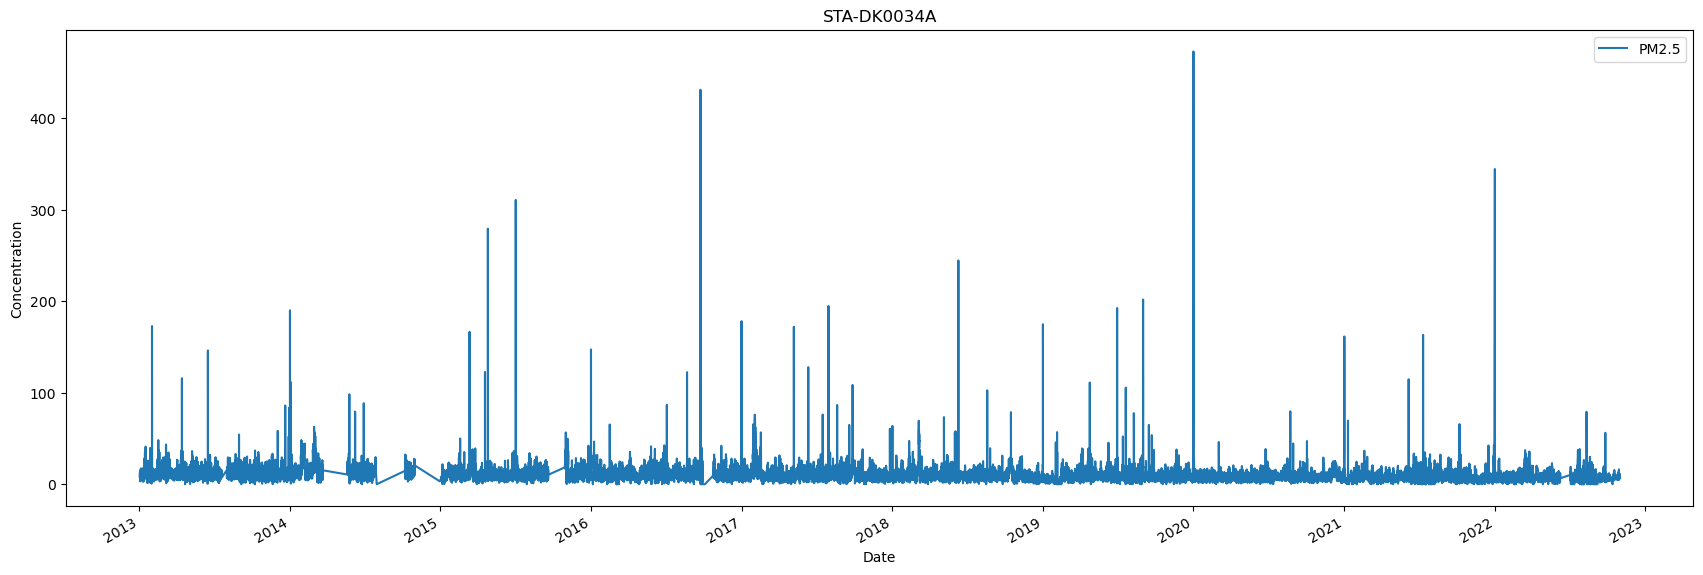

In [213]:
check_station_timeseries(df_v5)

Для 1(SO2) для Сербии не очень хорошо прослеживаются какие-либо закономерности. У Дании чуть получше, вроде бы даже имеются какие-то намеки на сезонность/цикличность, но из данной картинки сложно сделать какие-то выводы.<br><br>
То же самое для 5(PM10). У Сербии для выбранной станции неполные данные. Но несмотря на это, можно увидеть сезонное цикличное повышение в декабре-январе. Для Дании вроде бы тоже можно уловить какую-то цикличность, но опять же по приведенным timeseries сложно делать какие-то серьезные достоверные выводы.<br><br>
Для 7(O3) для обеих стран имеется четко прослеживаемая сезонность, с пиками в середине года<br><br>
Для 8(NO2) для Сербии timeseries не очень хороший. А вот для Дании хорошо видна сезонность с максимумами примерно в декабре-январе<br><br>
Для 10(CO) для обеих стран прослеживается сезонность, с пиками в конце года. Хотя у Дании сезонность выражена чуть меньше<br><br>
Для 6001(PM2.5) для обеих стран тоже можно уловить сезонность, с пиками в конце года.<br><br>